In [1]:
import os
import tqdm
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from collections import defaultdict
import pandas as pd
from data_preparation.dataset_preparation import TauPreparer
from data_preparation import data_utils, image_labelling
from itertools import product
from scipy import stats

In [2]:
d_train = {
     "cortical": ['747316', '771746', '771791'],
     "BG": ['747814', '747818', '747297', '747309'],
     "DN": ['747337','747350','747352']
}

In [12]:
d_test = {
     "cortical": ['747331','771747'],
     "BG": ['703488','747821'],
     "DN": ['747335','771913']
}
object_labels = {}

in_root_dir = "M:/Unused/TauCellDL/test_labels_new/new_labels"
subdirs = os.listdir(in_root_dir)
for subdir in subdirs:
    subdir_path = os.path.join(in_root_dir, subdir)
    detection_files = data_utils.list_files_of_a_type(subdir_path, "txt")

    for i in tqdm.tqdm(range(len(detection_files))):
        detection_file = detection_files[i]
        print(detection_file)

        # print(f"\nProcessing {detection_file}...")
        split_filename = data_utils.get_filename(detection_file).split(' ')[0].split('.')
        slide_id = split_filename[0]
        print(slide_id)
        # find key for slide_id
        key = next((key for key, value in d_test.items() if slide_id in value), None)
        if key is None:
            continue
        if key not in object_labels:
            object_labels[key] = {}
        with open(detection_file, 'r') as detections:
            for line in detections:
                object_label = line.split(' ')[0].strip().strip(']').strip('[')
                object_labels[key][object_label] = object_labels[key].get(object_label, 0) + 1


  1%|          | 1/151 [00:00<00:15,  9.41it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=17563,y=23734,w=507,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=18038,y=22785,w=506,h=506].txt
747335


  1%|▏         | 2/151 [00:00<00:45,  3.30it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=18038,y=23259,w=506,h=507].txt
747335


  2%|▏         | 3/151 [00:00<00:42,  3.47it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=18038,y=23734,w=506,h=507].txt
747335


  3%|▎         | 4/151 [00:01<00:43,  3.35it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=18038,y=24209,w=506,h=506].txt
747335


  3%|▎         | 5/151 [00:01<00:49,  2.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=18513,y=23259,w=506,h=507].txt
747335


  4%|▍         | 6/151 [00:02<00:57,  2.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=18513,y=23734,w=506,h=507].txt
747335


  5%|▍         | 7/151 [00:02<00:56,  2.57it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=18513,y=24209,w=506,h=506].txt
747335


  5%|▌         | 8/151 [00:03<01:09,  2.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=18987,y=23734,w=507,h=507].txt
747335


  6%|▌         | 9/151 [00:03<01:07,  2.11it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=18987,y=24209,w=507,h=506].txt
747335


  7%|▋         | 10/151 [00:04<01:07,  2.10it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=19462,y=22785,w=506,h=506].txt
747335


  7%|▋         | 11/151 [00:04<01:12,  1.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=19462,y=23259,w=506,h=507].txt
747335


  8%|▊         | 12/151 [00:05<01:06,  2.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=19462,y=24209,w=506,h=506].txt
747335


  9%|▊         | 13/151 [00:05<01:17,  1.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=26582,y=33228,w=507,h=506].txt
747335


  9%|▉         | 14/151 [00:06<01:23,  1.63it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=26582,y=33703,w=507,h=506].txt
747335


 10%|▉         | 15/151 [00:07<01:19,  1.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=26582,y=34177,w=507,h=507].txt
747335


 11%|█         | 16/151 [00:07<01:09,  1.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=27057,y=18987,w=506,h=507].txt
747335


 11%|█▏        | 17/151 [00:07<01:08,  1.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=27057,y=32278,w=506,h=507].txt
747335


 12%|█▏        | 18/151 [00:08<01:17,  1.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=27057,y=32753,w=506,h=506].txt
747335


 13%|█▎        | 20/151 [00:09<00:57,  2.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=27057,y=33228,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=27057,y=33703,w=506,h=506].txt
747335


 14%|█▍        | 21/151 [00:09<00:58,  2.21it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=27057,y=34177,w=506,h=507].txt
747335


 15%|█▍        | 22/151 [00:10<01:03,  2.02it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=27532,y=18987,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=27532,y=33228,w=506,h=506].txt
747335


 16%|█▌        | 24/151 [00:10<00:44,  2.85it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=27532,y=33703,w=506,h=506].txt
747335


 17%|█▋        | 25/151 [00:11<00:41,  3.04it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=28006,y=32753,w=507,h=506].txt
747335


 17%|█▋        | 26/151 [00:11<00:40,  3.11it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=28006,y=33703,w=507,h=506].txt
747335


 18%|█▊        | 27/151 [00:11<00:44,  2.76it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=28006,y=34177,w=507,h=507].txt
747335


 19%|█▊        | 28/151 [00:12<00:41,  2.97it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=28481,y=26582,w=506,h=507].txt
747335


 19%|█▉        | 29/151 [00:12<00:44,  2.74it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=28481,y=27532,w=506,h=506].txt
747335


 20%|█▉        | 30/151 [00:13<01:00,  2.00it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=28481,y=28006,w=506,h=507].txt
747335


 21%|██        | 31/151 [00:13<01:04,  1.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=28956,y=26582,w=506,h=507].txt
747335


 21%|██        | 32/151 [00:14<00:56,  2.10it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=28956,y=27057,w=506,h=506].txt
747335


 22%|██▏       | 33/151 [00:15<01:04,  1.83it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=28956,y=27532,w=506,h=506].txt
747335


 23%|██▎       | 34/151 [00:15<01:04,  1.80it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=28956,y=28481,w=506,h=506].txt
747335


 23%|██▎       | 35/151 [00:15<00:54,  2.12it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=29430,y=26582,w=507,h=507].txt
747335


 25%|██▌       | 38/151 [00:16<00:28,  3.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=29430,y=27057,w=507,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=29430,y=28006,w=507,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=29430,y=28481,w=507,h=506].txt
747335


 26%|██▌       | 39/151 [00:16<00:28,  3.96it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=29905,y=26582,w=506,h=507].txt
747335


 26%|██▋       | 40/151 [00:16<00:29,  3.78it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=29905,y=27057,w=506,h=506].txt
747335


 27%|██▋       | 41/151 [00:17<00:37,  2.94it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=29905,y=28006,w=506,h=507].txt
747335


 28%|██▊       | 42/151 [00:18<00:47,  2.30it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=30380,y=27057,w=506,h=506].txt
747335


 28%|██▊       | 43/151 [00:18<00:40,  2.63it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=31804,y=14715,w=506,h=507].txt
747335


 29%|██▉       | 44/151 [00:18<00:43,  2.45it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=31804,y=15190,w=506,h=506].txt
747335


 30%|██▉       | 45/151 [00:19<00:46,  2.30it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=32278,y=14715,w=507,h=507].txt
747335


 30%|███       | 46/151 [00:19<00:42,  2.47it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=32278,y=15665,w=507,h=506].txt
747335


 31%|███       | 47/151 [00:20<00:43,  2.42it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=32278,y=16139,w=507,h=507].txt
747335


 32%|███▏      | 49/151 [00:20<00:37,  2.68it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=32753,y=14715,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=32753,y=15190,w=506,h=506].txt
747335


 33%|███▎      | 50/151 [00:21<00:45,  2.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=32753,y=15665,w=506,h=506].txt
747335


 36%|███▌      | 54/151 [00:21<00:17,  5.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=32753,y=16139,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=33228,y=14715,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=33228,y=15665,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=33228,y=16139,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=34177,y=30380,w=507,h=506].txt
747335


 37%|███▋      | 56/151 [00:21<00:15,  6.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=34652,y=29905,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=34652,y=30380,w=506,h=506].txt
747335


 39%|███▉      | 59/151 [00:22<00:17,  5.31it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=34652,y=30854,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=34652,y=31329,w=506,h=506].txt
747335


 40%|████      | 61/151 [00:23<00:20,  4.45it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=35127,y=29430,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=35127,y=29905,w=506,h=506].txt
747335


 41%|████      | 62/151 [00:24<00:34,  2.59it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=35127,y=30380,w=506,h=506].txt
747335


 42%|████▏     | 63/151 [00:24<00:33,  2.66it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=35127,y=30854,w=506,h=507].txt
747335


 42%|████▏     | 64/151 [00:25<00:41,  2.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=35601,y=29905,w=507,h=506].txt
747335


 44%|████▎     | 66/151 [00:25<00:31,  2.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=35601,y=30380,w=507,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=35601,y=30854,w=507,h=507].txt
747335


 45%|████▌     | 68/151 [00:26<00:32,  2.58it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=35601,y=31329,w=507,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=36076,y=29905,w=506,h=506].txt
747335


 46%|████▋     | 70/151 [00:26<00:20,  3.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=36076,y=30380,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=36076,y=30854,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=38449,y=16614,w=507,h=506].txt
747335


 48%|████▊     | 72/151 [00:27<00:13,  5.67it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=38449,y=20411,w=507,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=38449,y=20886,w=507,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=38924,y=16614,w=506,h=506].txt
747335


 50%|████▉     | 75/151 [00:27<00:09,  8.09it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=38924,y=17089,w=506,h=506].txt
747335


 50%|█████     | 76/151 [00:27<00:16,  4.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=38924,y=18513,w=506,h=506].txt
747335


 51%|█████     | 77/151 [00:28<00:18,  3.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=38924,y=20411,w=506,h=507].txt
747335


 52%|█████▏    | 78/151 [00:28<00:21,  3.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=38924,y=20886,w=506,h=506].txt
747335


 53%|█████▎    | 80/151 [00:29<00:22,  3.12it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=39399,y=17563,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=39399,y=18038,w=506,h=506].txt
747335


 54%|█████▎    | 81/151 [00:29<00:21,  3.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=39399,y=18513,w=506,h=506].txt
747335


 54%|█████▍    | 82/151 [00:29<00:19,  3.52it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=39399,y=20886,w=506,h=506].txt
747335


 55%|█████▍    | 83/151 [00:30<00:27,  2.44it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=39873,y=16614,w=507,h=506].txt
747335


 56%|█████▌    | 84/151 [00:31<00:25,  2.62it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=39873,y=17089,w=507,h=506].txt
747335


 56%|█████▋    | 85/151 [00:31<00:32,  2.05it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=39873,y=17563,w=507,h=507].txt
747335


 57%|█████▋    | 86/151 [00:32<00:30,  2.10it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=39873,y=18513,w=507,h=506].txt
747335


 58%|█████▊    | 87/151 [00:32<00:25,  2.52it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=42247,y=18987,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=42247,y=19937,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=42722,y=18513,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=42722,y=18987,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=42722,y=19937,w=506,h=506].txt
747335


 61%|██████    | 92/151 [00:32<00:10,  5.41it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=43196,y=18513,w=507,h=506].txt
747335


 62%|██████▏   | 93/151 [00:33<00:15,  3.84it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=43196,y=18987,w=507,h=507].txt
747335


 62%|██████▏   | 94/151 [00:34<00:18,  3.14it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=43196,y=19462,w=507,h=506].txt
747335


 63%|██████▎   | 95/151 [00:34<00:20,  2.78it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=43196,y=19937,w=507,h=506].txt
747335


 64%|██████▎   | 96/151 [00:35<00:23,  2.31it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=43196,y=20411,w=507,h=507].txt
747335


 64%|██████▍   | 97/151 [00:35<00:22,  2.38it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=43671,y=18987,w=506,h=507].txt
747335


 65%|██████▍   | 98/151 [00:35<00:21,  2.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=43671,y=19462,w=506,h=506].txt
747335


 66%|██████▌   | 99/151 [00:36<00:21,  2.47it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=43671,y=19937,w=506,h=506].txt
747335


 66%|██████▌   | 100/151 [00:36<00:19,  2.61it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=45095,y=39873,w=506,h=507].txt
747335


 67%|██████▋   | 101/151 [00:37<00:21,  2.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=45570,y=38449,w=506,h=507].txt
747335


 70%|███████   | 106/151 [00:37<00:08,  5.28it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=45570,y=38924,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=45570,y=39399,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=45570,y=39873,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46044,y=38449,w=507,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46044,y=38924,w=507,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46044,y=39399,w=507,h=506].txt
747335


 72%|███████▏  | 108/151 [00:38<00:09,  4.69it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46044,y=39873,w=507,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46044,y=40348,w=507,h=506].txt
747335


 73%|███████▎  | 110/151 [00:39<00:10,  3.82it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46519,y=38449,w=506,h=507].txt
747335


 74%|███████▎  | 111/151 [00:39<00:10,  3.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46519,y=38924,w=506,h=506].txt
747335


 74%|███████▍  | 112/151 [00:39<00:11,  3.31it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46519,y=39399,w=506,h=506].txt
747335


 75%|███████▍  | 113/151 [00:40<00:12,  3.09it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46519,y=39873,w=506,h=507].txt
747335


 75%|███████▌  | 114/151 [00:40<00:13,  2.74it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46519,y=40348,w=506,h=506].txt
747335


 76%|███████▌  | 115/151 [00:41<00:14,  2.42it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46994,y=38924,w=506,h=506].txt
747335


 77%|███████▋  | 116/151 [00:41<00:13,  2.64it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=46994,y=40348,w=506,h=506].txt
747335


 77%|███████▋  | 117/151 [00:42<00:13,  2.61it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=53639,y=41297,w=507,h=507].txt
747335


 78%|███████▊  | 118/151 [00:42<00:14,  2.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=53639,y=41772,w=507,h=506].txt
747335


 79%|███████▉  | 120/151 [00:43<00:10,  2.85it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=54114,y=41772,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=54114,y=42247,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=54114,y=43196,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=54114,y=43671,w=506,h=506].txt
747335


 81%|████████▏ | 123/151 [00:43<00:04,  5.64it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=54589,y=25633,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=54589,y=26108,w=506,h=506].txt
747335


 83%|████████▎ | 125/151 [00:44<00:06,  4.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=54589,y=42247,w=506,h=506].txt
747335


 83%|████████▎ | 126/151 [00:44<00:08,  2.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=54589,y=42722,w=506,h=506].txt
747335


 84%|████████▍ | 127/151 [00:45<00:08,  2.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=54589,y=43196,w=506,h=507].txt
747335


 85%|████████▍ | 128/151 [00:45<00:08,  2.78it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=54589,y=43671,w=506,h=506].txt
747335


 85%|████████▌ | 129/151 [00:46<00:08,  2.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=55063,y=42247,w=507,h=506].txt
747335


 86%|████████▌ | 130/151 [00:46<00:08,  2.53it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=55063,y=43671,w=507,h=506].txt
747335


 87%|████████▋ | 131/151 [00:46<00:08,  2.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=55063,y=44146,w=507,h=506].txt
747335


 87%|████████▋ | 132/151 [00:47<00:11,  1.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=55538,y=42722,w=506,h=506].txt
747335


 88%|████████▊ | 133/151 [00:48<00:09,  1.96it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=55538,y=43196,w=506,h=507].txt
747335


 89%|████████▊ | 134/151 [00:48<00:07,  2.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=55538,y=43671,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=55538,y=44146,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=56013,y=42722,w=506,h=506].txt
747335


 91%|█████████ | 137/151 [00:48<00:03,  4.21it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=56013,y=43196,w=506,h=507].txt
747335


 91%|█████████▏| 138/151 [00:49<00:03,  3.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=56013,y=43671,w=506,h=506].txt
747335


 92%|█████████▏| 139/151 [00:49<00:03,  3.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=60285,y=44620,w=506,h=507].txt
747335


 93%|█████████▎| 140/151 [00:49<00:03,  3.28it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=60285,y=45095,w=506,h=506].txt
747335


 93%|█████████▎| 141/151 [00:50<00:03,  3.21it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=60759,y=45095,w=507,h=506].txt
747335


 94%|█████████▍| 142/151 [00:50<00:03,  2.73it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=60759,y=45570,w=507,h=506].txt
747335


 95%|█████████▍| 143/151 [00:51<00:02,  2.80it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=60759,y=46044,w=507,h=507].txt
747335


 95%|█████████▌| 144/151 [00:51<00:03,  2.29it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=61234,y=45095,w=507,h=506].txt
747335


 96%|█████████▌| 145/151 [00:51<00:02,  2.43it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=61234,y=45570,w=507,h=506].txt
747335


 97%|█████████▋| 146/151 [00:52<00:01,  2.66it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=61234,y=46044,w=507,h=507].txt
747335


 98%|█████████▊| 148/151 [00:52<00:00,  3.32it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=61709,y=44620,w=506,h=507].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=61709,y=45095,w=506,h=506].txt
747335


100%|██████████| 151/151 [00:53<00:00,  2.84it/s]


M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=61709,y=45570,w=506,h=506].txt
747335
M:/Unused/TauCellDL/test_labels_new/new_labels\747335\747335 [d=0.98892,x=61709,y=46044,w=506,h=507].txt
747335


  0%|          | 0/706 [00:00<?, ?it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=100158,y=29905,w=507,h=506].txt
771747


  0%|          | 1/706 [00:00<03:30,  3.34it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=100633,y=29905,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=101108,y=29905,w=506,h=506].txt
771747


  0%|          | 3/706 [00:00<02:13,  5.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=101108,y=30380,w=506,h=506].txt
771747


  1%|          | 4/706 [00:01<03:17,  3.55it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=101108,y=30854,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=101582,y=30380,w=507,h=506].txt
771747


  1%|          | 7/706 [00:01<02:22,  4.90it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43196,y=52690,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43196,y=53165,w=507,h=506].txt
771747


  1%|          | 8/706 [00:02<03:37,  3.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43196,y=53639,w=507,h=507].txt
771747


  1%|▏         | 9/706 [00:02<03:24,  3.41it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43196,y=54114,w=507,h=506].txt
771747


  1%|▏         | 10/706 [00:02<03:56,  2.94it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43196,y=55538,w=507,h=506].txt
771747


  2%|▏         | 14/706 [00:03<02:02,  5.66it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43196,y=57911,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=52215,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=52690,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=53165,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=53639,w=506,h=507].txt
771747


  2%|▏         | 16/706 [00:04<02:59,  3.83it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=54114,w=506,h=506].txt
771747


  3%|▎         | 18/706 [00:04<03:02,  3.77it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=55063,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=55538,w=506,h=506].txt
771747


  3%|▎         | 19/706 [00:05<03:34,  3.20it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=56013,w=506,h=506].txt
771747


  3%|▎         | 20/706 [00:05<04:12,  2.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=56487,w=506,h=507].txt
771747


  3%|▎         | 21/706 [00:06<04:27,  2.56it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=56962,w=506,h=506].txt
771747


  3%|▎         | 22/706 [00:06<04:07,  2.76it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=57437,w=506,h=506].txt
771747


  3%|▎         | 23/706 [00:07<04:41,  2.43it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=43671,y=57911,w=506,h=507].txt
771747


  4%|▎         | 25/706 [00:07<03:56,  2.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=52215,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=52690,w=506,h=506].txt
771747


  4%|▍         | 27/706 [00:08<03:25,  3.31it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=53165,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=53639,w=506,h=507].txt
771747


  4%|▍         | 28/706 [00:08<03:35,  3.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=54114,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=54589,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=55063,w=506,h=507].txt
771747


  4%|▍         | 31/706 [00:08<02:18,  4.86it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=55538,w=506,h=506].txt
771747


  5%|▍         | 32/706 [00:09<02:35,  4.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=56013,w=506,h=506].txt
771747


  5%|▍         | 33/706 [00:09<02:45,  4.06it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=56487,w=506,h=507].txt
771747


  5%|▍         | 34/706 [00:10<03:50,  2.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=56962,w=506,h=506].txt
771747


  5%|▍         | 35/706 [00:10<04:29,  2.49it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=57437,w=506,h=506].txt
771747


  5%|▌         | 36/706 [00:11<04:44,  2.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44146,y=57911,w=506,h=507].txt
771747


  5%|▌         | 37/706 [00:11<04:10,  2.67it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=52215,w=507,h=507].txt
771747


  5%|▌         | 38/706 [00:11<03:59,  2.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=52690,w=507,h=506].txt
771747


  6%|▌         | 39/706 [00:12<03:48,  2.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=53165,w=507,h=506].txt
771747


  6%|▌         | 40/706 [00:12<03:38,  3.04it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=53639,w=507,h=507].txt
771747


  6%|▌         | 41/706 [00:13<04:39,  2.38it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=54589,w=507,h=506].txt
771747


  6%|▌         | 43/706 [00:13<04:29,  2.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=55063,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=55538,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=56013,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=56487,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=56962,w=507,h=506].txt
771747


  7%|▋         | 47/706 [00:14<02:38,  4.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=57437,w=507,h=506].txt
771747


  7%|▋         | 48/706 [00:14<02:48,  3.90it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45095,y=52215,w=506,h=507].txt
771747


  7%|▋         | 49/706 [00:15<02:59,  3.66it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45095,y=52690,w=506,h=506].txt
771747


  7%|▋         | 50/706 [00:15<03:02,  3.60it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45095,y=53165,w=506,h=506].txt
771747


  7%|▋         | 51/706 [00:16<03:45,  2.91it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45095,y=53639,w=506,h=507].txt
771747


  7%|▋         | 52/706 [00:16<03:38,  2.99it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45095,y=54114,w=506,h=506].txt
771747


  8%|▊         | 53/706 [00:16<04:15,  2.55it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45095,y=54589,w=506,h=506].txt
771747


  8%|▊         | 54/706 [00:17<04:06,  2.65it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45095,y=55538,w=506,h=506].txt
771747


  8%|▊         | 55/706 [00:17<04:59,  2.17it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45095,y=56013,w=506,h=506].txt
771747


  8%|▊         | 56/706 [00:18<04:31,  2.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45095,y=56487,w=506,h=507].txt
771747


  8%|▊         | 57/706 [00:18<04:31,  2.39it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45095,y=57437,w=506,h=506].txt
771747


  8%|▊         | 58/706 [00:18<03:52,  2.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=52215,w=506,h=507].txt
771747


  8%|▊         | 60/706 [00:19<03:12,  3.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=52690,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=53165,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=53639,w=506,h=507].txt
771747


  9%|▉         | 63/706 [00:19<01:40,  6.41it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=54114,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=54589,w=506,h=506].txt
771747


  9%|▉         | 64/706 [00:19<01:38,  6.49it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=55538,w=506,h=506].txt
771747


  9%|▉         | 65/706 [00:19<01:56,  5.52it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=56013,w=506,h=506].txt
771747


  9%|▉         | 66/706 [00:20<03:06,  3.43it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=56962,w=506,h=506].txt
771747


  9%|▉         | 67/706 [00:21<04:18,  2.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=57437,w=506,h=506].txt
771747


 10%|▉         | 68/706 [00:21<04:33,  2.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=57911,w=506,h=507].txt
771747


 10%|▉         | 69/706 [00:22<04:48,  2.21it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=52215,w=507,h=507].txt
771747


 10%|▉         | 70/706 [00:22<04:49,  2.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=52690,w=507,h=506].txt
771747


 10%|█         | 71/706 [00:23<04:52,  2.17it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=53165,w=507,h=506].txt
771747


 10%|█         | 72/706 [00:23<04:40,  2.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=53639,w=507,h=507].txt
771747


 10%|█         | 73/706 [00:23<04:21,  2.42it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=54114,w=507,h=506].txt
771747


 10%|█         | 74/706 [00:24<03:44,  2.82it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=54589,w=507,h=506].txt
771747


 11%|█         | 77/706 [00:24<02:31,  4.14it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=55063,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=55538,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=56013,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=56487,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=56962,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=57437,w=507,h=506].txt
771747


 11%|█▏        | 81/706 [00:25<01:37,  6.43it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=57911,w=507,h=507].txt
771747


 12%|█▏        | 82/706 [00:25<01:42,  6.09it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=52690,w=506,h=506].txt
771747


 12%|█▏        | 83/706 [00:25<01:55,  5.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=53165,w=506,h=506].txt
771747


 12%|█▏        | 84/706 [00:26<03:00,  3.45it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=53639,w=506,h=507].txt
771747


 12%|█▏        | 85/706 [00:26<02:58,  3.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=54114,w=506,h=506].txt
771747


 12%|█▏        | 86/706 [00:27<03:41,  2.80it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=54589,w=506,h=506].txt
771747


 12%|█▏        | 88/706 [00:27<03:34,  2.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=55063,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=55538,w=506,h=506].txt
771747


 13%|█▎        | 89/706 [00:28<03:17,  3.12it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=56487,w=506,h=507].txt
771747


 13%|█▎        | 90/706 [00:28<03:28,  2.96it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=56962,w=506,h=506].txt
771747


 13%|█▎        | 91/706 [00:28<03:36,  2.84it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=57437,w=506,h=506].txt
771747


 13%|█▎        | 92/706 [00:29<04:26,  2.31it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=57911,w=506,h=507].txt
771747


 13%|█▎        | 94/706 [00:29<03:14,  3.14it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=50316,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=52690,w=506,h=506].txt
771747


 14%|█▍        | 98/706 [00:30<01:25,  7.12it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=53165,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=53639,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=54114,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=54589,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=55063,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=55538,w=506,h=506].txt
771747


 14%|█▍        | 101/706 [00:30<01:13,  8.24it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=56013,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=56487,w=506,h=507].txt
771747


 15%|█▍        | 103/706 [00:30<01:37,  6.20it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=56962,w=506,h=506].txt
771747


 15%|█▍        | 104/706 [00:31<02:01,  4.96it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=57437,w=506,h=506].txt
771747


 15%|█▍        | 105/706 [00:31<02:16,  4.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=49367,w=507,h=506].txt
771747


 15%|█▌        | 106/706 [00:32<02:32,  3.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=49842,w=507,h=506].txt
771747


 15%|█▌        | 107/706 [00:32<02:33,  3.91it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=50316,w=507,h=507].txt
771747


 15%|█▌        | 109/706 [00:33<02:55,  3.41it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=50791,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=51266,w=507,h=506].txt
771747


 16%|█▌        | 111/706 [00:33<02:05,  4.76it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=51741,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=52215,w=507,h=507].txt
771747


 16%|█▌        | 113/706 [00:33<01:44,  5.65it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=52690,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=53165,w=507,h=506].txt
771747


 16%|█▋        | 115/706 [00:33<01:32,  6.39it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=53639,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=54114,w=507,h=506].txt
771747


 16%|█▋        | 116/706 [00:34<01:58,  4.99it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=54589,w=507,h=506].txt
771747


 17%|█▋        | 118/706 [00:34<02:26,  4.02it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=55538,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=56013,w=507,h=506].txt
771747


 17%|█▋        | 123/706 [00:35<01:32,  6.34it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=56487,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=56962,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=57437,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=49367,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=49842,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=50316,w=506,h=507].txt
771747


 18%|█▊        | 126/706 [00:36<02:00,  4.83it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=50791,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=51266,w=506,h=506].txt
771747


 18%|█▊        | 127/706 [00:36<01:54,  5.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=51741,w=506,h=506].txt
771747


 18%|█▊        | 128/706 [00:37<02:38,  3.65it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=52690,w=506,h=506].txt
771747


 18%|█▊        | 129/706 [00:37<03:03,  3.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=53165,w=506,h=506].txt
771747


 18%|█▊        | 130/706 [00:38<03:33,  2.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=53639,w=506,h=507].txt
771747


 19%|█▉        | 134/706 [00:38<01:42,  5.61it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=54114,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=54589,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=55063,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=55538,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=56487,w=506,h=507].txt
771747


 20%|█▉        | 138/706 [00:38<01:01,  9.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=56962,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=57437,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=47943,y=57911,w=506,h=507].txt
771747


 20%|█▉        | 140/706 [00:39<01:29,  6.31it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=49367,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=49842,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=50316,w=506,h=507].txt
771747


 20%|██        | 142/706 [00:40<02:46,  3.38it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=50791,w=506,h=506].txt
771747


 21%|██        | 147/706 [00:40<01:35,  5.84it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=51266,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=51741,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=52215,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=52690,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=53165,w=506,h=506].txt
771747


 21%|██        | 149/706 [00:41<01:50,  5.06it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=53639,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=54114,w=506,h=506].txt
771747


 21%|██▏       | 151/706 [00:41<01:44,  5.32it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=55063,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=55538,w=506,h=506].txt
771747


 22%|██▏       | 152/706 [00:42<02:07,  4.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=56013,w=506,h=506].txt
771747


 22%|██▏       | 153/706 [00:42<02:38,  3.49it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=56487,w=506,h=507].txt
771747


 22%|██▏       | 154/706 [00:43<03:07,  2.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=56962,w=506,h=506].txt
771747


 22%|██▏       | 155/706 [00:43<03:17,  2.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=57437,w=506,h=506].txt
771747


 22%|██▏       | 156/706 [00:44<03:35,  2.56it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=57911,w=506,h=507].txt
771747


 22%|██▏       | 157/706 [00:44<03:16,  2.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=49367,w=507,h=506].txt
771747


 22%|██▏       | 158/706 [00:45<03:38,  2.51it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=49842,w=507,h=506].txt
771747


 23%|██▎       | 159/706 [00:45<03:52,  2.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=50316,w=507,h=507].txt
771747


 23%|██▎       | 163/706 [00:46<02:16,  3.99it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=50791,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=51266,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=51741,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=52690,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=53165,w=507,h=506].txt
771747


 23%|██▎       | 165/706 [00:46<02:15,  4.00it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=53639,w=507,h=507].txt
771747


 24%|██▎       | 166/706 [00:47<02:44,  3.29it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=54114,w=507,h=506].txt
771747


 24%|██▎       | 167/706 [00:47<03:19,  2.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=54589,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=55063,w=507,h=507].txt
771747


 24%|██▍       | 169/706 [00:48<02:34,  3.47it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=55538,w=507,h=506].txt
771747


 24%|██▍       | 170/706 [00:48<02:49,  3.16it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=56013,w=507,h=506].txt
771747


 24%|██▍       | 171/706 [00:49<03:47,  2.35it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=56487,w=507,h=507].txt
771747


 25%|██▍       | 173/706 [00:49<03:01,  2.94it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=56962,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=57437,w=507,h=506].txt
771747


 25%|██▍       | 174/706 [00:50<03:41,  2.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=57911,w=507,h=507].txt
771747


 25%|██▍       | 175/706 [00:51<04:30,  1.96it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=49367,w=506,h=506].txt
771747


 25%|██▌       | 179/706 [00:51<01:54,  4.62it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=49842,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=50316,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=50791,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=51266,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=51741,w=506,h=506].txt
771747


 26%|██▌       | 181/706 [00:52<01:42,  5.10it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=52215,w=506,h=507].txt
771747


 26%|██▌       | 182/706 [00:52<02:01,  4.32it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=52690,w=506,h=506].txt
771747


 26%|██▌       | 183/706 [00:52<02:12,  3.94it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=53165,w=506,h=506].txt
771747


 26%|██▌       | 184/706 [00:52<02:14,  3.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=53639,w=506,h=507].txt
771747


 26%|██▌       | 185/706 [00:53<03:10,  2.73it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=54114,w=506,h=506].txt
771747


 26%|██▋       | 186/706 [00:54<03:29,  2.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=54589,w=506,h=506].txt
771747


 26%|██▋       | 187/706 [00:54<03:24,  2.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=55063,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=56013,w=506,h=506].txt
771747


 27%|██▋       | 189/706 [00:54<02:33,  3.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=56487,w=506,h=507].txt
771747


 27%|██▋       | 190/706 [00:55<02:54,  2.96it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49367,y=56962,w=506,h=506].txt
771747


 27%|██▋       | 191/706 [00:55<03:12,  2.68it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=49367,w=506,h=506].txt
771747


 27%|██▋       | 192/706 [00:56<03:34,  2.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=49842,w=506,h=506].txt
771747


 27%|██▋       | 194/706 [00:56<02:32,  3.35it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=50791,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=51266,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=52215,w=506,h=507].txt
771747


 28%|██▊       | 198/706 [00:56<01:10,  7.23it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=52690,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=53165,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=53639,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=54114,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=54589,w=506,h=506].txt
771747


 28%|██▊       | 201/706 [00:57<00:47, 10.65it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=55063,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=55538,w=506,h=506].txt
771747


 29%|██▉       | 203/706 [00:57<01:15,  6.68it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=56013,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=56962,w=506,h=506].txt
771747


 29%|██▉       | 205/706 [00:58<01:49,  4.57it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=57437,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=49842,y=57911,w=506,h=507].txt
771747


 29%|██▉       | 207/706 [00:59<02:17,  3.62it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=49367,w=507,h=506].txt
771747


 29%|██▉       | 208/706 [00:59<02:39,  3.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=49842,w=507,h=506].txt
771747


 30%|██▉       | 209/706 [01:00<03:21,  2.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=51266,w=507,h=506].txt
771747


 30%|██▉       | 210/706 [01:00<03:23,  2.44it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=51741,w=507,h=506].txt
771747


 30%|██▉       | 211/706 [01:01<04:02,  2.04it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=52215,w=507,h=507].txt
771747


 30%|███       | 215/706 [01:02<02:16,  3.61it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=52690,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=53165,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=53639,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=54114,w=507,h=506].txt
771747


 31%|███       | 216/706 [01:02<02:05,  3.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=54589,w=507,h=506].txt
771747


 31%|███       | 217/706 [01:03<02:30,  3.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=55063,w=507,h=507].txt
771747


 31%|███       | 218/706 [01:03<02:31,  3.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=55538,w=507,h=506].txt
771747


 31%|███       | 219/706 [01:03<03:02,  2.67it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=56013,w=507,h=506].txt
771747


 31%|███       | 220/706 [01:04<03:25,  2.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=56487,w=507,h=507].txt
771747


 31%|███▏      | 221/706 [01:04<02:59,  2.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=56962,w=507,h=506].txt
771747


 31%|███▏      | 222/706 [01:05<03:54,  2.06it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50316,y=57911,w=507,h=507].txt
771747


 32%|███▏      | 223/706 [01:06<03:52,  2.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=49367,w=506,h=506].txt
771747


 32%|███▏      | 224/706 [01:06<03:53,  2.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=49842,w=506,h=506].txt
771747


 32%|███▏      | 225/706 [01:06<03:33,  2.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=50316,w=506,h=507].txt
771747


 32%|███▏      | 227/706 [01:07<03:14,  2.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=50791,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=51266,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=51741,w=506,h=506].txt
771747


 33%|███▎      | 230/706 [01:07<01:37,  4.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=52215,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=52690,w=506,h=506].txt
771747


 33%|███▎      | 231/706 [01:08<01:44,  4.57it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=53165,w=506,h=506].txt
771747


 33%|███▎      | 232/706 [01:08<02:36,  3.03it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=53639,w=506,h=507].txt
771747


 33%|███▎      | 233/706 [01:09<02:23,  3.30it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=54589,w=506,h=506].txt
771747


 33%|███▎      | 234/706 [01:09<02:33,  3.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=55063,w=506,h=507].txt
771747


 33%|███▎      | 235/706 [01:09<02:44,  2.86it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=55538,w=506,h=506].txt
771747


 33%|███▎      | 236/706 [01:10<03:38,  2.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=56013,w=506,h=506].txt
771747


 34%|███▎      | 237/706 [01:11<03:40,  2.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=50791,y=56487,w=506,h=507].txt
771747


 34%|███▎      | 238/706 [01:11<04:02,  1.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=48418,w=506,h=506].txt
771747


 34%|███▍      | 239/706 [01:12<04:18,  1.80it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=48892,w=506,h=507].txt
771747


 34%|███▍      | 241/706 [01:13<03:25,  2.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=49367,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=49842,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=50316,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=50791,w=506,h=506].txt
771747


 35%|███▍      | 244/706 [01:13<02:05,  3.69it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=51266,w=506,h=506].txt
771747


 35%|███▍      | 245/706 [01:13<02:23,  3.21it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=51741,w=506,h=506].txt
771747


 35%|███▍      | 247/706 [01:15<02:50,  2.69it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=52215,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=52690,w=506,h=506].txt
771747


 35%|███▌      | 248/706 [01:15<02:37,  2.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=53165,w=506,h=506].txt
771747


 35%|███▌      | 249/706 [01:15<02:29,  3.06it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=54114,w=506,h=506].txt
771747


 35%|███▌      | 250/706 [01:15<02:16,  3.34it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=55063,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=55538,w=506,h=506].txt
771747


 36%|███▌      | 252/706 [01:16<02:04,  3.66it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=56962,w=506,h=506].txt
771747


 36%|███▌      | 253/706 [01:16<02:28,  3.05it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=57437,w=506,h=506].txt
771747


 36%|███▌      | 254/706 [01:17<02:44,  2.75it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51266,y=57911,w=506,h=507].txt
771747


 36%|███▌      | 255/706 [01:18<03:37,  2.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=48418,w=506,h=506].txt
771747


 36%|███▋      | 256/706 [01:18<03:30,  2.14it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=48892,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=49367,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=49842,w=506,h=506].txt
771747


 37%|███▋      | 259/706 [01:18<02:05,  3.56it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=50316,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=50791,w=506,h=506].txt
771747


 37%|███▋      | 261/706 [01:19<01:59,  3.73it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=51266,w=506,h=506].txt
771747


 37%|███▋      | 262/706 [01:19<02:01,  3.64it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=51741,w=506,h=506].txt
771747


 37%|███▋      | 264/706 [01:20<01:46,  4.14it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=52215,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=52690,w=506,h=506].txt
771747


 38%|███▊      | 265/706 [01:20<01:32,  4.77it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=53165,w=506,h=506].txt
771747


 38%|███▊      | 266/706 [01:20<01:44,  4.23it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=54114,w=506,h=506].txt
771747


 38%|███▊      | 267/706 [01:20<01:39,  4.42it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=55063,w=506,h=507].txt
771747


 38%|███▊      | 268/706 [01:21<01:54,  3.83it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=55538,w=506,h=506].txt
771747


 38%|███▊      | 269/706 [01:21<02:17,  3.17it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=56962,w=506,h=506].txt
771747


 38%|███▊      | 270/706 [01:21<02:04,  3.50it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=51741,y=57437,w=506,h=506].txt
771747


 38%|███▊      | 271/706 [01:22<02:31,  2.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=23734,w=507,h=507].txt
771747


 39%|███▊      | 272/706 [01:22<02:40,  2.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=24209,w=507,h=506].txt
771747


 39%|███▊      | 273/706 [01:22<02:31,  2.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=47468,w=507,h=507].txt
771747


 39%|███▉      | 274/706 [01:23<02:18,  3.11it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=47943,w=507,h=506].txt
771747


 39%|███▉      | 276/706 [01:23<01:42,  4.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=48418,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=48892,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=49367,w=507,h=506].txt
771747


 40%|███▉      | 279/706 [01:23<01:10,  6.04it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=49842,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=50316,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=50791,w=507,h=506].txt
771747


 40%|███▉      | 281/706 [01:23<00:50,  8.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=51266,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=51741,w=507,h=506].txt
771747


 40%|████      | 283/706 [01:24<01:15,  5.62it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=52215,w=507,h=507].txt
771747


 40%|████      | 284/706 [01:24<01:23,  5.06it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=52690,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=53165,w=507,h=506].txt
771747


 41%|████      | 286/706 [01:25<01:19,  5.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=53639,w=507,h=507].txt
771747


 41%|████      | 288/706 [01:25<01:48,  3.84it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=54114,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=54589,w=507,h=506].txt
771747


 41%|████      | 289/706 [01:26<01:44,  3.98it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=55063,w=507,h=507].txt
771747


 41%|████      | 290/706 [01:26<01:57,  3.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52215,y=56487,w=507,h=507].txt
771747


 41%|████      | 291/706 [01:27<02:22,  2.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=22785,w=506,h=506].txt
771747


 41%|████▏     | 292/706 [01:27<02:31,  2.73it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=23259,w=506,h=507].txt
771747


 42%|████▏     | 293/706 [01:27<02:28,  2.78it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=23734,w=506,h=507].txt
771747


 42%|████▏     | 294/706 [01:28<03:01,  2.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=47468,w=506,h=507].txt
771747


 42%|████▏     | 295/706 [01:28<03:01,  2.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=47943,w=506,h=506].txt
771747


 42%|████▏     | 296/706 [01:29<02:46,  2.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=48418,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=48892,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=49367,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=49842,w=506,h=506].txt
771747


 42%|████▏     | 300/706 [01:29<01:31,  4.45it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=50316,w=506,h=507].txt
771747


 43%|████▎     | 301/706 [01:30<01:48,  3.73it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=50791,w=506,h=506].txt
771747


 43%|████▎     | 303/706 [01:30<01:54,  3.51it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=51266,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=51741,w=506,h=506].txt
771747


 43%|████▎     | 304/706 [01:31<02:34,  2.61it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=52690,y=52215,w=506,h=507].txt
771747


 43%|████▎     | 305/706 [01:32<02:58,  2.24it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=22785,w=506,h=506].txt
771747


 43%|████▎     | 306/706 [01:32<03:06,  2.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=23734,w=506,h=507].txt
771747


 43%|████▎     | 307/706 [01:33<02:55,  2.28it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=46994,w=506,h=506].txt
771747


 44%|████▍     | 309/706 [01:33<02:12,  3.00it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=47468,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=47943,w=506,h=506].txt
771747


 44%|████▍     | 310/706 [01:33<02:00,  3.29it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=48418,w=506,h=506].txt
771747


 44%|████▍     | 311/706 [01:34<02:08,  3.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=48892,w=506,h=507].txt
771747


 45%|████▍     | 315/706 [01:34<01:12,  5.38it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=49367,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=49842,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=50316,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=50791,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=51266,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=51741,w=506,h=506].txt
771747


 45%|████▌     | 318/706 [01:35<00:58,  6.58it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53165,y=52215,w=506,h=507].txt
771747


 45%|████▌     | 319/706 [01:35<01:20,  4.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=22785,w=507,h=506].txt
771747


 45%|████▌     | 320/706 [01:35<01:22,  4.68it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=23259,w=507,h=507].txt
771747


 45%|████▌     | 321/706 [01:36<01:40,  3.85it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=46994,w=507,h=506].txt
771747


 46%|████▌     | 323/706 [01:36<01:51,  3.45it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=47468,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=47943,w=507,h=506].txt
771747


 46%|████▌     | 324/706 [01:37<02:09,  2.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=48418,w=507,h=506].txt
771747


 46%|████▌     | 325/706 [01:37<02:37,  2.43it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=48892,w=507,h=507].txt
771747


 46%|████▌     | 326/706 [01:38<02:47,  2.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=49367,w=507,h=506].txt
771747


 46%|████▋     | 327/706 [01:39<03:07,  2.03it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=49842,w=507,h=506].txt
771747


 46%|████▋     | 328/706 [01:39<03:06,  2.02it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=50316,w=507,h=507].txt
771747


 47%|████▋     | 330/706 [01:39<02:02,  3.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=50791,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=51266,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=51741,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=52215,w=507,h=507].txt
771747


 47%|████▋     | 333/706 [01:40<01:30,  4.10it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=23259,w=506,h=507].txt
771747


 47%|████▋     | 334/706 [01:40<01:50,  3.35it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=47468,w=506,h=507].txt
771747


 48%|████▊     | 336/706 [01:41<01:59,  3.11it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=47943,w=506,h=506].txt
771747


 48%|████▊     | 337/706 [01:41<01:40,  3.66it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=48418,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=48892,w=506,h=507].txt
771747


 48%|████▊     | 338/706 [01:42<01:46,  3.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=49367,w=506,h=506].txt
771747


 48%|████▊     | 339/706 [01:42<01:46,  3.44it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=49842,w=506,h=506].txt
771747


 48%|████▊     | 340/706 [01:43<02:32,  2.41it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=50316,w=506,h=507].txt
771747


 48%|████▊     | 341/706 [01:43<02:44,  2.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=50791,w=506,h=506].txt
771747


 48%|████▊     | 342/706 [01:44<03:10,  1.91it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=51266,w=506,h=506].txt
771747


 49%|████▊     | 343/706 [01:44<02:47,  2.16it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=51741,w=506,h=506].txt
771747


 49%|████▉     | 346/706 [01:45<01:39,  3.62it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54114,y=52215,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54589,y=47468,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54589,y=47943,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54589,y=48418,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54589,y=48892,w=506,h=507].txt
771747


 49%|████▉     | 349/706 [01:45<00:56,  6.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54589,y=49367,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54589,y=49842,w=506,h=506].txt
771747


 50%|████▉     | 351/706 [01:45<00:53,  6.62it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54589,y=50316,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54589,y=50791,w=506,h=506].txt
771747


 50%|█████     | 353/706 [01:46<00:58,  6.01it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54589,y=51266,w=506,h=506].txt
771747


 50%|█████     | 354/706 [01:46<01:13,  4.81it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54589,y=51741,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=54589,y=52215,w=506,h=507].txt
771747


 50%|█████     | 356/706 [01:46<01:05,  5.32it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=24684,w=507,h=506].txt
771747


 51%|█████     | 357/706 [01:47<01:11,  4.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=26582,w=507,h=507].txt
771747


 51%|█████     | 358/706 [01:47<01:53,  3.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=47468,w=507,h=507].txt
771747


 51%|█████     | 359/706 [01:48<01:49,  3.17it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=47943,w=507,h=506].txt
771747


 51%|█████     | 360/706 [01:48<01:49,  3.16it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=48418,w=507,h=506].txt
771747


 51%|█████     | 361/706 [01:48<01:42,  3.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=48892,w=507,h=507].txt
771747


 51%|█████▏    | 362/706 [01:49<03:00,  1.90it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=49367,w=507,h=506].txt
771747


 51%|█████▏    | 363/706 [01:50<02:49,  2.02it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=49842,w=507,h=506].txt
771747


 52%|█████▏    | 365/706 [01:50<02:01,  2.81it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=50316,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=50791,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=51266,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55063,y=51741,w=507,h=506].txt
771747


 52%|█████▏    | 368/706 [01:51<01:15,  4.50it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=24684,w=506,h=506].txt
771747


 52%|█████▏    | 369/706 [01:52<02:03,  2.74it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=25158,w=506,h=507].txt
771747


 52%|█████▏    | 370/706 [01:52<02:05,  2.68it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=26108,w=506,h=506].txt
771747


 53%|█████▎    | 371/706 [01:52<02:20,  2.39it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=47468,w=506,h=507].txt
771747


 53%|█████▎    | 372/706 [01:53<02:00,  2.77it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=47943,w=506,h=506].txt
771747


 53%|█████▎    | 373/706 [01:53<02:16,  2.44it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=48418,w=506,h=506].txt
771747


 53%|█████▎    | 374/706 [01:54<02:39,  2.09it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=48892,w=506,h=507].txt
771747


 53%|█████▎    | 375/706 [01:54<02:33,  2.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=49367,w=506,h=506].txt
771747


 53%|█████▎    | 376/706 [01:55<02:52,  1.91it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=49842,w=506,h=506].txt
771747


 54%|█████▎    | 379/706 [01:56<01:48,  3.01it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=50316,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=50791,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=51266,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=51741,w=506,h=506].txt
771747


 54%|█████▍    | 381/706 [01:56<01:16,  4.23it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=55538,y=52215,w=506,h=507].txt
771747


 55%|█████▍    | 385/706 [01:56<00:47,  6.80it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56013,y=24684,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56013,y=28006,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56013,y=28481,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56013,y=29430,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56013,y=47943,w=506,h=506].txt
771747


 55%|█████▌    | 389/706 [01:57<00:35,  8.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56013,y=48418,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56013,y=48892,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56013,y=49367,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56013,y=50316,w=506,h=507].txt
771747


 55%|█████▌    | 391/706 [01:57<01:01,  5.11it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56013,y=50791,w=506,h=506].txt
771747


 56%|█████▌    | 392/706 [01:58<01:28,  3.53it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56013,y=51741,w=506,h=506].txt
771747


 56%|█████▌    | 393/706 [01:58<01:33,  3.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56487,y=24684,w=507,h=506].txt
771747


 56%|█████▌    | 395/706 [01:59<01:41,  3.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56487,y=25158,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56487,y=28006,w=507,h=507].txt
771747


 56%|█████▌    | 396/706 [02:00<01:37,  3.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56487,y=28481,w=507,h=506].txt
771747


 56%|█████▋    | 398/706 [02:01<01:53,  2.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56487,y=28956,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56962,y=24684,w=506,h=506].txt
771747


 57%|█████▋    | 400/706 [02:01<01:29,  3.41it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56962,y=28006,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56962,y=28481,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56962,y=28956,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=56962,y=29430,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57437,y=24684,w=506,h=506].txt
771747


 57%|█████▋    | 405/706 [02:01<00:44,  6.77it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57437,y=25158,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57437,y=28006,w=506,h=507].txt
771747


 58%|█████▊    | 406/706 [02:02<00:45,  6.57it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57437,y=28481,w=506,h=506].txt
771747


 58%|█████▊    | 407/706 [02:02<01:15,  3.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57437,y=28956,w=506,h=506].txt
771747


 58%|█████▊    | 408/706 [02:03<01:46,  2.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57911,y=24684,w=507,h=506].txt
771747


 58%|█████▊    | 409/706 [02:03<01:55,  2.56it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57911,y=26108,w=507,h=506].txt
771747


 58%|█████▊    | 410/706 [02:04<02:05,  2.35it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57911,y=28006,w=507,h=507].txt
771747


 58%|█████▊    | 411/706 [02:04<02:12,  2.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57911,y=28481,w=507,h=506].txt
771747


 58%|█████▊    | 412/706 [02:05<02:21,  2.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57911,y=28956,w=507,h=506].txt
771747


 58%|█████▊    | 413/706 [02:05<02:02,  2.38it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57911,y=29430,w=507,h=507].txt
771747


 59%|█████▊    | 414/706 [02:05<01:52,  2.59it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=57911,y=40348,w=507,h=506].txt
771747


 59%|█████▉    | 415/706 [02:06<01:42,  2.85it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58386,y=24684,w=506,h=506].txt
771747


 59%|█████▉    | 416/706 [02:06<01:46,  2.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58386,y=27532,w=506,h=506].txt
771747


 60%|█████▉    | 421/706 [02:06<00:40,  7.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58386,y=28006,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58386,y=28481,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58386,y=28956,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58386,y=29430,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58386,y=38449,w=506,h=507].txt
771747


 60%|█████▉    | 423/706 [02:07<00:59,  4.77it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58386,y=38924,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58386,y=39399,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58386,y=40348,w=506,h=506].txt
771747


 60%|██████    | 425/706 [02:08<00:56,  5.00it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58386,y=40823,w=506,h=506].txt
771747


 60%|██████    | 426/706 [02:08<01:07,  4.18it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=24684,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=25158,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=25633,w=506,h=506].txt
771747


 61%|██████    | 430/706 [02:08<00:44,  6.16it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=26108,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=27532,w=506,h=506].txt
771747


 61%|██████    | 431/706 [02:09<00:58,  4.67it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=28006,w=506,h=507].txt
771747


 61%|██████    | 432/706 [02:09<01:24,  3.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=28481,w=506,h=506].txt
771747


 61%|██████▏   | 433/706 [02:10<01:36,  2.82it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=28956,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=29430,w=506,h=507].txt
771747


 62%|██████▏   | 435/706 [02:10<01:09,  3.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=38924,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=40348,w=506,h=506].txt
771747


 62%|██████▏   | 437/706 [02:10<00:53,  5.03it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=41772,w=506,h=506].txt
771747


 62%|██████▏   | 438/706 [02:11<00:54,  4.90it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=58861,y=42247,w=506,h=506].txt
771747


 62%|██████▏   | 439/706 [02:11<01:00,  4.43it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=25158,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=25633,w=507,h=506].txt
771747


 63%|██████▎   | 442/706 [02:12<01:03,  4.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=26108,w=507,h=506].txt
771747


 63%|██████▎   | 443/706 [02:12<00:54,  4.85it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=27532,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=28006,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=28481,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=30854,w=507,h=507].txt
771747


 63%|██████▎   | 446/706 [02:12<00:31,  8.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=31804,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=38449,w=507,h=507].txt
771747


 63%|██████▎   | 448/706 [02:12<00:45,  5.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=38924,w=507,h=506].txt
771747


 64%|██████▎   | 450/706 [02:13<01:02,  4.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=39399,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=39873,w=507,h=507].txt
771747


 64%|██████▍   | 451/706 [02:13<01:00,  4.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=40348,w=507,h=506].txt
771747


 64%|██████▍   | 452/706 [02:14<01:12,  3.50it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=40823,w=507,h=506].txt
771747


 64%|██████▍   | 453/706 [02:14<01:33,  2.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59335,y=41297,w=507,h=507].txt
771747


 64%|██████▍   | 454/706 [02:15<01:42,  2.45it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=25633,w=506,h=506].txt
771747


 64%|██████▍   | 455/706 [02:15<01:31,  2.75it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=27532,w=506,h=506].txt
771747


 65%|██████▍   | 456/706 [02:16<01:52,  2.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=28481,w=506,h=506].txt
771747


 65%|██████▍   | 457/706 [02:16<01:57,  2.12it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=30854,w=506,h=507].txt
771747


 65%|██████▍   | 458/706 [02:17<01:45,  2.35it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=31329,w=506,h=506].txt
771747


 65%|██████▌   | 461/706 [02:17<01:04,  3.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=32278,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=38449,w=506,h=507].txt
771747


 65%|██████▌   | 462/706 [02:17<00:55,  4.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=38924,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=39399,w=506,h=506].txt
771747


 66%|██████▌   | 463/706 [02:18<01:06,  3.67it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=39873,w=506,h=507].txt
771747


 66%|██████▌   | 465/706 [02:19<01:10,  3.43it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=40348,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=40823,w=506,h=506].txt
771747


 66%|██████▌   | 466/706 [02:19<01:27,  2.74it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=41297,w=506,h=507].txt
771747


 66%|██████▌   | 467/706 [02:19<01:26,  2.78it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=41772,w=506,h=506].txt
771747


 66%|██████▋   | 468/706 [02:20<01:19,  3.00it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=59810,y=42247,w=506,h=506].txt
771747


 66%|██████▋   | 469/706 [02:20<01:29,  2.64it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60285,y=30380,w=506,h=506].txt
771747


 67%|██████▋   | 470/706 [02:21<01:59,  1.98it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60285,y=30854,w=506,h=507].txt
771747


 67%|██████▋   | 471/706 [02:22<02:11,  1.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60285,y=31329,w=506,h=506].txt
771747


 67%|██████▋   | 473/706 [02:22<01:33,  2.49it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60285,y=31804,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60285,y=32278,w=506,h=507].txt
771747


 67%|██████▋   | 476/706 [02:23<00:48,  4.69it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60285,y=38449,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60285,y=38924,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60285,y=39399,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60285,y=40348,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60285,y=41772,w=506,h=506].txt
771747


 68%|██████▊   | 479/706 [02:23<00:28,  7.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60285,y=42247,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60759,y=28006,w=507,h=507].txt
771747


 68%|██████▊   | 481/706 [02:23<00:39,  5.73it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60759,y=28956,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60759,y=30854,w=507,h=507].txt
771747


 69%|██████▊   | 485/706 [02:24<00:42,  5.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60759,y=31329,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60759,y=31804,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60759,y=39399,w=507,h=506].txt
771747


 69%|██████▉   | 487/706 [02:25<00:48,  4.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60759,y=40348,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60759,y=40823,w=507,h=506].txt
771747


 69%|██████▉   | 488/706 [02:25<01:12,  3.02it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60759,y=41297,w=507,h=507].txt
771747


 69%|██████▉   | 489/706 [02:26<01:19,  2.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=60759,y=41772,w=507,h=506].txt
771747


 70%|██████▉   | 491/706 [02:27<01:15,  2.86it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61234,y=30854,w=507,h=507].txt
771747


 70%|██████▉   | 492/706 [02:27<01:04,  3.31it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61234,y=31329,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61234,y=31804,w=507,h=506].txt
771747


 70%|██████▉   | 493/706 [02:27<01:06,  3.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61234,y=32278,w=507,h=507].txt
771747


 70%|██████▉   | 494/706 [02:28<01:17,  2.75it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61234,y=39399,w=507,h=506].txt
771747


 70%|███████   | 497/706 [02:28<00:42,  4.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61234,y=39873,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61234,y=40348,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61234,y=40823,w=507,h=506].txt
771747


 71%|███████   | 498/706 [02:28<00:55,  3.77it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61234,y=41297,w=507,h=507].txt
771747


 71%|███████   | 499/706 [02:29<01:05,  3.17it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61234,y=41772,w=507,h=506].txt
771747


 71%|███████   | 500/706 [02:29<01:09,  2.96it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61234,y=42247,w=507,h=506].txt
771747


 71%|███████   | 501/706 [02:30<01:25,  2.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61709,y=30854,w=506,h=507].txt
771747


 71%|███████▏  | 504/706 [02:30<00:47,  4.24it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61709,y=31329,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61709,y=31804,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61709,y=38449,w=506,h=507].txt
771747


 72%|███████▏  | 506/706 [02:31<00:35,  5.59it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61709,y=38924,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61709,y=39399,w=506,h=506].txt
771747


 72%|███████▏  | 508/706 [02:31<00:42,  4.65it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61709,y=40348,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61709,y=40823,w=506,h=506].txt
771747


 72%|███████▏  | 509/706 [02:31<00:50,  3.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=61709,y=41772,w=506,h=506].txt
771747


 72%|███████▏  | 510/706 [02:32<01:08,  2.84it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62184,y=30854,w=506,h=507].txt
771747


 73%|███████▎  | 512/706 [02:33<01:01,  3.16it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62184,y=31329,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62184,y=38449,w=506,h=507].txt
771747


 73%|███████▎  | 513/706 [02:33<00:58,  3.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62184,y=38924,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62184,y=39399,w=506,h=506].txt
771747


 73%|███████▎  | 517/706 [02:33<00:32,  5.85it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62184,y=39873,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62184,y=41772,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62658,y=30854,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62658,y=31329,w=507,h=506].txt
771747


 74%|███████▎  | 519/706 [02:34<00:40,  4.58it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62658,y=38449,w=507,h=507].txt
771747


 74%|███████▎  | 520/706 [02:35<00:51,  3.64it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62658,y=38924,w=507,h=506].txt
771747


 74%|███████▍  | 522/706 [02:35<00:52,  3.50it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62658,y=39399,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62658,y=39873,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62658,y=40348,w=507,h=506].txt
771747


 74%|███████▍  | 524/706 [02:36<00:49,  3.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62658,y=40823,w=507,h=506].txt
771747


 74%|███████▍  | 525/706 [02:36<00:53,  3.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=62658,y=41772,w=507,h=506].txt
771747


 75%|███████▍  | 526/706 [02:36<00:55,  3.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=63133,y=30854,w=506,h=507].txt
771747


 75%|███████▍  | 527/706 [02:37<00:55,  3.23it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=63133,y=31329,w=506,h=506].txt
771747


 75%|███████▍  | 528/706 [02:37<01:02,  2.83it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=63133,y=31804,w=506,h=506].txt
771747


 75%|███████▍  | 529/706 [02:38<01:15,  2.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=63133,y=32278,w=506,h=507].txt
771747


 75%|███████▌  | 530/706 [02:38<01:10,  2.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=63133,y=40348,w=506,h=506].txt
771747


 75%|███████▌  | 533/706 [02:39<00:46,  3.76it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=63608,y=30854,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=63608,y=31329,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=63608,y=31804,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=64082,y=31329,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=75000,y=27532,w=506,h=506].txt
771747


 76%|███████▌  | 536/706 [02:39<00:42,  4.05it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=75000,y=28481,w=506,h=506].txt
771747


 76%|███████▌  | 537/706 [02:40<00:44,  3.84it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=75000,y=28956,w=506,h=506].txt
771747


 76%|███████▌  | 538/706 [02:40<01:00,  2.80it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=75475,y=28481,w=506,h=506].txt
771747


 76%|███████▋  | 539/706 [02:41<00:59,  2.81it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=75475,y=28956,w=506,h=506].txt
771747


 76%|███████▋  | 540/706 [02:41<01:01,  2.69it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=75949,y=27532,w=507,h=506].txt
771747


 77%|███████▋  | 541/706 [02:42<00:57,  2.86it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=75949,y=28481,w=507,h=506].txt
771747


 77%|███████▋  | 542/706 [02:42<01:14,  2.20it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=76424,y=28006,w=506,h=507].txt
771747


 77%|███████▋  | 543/706 [02:43<01:18,  2.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=76424,y=28481,w=506,h=506].txt
771747


 77%|███████▋  | 544/706 [02:44<01:30,  1.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=76424,y=28956,w=506,h=506].txt
771747


 77%|███████▋  | 547/706 [02:44<00:49,  3.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=76899,y=27532,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=76899,y=28006,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=76899,y=28956,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=77373,y=28006,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=77373,y=28481,w=507,h=506].txt
771747


 78%|███████▊  | 550/706 [02:44<00:28,  5.38it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=77373,y=28956,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=77373,y=29430,w=507,h=507].txt
771747


 78%|███████▊  | 552/706 [02:45<00:39,  3.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=77848,y=27532,w=506,h=506].txt
771747


 78%|███████▊  | 553/706 [02:45<00:37,  4.06it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=77848,y=28006,w=506,h=507].txt
771747


 78%|███████▊  | 554/706 [02:46<00:48,  3.16it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=77848,y=28956,w=506,h=506].txt
771747


 79%|███████▊  | 555/706 [02:46<00:53,  2.83it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=77848,y=45095,w=506,h=506].txt
771747


 79%|███████▉  | 556/706 [02:47<00:52,  2.86it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=77848,y=45570,w=506,h=506].txt
771747


 79%|███████▉  | 557/706 [02:47<01:00,  2.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=77848,y=46994,w=506,h=506].txt
771747


 79%|███████▉  | 558/706 [02:48<01:12,  2.03it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=77848,y=47468,w=506,h=507].txt
771747


 79%|███████▉  | 559/706 [02:49<01:23,  1.75it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78323,y=27532,w=506,h=506].txt
771747


 79%|███████▉  | 561/706 [02:49<01:02,  2.30it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78323,y=28481,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78323,y=28956,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78323,y=45095,w=506,h=506].txt
771747


 80%|███████▉  | 564/706 [02:50<00:30,  4.69it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78323,y=45570,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78323,y=46044,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78323,y=46519,w=506,h=506].txt
771747


 80%|████████  | 566/706 [02:50<00:39,  3.56it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78323,y=46994,w=506,h=506].txt
771747


 80%|████████  | 567/706 [02:51<00:48,  2.86it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78797,y=27532,w=507,h=506].txt
771747


 80%|████████  | 568/706 [02:51<00:50,  2.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78797,y=28006,w=507,h=507].txt
771747


 81%|████████  | 569/706 [02:52<00:53,  2.56it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78797,y=28956,w=507,h=506].txt
771747


 81%|████████  | 570/706 [02:53<01:01,  2.20it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78797,y=45095,w=507,h=506].txt
771747


 81%|████████  | 571/706 [02:53<01:00,  2.24it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78797,y=45570,w=507,h=506].txt
771747


 81%|████████  | 572/706 [02:54<01:05,  2.05it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78797,y=46044,w=507,h=507].txt
771747


 81%|████████  | 573/706 [02:54<01:08,  1.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78797,y=46519,w=507,h=506].txt
771747


 81%|████████▏ | 574/706 [02:55<01:04,  2.04it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=78797,y=46994,w=507,h=506].txt
771747


 82%|████████▏ | 577/706 [02:55<00:32,  3.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=79272,y=28006,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=79272,y=45570,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=79272,y=46044,w=506,h=507].txt
771747


 82%|████████▏ | 578/706 [02:55<00:39,  3.28it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=79272,y=46519,w=506,h=506].txt
771747


 82%|████████▏ | 579/706 [02:56<00:40,  3.11it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=79272,y=46994,w=506,h=506].txt
771747


 83%|████████▎ | 583/706 [02:56<00:23,  5.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=79747,y=28481,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=79747,y=45570,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=79747,y=46044,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=79747,y=46519,w=506,h=506].txt
771747


 83%|████████▎ | 585/706 [02:57<00:20,  5.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=79747,y=46994,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=79747,y=47468,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80222,y=45095,w=506,h=506].txt
771747


 83%|████████▎ | 587/706 [02:57<00:22,  5.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80222,y=45570,w=506,h=506].txt
771747


 83%|████████▎ | 588/706 [02:57<00:24,  4.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80222,y=46044,w=506,h=507].txt
771747


 83%|████████▎ | 589/706 [02:58<00:28,  4.06it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80222,y=46519,w=506,h=506].txt
771747


 84%|████████▎ | 591/706 [02:58<00:28,  4.10it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80222,y=46994,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80222,y=47468,w=506,h=507].txt
771747


 84%|████████▍ | 592/706 [02:58<00:26,  4.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80696,y=13291,w=507,h=506].txt
771747


 84%|████████▍ | 593/706 [02:59<00:34,  3.32it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80696,y=45095,w=507,h=506].txt
771747


 84%|████████▍ | 594/706 [02:59<00:34,  3.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80696,y=45570,w=507,h=506].txt
771747


 84%|████████▍ | 595/706 [03:00<00:35,  3.11it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80696,y=46044,w=507,h=507].txt
771747


 85%|████████▍ | 599/706 [03:00<00:21,  4.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80696,y=46519,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=80696,y=46994,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81171,y=12816,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81171,y=13291,w=506,h=506].txt
771747


 85%|████████▌ | 601/706 [03:01<00:20,  5.01it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81171,y=14241,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81171,y=14715,w=506,h=507].txt
771747


 85%|████████▌ | 602/706 [03:01<00:28,  3.65it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81171,y=46044,w=506,h=507].txt
771747


 86%|████████▌ | 604/706 [03:02<00:29,  3.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81171,y=46519,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81171,y=46994,w=506,h=506].txt
771747


 86%|████████▌ | 605/706 [03:02<00:35,  2.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81646,y=12816,w=506,h=507].txt
771747


 86%|████████▌ | 606/706 [03:03<00:38,  2.62it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81646,y=13291,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81646,y=45570,w=506,h=506].txt
771747


 86%|████████▋ | 609/706 [03:03<00:22,  4.34it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81646,y=46044,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81646,y=46519,w=506,h=506].txt
771747


 87%|████████▋ | 611/706 [03:04<00:23,  4.01it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=81646,y=46994,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82120,y=12816,w=507,h=507].txt
771747


 87%|████████▋ | 613/706 [03:04<00:22,  4.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82120,y=13291,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82120,y=13766,w=507,h=506].txt
771747


 87%|████████▋ | 614/706 [03:05<00:26,  3.49it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82120,y=14241,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82120,y=45570,w=507,h=506].txt
771747


 87%|████████▋ | 616/706 [03:05<00:19,  4.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82120,y=46044,w=507,h=507].txt
771747


 88%|████████▊ | 618/706 [03:05<00:17,  4.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82120,y=46519,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82120,y=46994,w=507,h=506].txt
771747


 88%|████████▊ | 619/706 [03:06<00:18,  4.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82120,y=47468,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82595,y=12816,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82595,y=13291,w=506,h=506].txt
771747


 88%|████████▊ | 622/706 [03:06<00:18,  4.47it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82595,y=14241,w=506,h=506].txt
771747


 88%|████████▊ | 623/706 [03:07<00:20,  4.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82595,y=45095,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82595,y=45570,w=506,h=506].txt
771747


 89%|████████▊ | 626/706 [03:07<00:16,  4.96it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82595,y=46044,w=506,h=507].txt
771747


 89%|████████▉ | 627/706 [03:07<00:15,  5.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=82595,y=46994,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=83070,y=12816,w=506,h=507].txt
771747


 89%|████████▉ | 629/706 [03:07<00:11,  6.69it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=83070,y=13291,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=83070,y=13766,w=506,h=506].txt
771747


 89%|████████▉ | 630/706 [03:08<00:13,  5.82it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=83544,y=13291,w=507,h=506].txt
771747


 89%|████████▉ | 631/706 [03:08<00:16,  4.63it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=83544,y=13766,w=507,h=506].txt
771747


 90%|████████▉ | 632/706 [03:08<00:19,  3.77it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=83544,y=14715,w=507,h=507].txt
771747


 90%|████████▉ | 633/706 [03:09<00:24,  2.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=84019,y=13291,w=506,h=506].txt
771747


 90%|████████▉ | 634/706 [03:09<00:23,  3.00it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=84019,y=13766,w=506,h=506].txt
771747


 90%|████████▉ | 635/706 [03:10<00:31,  2.28it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=84019,y=14241,w=506,h=506].txt
771747


 90%|█████████ | 636/706 [03:10<00:30,  2.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=84019,y=14715,w=506,h=507].txt
771747


 90%|█████████ | 637/706 [03:11<00:28,  2.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=84494,y=12816,w=506,h=507].txt
771747


 91%|█████████ | 641/706 [03:11<00:11,  5.50it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=84494,y=14241,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=84968,y=12816,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=84968,y=13291,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=85443,y=13766,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=85443,y=14241,w=506,h=506].txt
771747


 91%|█████████ | 643/706 [03:11<00:10,  6.23it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=87816,y=43196,w=507,h=507].txt
771747


 91%|█████████ | 644/706 [03:12<00:13,  4.45it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=88291,y=42722,w=506,h=506].txt
771747


 91%|█████████▏| 645/706 [03:13<00:20,  3.05it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=88291,y=43196,w=506,h=507].txt
771747


 92%|█████████▏| 646/706 [03:13<00:23,  2.60it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=88291,y=43671,w=506,h=506].txt
771747


 92%|█████████▏| 647/706 [03:14<00:23,  2.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=88291,y=44146,w=506,h=506].txt
771747


 92%|█████████▏| 648/706 [03:14<00:23,  2.45it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=88766,y=42722,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=88766,y=43671,w=506,h=506].txt
771747


 92%|█████████▏| 650/706 [03:14<00:17,  3.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=89241,y=42722,w=506,h=506].txt
771747


 92%|█████████▏| 651/706 [03:15<00:19,  2.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=89241,y=43196,w=506,h=507].txt
771747


 92%|█████████▏| 652/706 [03:15<00:20,  2.59it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=89241,y=43671,w=506,h=506].txt
771747


 92%|█████████▏| 653/706 [03:16<00:20,  2.62it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=89241,y=44146,w=506,h=506].txt
771747


 93%|█████████▎| 655/706 [03:16<00:17,  2.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=89715,y=42722,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=89715,y=43196,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=89715,y=43671,w=507,h=506].txt
771747


 93%|█████████▎| 658/706 [03:16<00:08,  5.68it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=90190,y=42247,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=90190,y=42722,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=90190,y=43196,w=506,h=507].txt
771747


 93%|█████████▎| 660/706 [03:17<00:06,  6.63it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=90190,y=43671,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=90190,y=44146,w=506,h=506].txt
771747


 94%|█████████▍| 662/706 [03:18<00:11,  3.67it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=90665,y=42722,w=506,h=506].txt
771747


 94%|█████████▍| 663/706 [03:18<00:12,  3.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=90665,y=43196,w=506,h=507].txt
771747


 94%|█████████▍| 664/706 [03:19<00:13,  3.11it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=90665,y=43671,w=506,h=506].txt
771747


 94%|█████████▍| 665/706 [03:19<00:12,  3.35it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=90665,y=44146,w=506,h=506].txt
771747


 94%|█████████▍| 666/706 [03:19<00:16,  2.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=91139,y=42722,w=507,h=506].txt
771747


 94%|█████████▍| 667/706 [03:20<00:20,  1.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=91139,y=43196,w=507,h=507].txt
771747


 95%|█████████▍| 668/706 [03:21<00:24,  1.56it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=91139,y=43671,w=507,h=506].txt
771747


 95%|█████████▌| 671/706 [03:22<00:12,  2.83it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=91139,y=44146,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=91614,y=43196,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=91614,y=43671,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=91614,y=44146,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=92089,y=44146,w=506,h=506].txt
771747


 95%|█████████▌| 674/706 [03:23<00:09,  3.49it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=92563,y=42722,w=507,h=506].txt
771747


 96%|█████████▌| 675/706 [03:23<00:10,  3.01it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=92563,y=43196,w=507,h=507].txt
771747


 96%|█████████▌| 676/706 [03:23<00:10,  2.80it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=92563,y=43671,w=507,h=506].txt
771747


 96%|█████████▌| 677/706 [03:24<00:11,  2.60it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=93513,y=24209,w=506,h=506].txt
771747


 96%|█████████▌| 678/706 [03:24<00:11,  2.45it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=93987,y=23734,w=507,h=507].txt
771747


 96%|█████████▌| 679/706 [03:25<00:11,  2.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=93987,y=24209,w=507,h=506].txt
771747


 96%|█████████▋| 680/706 [03:25<00:11,  2.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=94462,y=23734,w=506,h=507].txt
771747


 96%|█████████▋| 681/706 [03:26<00:09,  2.55it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=94462,y=24209,w=506,h=506].txt
771747


 97%|█████████▋| 682/706 [03:26<00:10,  2.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=94462,y=24684,w=506,h=506].txt
771747


 97%|█████████▋| 683/706 [03:27<00:08,  2.57it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=94462,y=25158,w=506,h=507].txt
771747


 97%|█████████▋| 684/706 [03:27<00:08,  2.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=94937,y=24684,w=506,h=506].txt
771747


 97%|█████████▋| 688/706 [03:27<00:03,  5.57it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=94937,y=25158,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=95411,y=23734,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=95411,y=24209,w=507,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=95411,y=24684,w=507,h=506].txt
771747


 98%|█████████▊| 689/706 [03:28<00:04,  3.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=95886,y=23734,w=506,h=507].txt
771747


 98%|█████████▊| 690/706 [03:28<00:05,  2.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=96361,y=24209,w=506,h=506].txt
771747


 98%|█████████▊| 691/706 [03:29<00:05,  2.63it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=96361,y=25633,w=506,h=506].txt
771747


 98%|█████████▊| 692/706 [03:29<00:04,  2.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=96835,y=24209,w=507,h=506].txt
771747


 98%|█████████▊| 693/706 [03:30<00:04,  3.00it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=96835,y=25158,w=507,h=507].txt
771747


 98%|█████████▊| 694/706 [03:30<00:03,  3.20it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=96835,y=29430,w=507,h=507].txt
771747


 98%|█████████▊| 695/706 [03:30<00:04,  2.74it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=96835,y=29905,w=507,h=506].txt
771747


 99%|█████████▊| 696/706 [03:31<00:03,  2.65it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=96835,y=30854,w=507,h=507].txt
771747


 99%|█████████▊| 697/706 [03:31<00:03,  2.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=96835,y=31329,w=507,h=506].txt
771747


 99%|█████████▉| 698/706 [03:32<00:04,  1.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=97310,y=29905,w=506,h=506].txt
771747


 99%|█████████▉| 699/706 [03:32<00:03,  2.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=97785,y=24684,w=506,h=506].txt
771747


 99%|█████████▉| 700/706 [03:33<00:02,  2.43it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=97785,y=29430,w=506,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=97785,y=31329,w=506,h=506].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=98259,y=29430,w=507,h=507].txt
771747


100%|█████████▉| 703/706 [03:33<00:00,  3.98it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=98259,y=30380,w=507,h=506].txt
771747


100%|█████████▉| 704/706 [03:33<00:00,  4.11it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=98734,y=30854,w=507,h=507].txt
771747
M:/Unused/TauCellDL/test_labels_new/new_labels\771747\771747.svs_training_test_tanrada_5%_2 [d=0.98892,x=99209,y=29905,w=506,h=506].txt
771747


  0%|          | 0/167 [00:00<?, ?it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=25633,y=40348,w=506,h=506].txt
747331


  1%|          | 1/167 [00:00<01:15,  2.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=25633,y=40823,w=506,h=506].txt
747331


  1%|          | 2/167 [00:00<01:07,  2.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=26108,y=43196,w=506,h=507].txt
747331


  2%|▏         | 3/167 [00:01<01:06,  2.47it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=28481,y=36551,w=506,h=506].txt
747331


  2%|▏         | 4/167 [00:01<01:08,  2.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=28481,y=37025,w=506,h=507].txt
747331


  3%|▎         | 5/167 [00:02<01:06,  2.44it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=28481,y=37500,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=28956,y=36076,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=28956,y=37975,w=506,h=506].txt
747331


  5%|▍         | 8/167 [00:02<00:36,  4.32it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=28956,y=38449,w=506,h=507].txt
747331


  5%|▌         | 9/167 [00:02<00:43,  3.65it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=29430,y=35127,w=507,h=506].txt
747331


  6%|▌         | 10/167 [00:03<00:54,  2.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=29430,y=35601,w=507,h=507].txt
747331


  7%|▋         | 11/167 [00:03<00:49,  3.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=29430,y=36076,w=507,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=29430,y=37025,w=507,h=507].txt
747331


  8%|▊         | 13/167 [00:04<00:40,  3.78it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=29430,y=39399,w=507,h=506].txt
747331


  8%|▊         | 14/167 [00:04<00:52,  2.94it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=29905,y=36551,w=506,h=506].txt
747331


  9%|▉         | 15/167 [00:05<01:01,  2.49it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=29905,y=37025,w=506,h=507].txt
747331


 10%|▉         | 16/167 [00:05<00:59,  2.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=30380,y=35601,w=506,h=507].txt
747331


 10%|█         | 17/167 [00:06<01:03,  2.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=30380,y=37025,w=506,h=507].txt
747331


 11%|█         | 18/167 [00:06<01:05,  2.28it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=30380,y=37500,w=506,h=506].txt
747331


 11%|█▏        | 19/167 [00:07<01:11,  2.06it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=30380,y=39399,w=506,h=506].txt
747331


 13%|█▎        | 22/167 [00:07<00:37,  3.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=30854,y=35127,w=507,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=30854,y=35601,w=507,h=507].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=30854,y=37025,w=507,h=507].txt
747331


 14%|█▍        | 23/167 [00:07<00:40,  3.57it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=30854,y=37500,w=507,h=506].txt
747331


 14%|█▍        | 24/167 [00:08<00:49,  2.91it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=31329,y=35601,w=506,h=507].txt
747331


 15%|█▍        | 25/167 [00:08<00:56,  2.53it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=31329,y=36076,w=506,h=506].txt
747331


 16%|█▌        | 26/167 [00:09<01:05,  2.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=31329,y=37025,w=506,h=507].txt
747331


 16%|█▌        | 27/167 [00:10<01:07,  2.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=31329,y=38449,w=506,h=507].txt
747331


 17%|█▋        | 28/167 [00:10<01:12,  1.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=31329,y=40348,w=506,h=506].txt
747331


 17%|█▋        | 29/167 [00:11<01:14,  1.86it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=31804,y=36551,w=506,h=506].txt
747331


 18%|█▊        | 30/167 [00:11<01:11,  1.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=31804,y=38449,w=506,h=507].txt
747331


 19%|█▊        | 31/167 [00:12<01:02,  2.16it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=32278,y=36076,w=507,h=506].txt
747331


 19%|█▉        | 32/167 [00:12<01:00,  2.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=32278,y=36551,w=507,h=506].txt
747331


 20%|█▉        | 33/167 [00:12<00:53,  2.51it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=32278,y=37025,w=507,h=507].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=32278,y=45095,w=507,h=506].txt
747331


 21%|██        | 35/167 [00:13<00:35,  3.76it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=32753,y=35601,w=506,h=507].txt
747331


 22%|██▏       | 36/167 [00:13<00:34,  3.84it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=32753,y=37975,w=506,h=506].txt
747331


 22%|██▏       | 37/167 [00:13<00:38,  3.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=33228,y=35601,w=506,h=507].txt
747331


 23%|██▎       | 38/167 [00:14<00:42,  3.02it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=33228,y=36076,w=506,h=506].txt
747331


 24%|██▍       | 40/167 [00:14<00:41,  3.10it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=33228,y=36551,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=33228,y=45095,w=506,h=506].txt
747331


 25%|██▍       | 41/167 [00:15<00:38,  3.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=33228,y=46519,w=506,h=506].txt
747331


 25%|██▌       | 42/167 [00:15<00:46,  2.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=33228,y=48418,w=506,h=506].txt
747331


 26%|██▌       | 43/167 [00:15<00:40,  3.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=33703,y=47468,w=506,h=507].txt
747331


 26%|██▋       | 44/167 [00:16<00:39,  3.09it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=34177,y=45570,w=507,h=506].txt
747331


 27%|██▋       | 45/167 [00:16<00:36,  3.30it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=34177,y=47468,w=507,h=507].txt
747331


 28%|██▊       | 46/167 [00:16<00:40,  3.01it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=34177,y=47943,w=507,h=506].txt
747331


 28%|██▊       | 47/167 [00:17<00:44,  2.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=34652,y=29430,w=506,h=507].txt
747331


 29%|██▊       | 48/167 [00:17<00:47,  2.50it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=34652,y=29905,w=506,h=506].txt
747331


 31%|███       | 51/167 [00:18<00:29,  3.98it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=34652,y=30380,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=34652,y=45095,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=34652,y=45570,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=34652,y=46044,w=506,h=507].txt
747331


 32%|███▏      | 53/167 [00:18<00:26,  4.38it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=34652,y=48418,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=34652,y=48892,w=506,h=507].txt
747331


 33%|███▎      | 55/167 [00:19<00:28,  3.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35127,y=29905,w=506,h=506].txt
747331


 34%|███▎      | 56/167 [00:19<00:37,  2.96it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35127,y=33703,w=506,h=506].txt
747331


 35%|███▌      | 59/167 [00:20<00:26,  4.09it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35127,y=45570,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35127,y=46044,w=506,h=507].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35127,y=46994,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35127,y=48418,w=506,h=506].txt
747331


 37%|███▋      | 61/167 [00:20<00:23,  4.52it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35601,y=32753,w=507,h=506].txt
747331


 37%|███▋      | 62/167 [00:21<00:24,  4.23it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35601,y=33703,w=507,h=506].txt
747331


 38%|███▊      | 63/167 [00:21<00:25,  4.00it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35601,y=34652,w=507,h=506].txt
747331


 38%|███▊      | 64/167 [00:21<00:25,  4.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35601,y=35127,w=507,h=506].txt
747331


 40%|███▉      | 66/167 [00:22<00:30,  3.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35601,y=44620,w=507,h=507].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35601,y=45095,w=507,h=506].txt
747331


 40%|████      | 67/167 [00:23<00:35,  2.84it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35601,y=46994,w=507,h=506].txt
747331


 41%|████▏     | 69/167 [00:23<00:30,  3.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35601,y=47943,w=507,h=506].txt
747331


 43%|████▎     | 72/167 [00:23<00:15,  5.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=35601,y=49367,w=507,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=32753,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=33228,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=34177,w=506,h=507].txt
747331


 44%|████▎     | 73/167 [00:24<00:19,  4.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=34652,w=506,h=506].txt
747331


 44%|████▍     | 74/167 [00:24<00:31,  2.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=35127,w=506,h=506].txt
747331


 45%|████▍     | 75/167 [00:25<00:31,  2.90it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=35601,w=506,h=507].txt
747331


 46%|████▌     | 76/167 [00:25<00:33,  2.76it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=44146,w=506,h=506].txt
747331


 46%|████▌     | 77/167 [00:26<00:41,  2.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=45095,w=506,h=506].txt
747331


 47%|████▋     | 78/167 [00:26<00:35,  2.51it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=45570,w=506,h=506].txt
747331


 47%|████▋     | 79/167 [00:27<00:39,  2.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=46994,w=506,h=506].txt
747331


 48%|████▊     | 80/167 [00:27<00:42,  2.05it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=48418,w=506,h=506].txt
747331


 49%|████▊     | 81/167 [00:28<00:48,  1.78it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36076,y=48892,w=506,h=507].txt
747331


 49%|████▉     | 82/167 [00:28<00:39,  2.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36551,y=32278,w=506,h=507].txt
747331


 51%|█████▏    | 86/167 [00:29<00:15,  5.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36551,y=32753,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36551,y=33703,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36551,y=35127,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36551,y=35601,w=506,h=507].txt
747331


 52%|█████▏    | 87/167 [00:29<00:15,  5.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36551,y=45570,w=506,h=506].txt
747331


 53%|█████▎    | 88/167 [00:29<00:23,  3.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36551,y=47943,w=506,h=506].txt
747331


 53%|█████▎    | 89/167 [00:30<00:26,  2.98it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=36551,y=48418,w=506,h=506].txt
747331


 54%|█████▍    | 90/167 [00:30<00:25,  2.99it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37025,y=33228,w=507,h=506].txt
747331


 54%|█████▍    | 91/167 [00:31<00:24,  3.05it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37025,y=35127,w=507,h=506].txt
747331


 55%|█████▌    | 92/167 [00:31<00:25,  2.94it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37025,y=45095,w=507,h=506].txt
747331


 56%|█████▌    | 93/167 [00:32<00:35,  2.10it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37025,y=45570,w=507,h=506].txt
747331


 56%|█████▋    | 94/167 [00:32<00:39,  1.85it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37025,y=47468,w=507,h=507].txt
747331


 57%|█████▋    | 95/167 [00:33<00:38,  1.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37500,y=27532,w=506,h=506].txt
747331


 57%|█████▋    | 96/167 [00:34<00:41,  1.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37500,y=28481,w=506,h=506].txt
747331


 60%|█████▉    | 100/167 [00:34<00:15,  4.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37500,y=31329,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37500,y=31804,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37500,y=36076,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37500,y=46519,w=506,h=506].txt
747331


 60%|██████    | 101/167 [00:35<00:21,  3.06it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37500,y=48892,w=506,h=507].txt
747331


 61%|██████    | 102/167 [00:35<00:23,  2.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37975,y=25633,w=506,h=506].txt
747331


 62%|██████▏   | 103/167 [00:36<00:26,  2.42it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37975,y=27057,w=506,h=506].txt
747331


 62%|██████▏   | 104/167 [00:36<00:30,  2.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37975,y=27532,w=506,h=506].txt
747331


 63%|██████▎   | 105/167 [00:37<00:29,  2.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37975,y=30380,w=506,h=506].txt
747331


 63%|██████▎   | 106/167 [00:37<00:26,  2.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37975,y=31329,w=506,h=506].txt
747331


 64%|██████▍   | 107/167 [00:38<00:27,  2.14it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37975,y=34177,w=506,h=507].txt
747331


 65%|██████▍   | 108/167 [00:38<00:26,  2.21it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37975,y=35601,w=506,h=507].txt
747331


 65%|██████▌   | 109/167 [00:39<00:25,  2.28it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37975,y=45570,w=506,h=506].txt
747331


 66%|██████▌   | 110/167 [00:39<00:23,  2.44it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37975,y=47468,w=506,h=507].txt
747331


 68%|██████▊   | 113/167 [00:39<00:12,  4.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37975,y=47943,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=37975,y=48418,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38449,y=26108,w=507,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38449,y=27057,w=507,h=506].txt
747331


 69%|██████▉   | 115/167 [00:40<00:09,  5.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38449,y=31804,w=507,h=506].txt
747331


 69%|██████▉   | 116/167 [00:40<00:11,  4.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38449,y=32753,w=507,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38449,y=33228,w=507,h=506].txt
747331


 71%|███████   | 118/167 [00:40<00:11,  4.28it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38449,y=35127,w=507,h=506].txt
747331


 71%|███████▏  | 119/167 [00:41<00:11,  4.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38449,y=35601,w=507,h=507].txt
747331


 72%|███████▏  | 120/167 [00:41<00:13,  3.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38449,y=36076,w=507,h=506].txt
747331


 72%|███████▏  | 121/167 [00:42<00:18,  2.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38924,y=25633,w=506,h=506].txt
747331


 73%|███████▎  | 122/167 [00:42<00:20,  2.16it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38924,y=27532,w=506,h=506].txt
747331


 74%|███████▎  | 123/167 [00:43<00:21,  2.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38924,y=28006,w=506,h=507].txt
747331


 74%|███████▍  | 124/167 [00:43<00:18,  2.29it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38924,y=32753,w=506,h=506].txt
747331


 75%|███████▍  | 125/167 [00:44<00:17,  2.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38924,y=33228,w=506,h=506].txt
747331


 75%|███████▌  | 126/167 [00:44<00:17,  2.30it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38924,y=33703,w=506,h=506].txt
747331


 77%|███████▋  | 129/167 [00:45<00:10,  3.76it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38924,y=34177,w=506,h=507].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38924,y=35127,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38924,y=35601,w=506,h=507].txt
747331


 78%|███████▊  | 130/167 [00:45<00:11,  3.26it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=38924,y=36076,w=506,h=506].txt
747331


 78%|███████▊  | 131/167 [00:46<00:13,  2.61it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=39399,y=26108,w=506,h=506].txt
747331


 79%|███████▉  | 132/167 [00:46<00:13,  2.66it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=39399,y=32753,w=506,h=506].txt
747331


 80%|███████▉  | 133/167 [00:46<00:11,  2.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=39399,y=33703,w=506,h=506].txt
747331


 80%|████████  | 134/167 [00:47<00:10,  3.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=39399,y=34652,w=506,h=506].txt
747331


 81%|████████▏ | 136/167 [00:47<00:09,  3.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=39399,y=35601,w=506,h=507].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=39399,y=36076,w=506,h=506].txt
747331


 82%|████████▏ | 137/167 [00:48<00:09,  3.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=39873,y=32278,w=507,h=507].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=39873,y=33228,w=507,h=506].txt
747331


 83%|████████▎ | 139/167 [00:48<00:07,  3.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=39873,y=34177,w=507,h=507].txt
747331


 84%|████████▍ | 140/167 [00:49<00:08,  3.02it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=39873,y=35127,w=507,h=506].txt
747331


 84%|████████▍ | 141/167 [00:49<00:08,  3.09it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=39873,y=35601,w=507,h=507].txt
747331


 85%|████████▌ | 142/167 [00:49<00:09,  2.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=40348,y=35127,w=506,h=506].txt
747331


 87%|████████▋ | 145/167 [00:50<00:05,  3.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=53165,w=507,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=44620,y=54114,w=507,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=45095,y=52690,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=52215,w=506,h=507].txt
747331


 88%|████████▊ | 147/167 [00:50<00:04,  4.20it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=53639,w=506,h=507].txt
747331


 89%|████████▊ | 148/167 [00:51<00:05,  3.42it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=45570,y=54114,w=506,h=506].txt
747331


 89%|████████▉ | 149/167 [00:52<00:07,  2.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=46044,y=53165,w=507,h=506].txt
747331


 90%|████████▉ | 150/167 [00:52<00:06,  2.52it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=51741,w=506,h=506].txt
747331


 90%|█████████ | 151/167 [00:53<00:06,  2.42it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=46519,y=53165,w=506,h=506].txt
747331


 91%|█████████ | 152/167 [00:53<00:05,  2.56it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=46994,y=52690,w=506,h=506].txt
747331


 92%|█████████▏| 153/167 [00:53<00:05,  2.55it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=47468,y=52690,w=507,h=506].txt
747331


 92%|█████████▏| 154/167 [00:54<00:05,  2.41it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=51266,w=506,h=506].txt
747331


 93%|█████████▎| 155/167 [00:54<00:05,  2.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=48418,y=51741,w=506,h=506].txt
747331


 93%|█████████▎| 156/167 [00:55<00:04,  2.47it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=51741,w=507,h=506].txt
747331


 94%|█████████▍| 157/167 [00:55<00:05,  1.96it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=52215,w=507,h=507].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=48892,y=52690,w=507,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=53639,y=18038,w=507,h=506].txt
747331


 96%|█████████▌| 160/167 [00:56<00:02,  3.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=57437,y=18987,w=506,h=507].txt
747331


 97%|█████████▋| 162/167 [00:56<00:01,  3.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=57437,y=19462,w=506,h=506].txt
747331


 98%|█████████▊| 163/167 [00:57<00:01,  3.64it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=64082,y=15665,w=507,h=506].txt
747331


 98%|█████████▊| 164/167 [00:57<00:00,  4.20it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=64082,y=16139,w=507,h=507].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=65032,y=16139,w=506,h=507].txt
747331


 99%|█████████▉| 166/167 [00:58<00:00,  2.80it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=65032,y=24209,w=506,h=506].txt
747331
M:/Unused/TauCellDL/test_labels_new/new_labels\747331\747331.svs_training_test_tanrada_5%_2 [d=0.98892,x=65506,y=15190,w=507,h=506].txt
747331


  0%|          | 1/318 [00:00<00:37,  8.45it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=101108,y=52690,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=101108,y=53639,w=506,h=507].txt
703488


  1%|          | 2/318 [00:00<00:34,  9.29it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=101108,y=54114,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=101582,y=45570,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=101582,y=46044,w=507,h=507].txt
703488


  2%|▏         | 5/318 [00:00<00:33,  9.34it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=101582,y=46519,w=507,h=506].txt
703488


  2%|▏         | 6/318 [00:01<01:05,  4.73it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=101582,y=46994,w=507,h=506].txt
703488


  2%|▏         | 7/318 [00:01<01:08,  4.51it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=101582,y=47468,w=507,h=507].txt
703488


  3%|▎         | 8/318 [00:02<01:51,  2.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=101582,y=53165,w=507,h=506].txt
703488


  3%|▎         | 9/318 [00:02<02:24,  2.14it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102057,y=45095,w=506,h=506].txt
703488


  3%|▎         | 10/318 [00:03<02:18,  2.23it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102057,y=45570,w=506,h=506].txt
703488


  3%|▎         | 11/318 [00:03<02:26,  2.09it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102057,y=46044,w=506,h=507].txt
703488


  4%|▍         | 12/318 [00:04<02:09,  2.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102057,y=46519,w=506,h=506].txt
703488


  4%|▍         | 14/318 [00:04<01:30,  3.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102057,y=46994,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102057,y=81171,w=506,h=506].txt
703488


  5%|▍         | 15/318 [00:04<01:21,  3.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102057,y=81646,w=506,h=506].txt
703488


  5%|▌         | 16/318 [00:05<01:44,  2.90it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102532,y=27532,w=506,h=506].txt
703488


  5%|▌         | 17/318 [00:05<01:39,  3.02it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102532,y=28006,w=506,h=507].txt
703488


  6%|▋         | 20/318 [00:05<00:54,  5.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102532,y=28956,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102532,y=45570,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102532,y=46044,w=506,h=507].txt
703488


  7%|▋         | 21/318 [00:05<00:50,  5.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102532,y=46519,w=506,h=506].txt
703488


  7%|▋         | 23/318 [00:06<00:47,  6.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=102532,y=46994,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103006,y=28006,w=507,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103006,y=28956,w=507,h=506].txt
703488


  8%|▊         | 25/318 [00:06<00:38,  7.55it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103006,y=45095,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103006,y=45570,w=507,h=506].txt
703488


  9%|▉         | 28/318 [00:06<00:36,  7.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103006,y=46044,w=507,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103006,y=46519,w=507,h=506].txt
703488


  9%|▉         | 29/318 [00:06<00:35,  8.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103006,y=46994,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103006,y=47468,w=507,h=507].txt
703488


 10%|█         | 32/318 [00:07<00:36,  7.73it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103481,y=28481,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103481,y=28956,w=506,h=506].txt
703488


 11%|█         | 34/318 [00:07<00:39,  7.28it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103481,y=29430,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103481,y=45095,w=506,h=506].txt
703488


 11%|█▏        | 36/318 [00:07<00:38,  7.32it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103481,y=45570,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103481,y=46519,w=506,h=506].txt
703488


 12%|█▏        | 38/318 [00:07<00:34,  8.01it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103481,y=46994,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103956,y=28481,w=506,h=506].txt
703488


 13%|█▎        | 40/318 [00:08<00:35,  7.81it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=103956,y=28956,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=104430,y=49842,w=507,h=506].txt
703488


 13%|█▎        | 41/318 [00:08<00:34,  8.02it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=104905,y=49842,w=506,h=506].txt
703488


 13%|█▎        | 42/318 [00:08<00:43,  6.34it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=104905,y=50316,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=104905,y=50791,w=506,h=506].txt
703488


 14%|█▍        | 44/318 [00:08<00:39,  6.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=105380,y=49367,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=105380,y=49842,w=506,h=506].txt
703488


 15%|█▍        | 47/318 [00:09<00:37,  7.24it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=105380,y=50316,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=105380,y=50791,w=506,h=506].txt
703488


 15%|█▌        | 48/318 [00:09<00:38,  7.10it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=105854,y=39399,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=105854,y=50316,w=507,h=507].txt
703488


 16%|█▌        | 50/318 [00:09<00:34,  7.72it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=106329,y=39399,w=506,h=506].txt
703488


 16%|█▌        | 51/318 [00:09<00:41,  6.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=106329,y=39873,w=506,h=507].txt
703488


 16%|█▋        | 52/318 [00:10<00:51,  5.20it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=106329,y=49842,w=506,h=506].txt
703488


 17%|█▋        | 54/318 [00:10<01:10,  3.74it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=106329,y=50316,w=506,h=507].txt
703488


 18%|█▊        | 56/318 [00:11<00:46,  5.64it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=106329,y=50791,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=106804,y=38449,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=106804,y=39399,w=506,h=506].txt
703488


 18%|█▊        | 57/318 [00:11<00:44,  5.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=107278,y=38449,w=507,h=507].txt
703488


 19%|█▊        | 59/318 [00:11<00:53,  4.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=107278,y=38924,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=107278,y=39399,w=507,h=506].txt
703488


 19%|█▉        | 60/318 [00:12<01:22,  3.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=107753,y=38449,w=506,h=507].txt
703488


 19%|█▉        | 61/318 [00:12<01:24,  3.04it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=107753,y=43196,w=506,h=507].txt
703488


 19%|█▉        | 62/318 [00:13<01:37,  2.61it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=107753,y=43671,w=506,h=506].txt
703488


 20%|█▉        | 63/318 [00:13<01:42,  2.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=107753,y=44620,w=506,h=507].txt
703488


 20%|██        | 64/318 [00:14<01:44,  2.44it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=107753,y=45095,w=506,h=506].txt
703488


 20%|██        | 65/318 [00:14<01:48,  2.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=108228,y=44146,w=506,h=506].txt
703488


 21%|██        | 66/318 [00:15<01:48,  2.32it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=108228,y=44620,w=506,h=507].txt
703488


 21%|██        | 67/318 [00:15<01:41,  2.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=108228,y=45095,w=506,h=506].txt
703488


 21%|██▏       | 68/318 [00:15<01:41,  2.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=108703,y=44146,w=506,h=506].txt
703488


 22%|██▏       | 70/318 [00:16<01:24,  2.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=108703,y=45095,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=109177,y=44146,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=109177,y=45095,w=507,h=506].txt
703488


 23%|██▎       | 73/318 [00:16<00:42,  5.82it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=109652,y=44146,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=114399,y=37500,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=114873,y=37500,w=507,h=506].txt
703488


 24%|██▎       | 75/318 [00:17<00:50,  4.82it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=114873,y=37975,w=507,h=506].txt
703488


 24%|██▍       | 76/318 [00:17<01:17,  3.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=114873,y=38449,w=507,h=507].txt
703488


 24%|██▍       | 77/318 [00:18<01:24,  2.85it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=114873,y=38924,w=507,h=506].txt
703488


 25%|██▍       | 78/318 [00:18<01:23,  2.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=115348,y=37500,w=506,h=506].txt
703488


 25%|██▌       | 80/318 [00:19<01:18,  3.04it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=115348,y=37975,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=115348,y=38449,w=506,h=507].txt
703488


 26%|██▌       | 82/318 [00:19<00:56,  4.16it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=115823,y=37500,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=115823,y=37975,w=506,h=506].txt
703488


 26%|██▌       | 83/318 [00:19<00:58,  3.98it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=116297,y=37975,w=507,h=506].txt
703488


 26%|██▋       | 84/318 [00:20<01:16,  3.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=116297,y=38449,w=507,h=507].txt
703488


 27%|██▋       | 85/318 [00:20<01:28,  2.63it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=116297,y=38924,w=507,h=506].txt
703488


 27%|██▋       | 86/318 [00:21<01:19,  2.91it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=117247,y=46994,w=506,h=506].txt
703488


 28%|██▊       | 88/318 [00:21<01:12,  3.16it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=117722,y=45570,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=117722,y=46044,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=117722,y=46519,w=506,h=506].txt
703488


 29%|██▉       | 92/318 [00:21<00:31,  7.17it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=118196,y=46044,w=507,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=118671,y=45570,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=118671,y=46044,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=118671,y=46519,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=119620,y=50791,w=507,h=506].txt
703488


 30%|██▉       | 95/318 [00:22<00:23,  9.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=119620,y=51266,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=120095,y=50791,w=506,h=506].txt
703488


 31%|███       | 97/318 [00:22<00:32,  6.81it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=120570,y=43196,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=120570,y=43671,w=506,h=506].txt
703488


 31%|███       | 99/318 [00:23<00:48,  4.50it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=121044,y=43196,w=507,h=507].txt
703488


 32%|███▏      | 101/318 [00:24<00:52,  4.14it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=121044,y=43671,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=121044,y=44620,w=507,h=507].txt
703488


 32%|███▏      | 102/318 [00:24<01:00,  3.60it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=121044,y=45095,w=507,h=506].txt
703488


 32%|███▏      | 103/318 [00:24<01:02,  3.47it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=38449,y=22785,w=507,h=506].txt
703488


 33%|███▎      | 104/318 [00:25<01:04,  3.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=38449,y=23259,w=507,h=507].txt
703488


 33%|███▎      | 105/318 [00:25<01:21,  2.60it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=38449,y=23734,w=507,h=507].txt
703488


 33%|███▎      | 106/318 [00:26<01:27,  2.42it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=38449,y=24209,w=507,h=506].txt
703488


 34%|███▎      | 107/318 [00:26<01:23,  2.52it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=38449,y=24684,w=507,h=506].txt
703488


 34%|███▍      | 109/318 [00:27<01:10,  2.97it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=38924,y=22310,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=38924,y=22785,w=506,h=506].txt
703488


 35%|███▍      | 111/318 [00:27<00:43,  4.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=38924,y=23259,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=38924,y=23734,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=38924,y=24209,w=506,h=506].txt
703488


 36%|███▌      | 113/318 [00:27<00:46,  4.39it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=38924,y=24684,w=506,h=506].txt
703488


 36%|███▌      | 114/318 [00:28<01:07,  3.02it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=39399,y=22310,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=39399,y=22785,w=506,h=506].txt
703488


 36%|███▋      | 116/318 [00:28<00:49,  4.10it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=39399,y=23259,w=506,h=507].txt
703488


 37%|███▋      | 118/318 [00:29<00:48,  4.16it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=39399,y=23734,w=506,h=507].txt
703488


 37%|███▋      | 119/318 [00:29<00:40,  4.86it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=39399,y=24209,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=39399,y=24684,w=506,h=506].txt
703488


 38%|███▊      | 120/318 [00:29<00:40,  4.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=39873,y=22310,w=507,h=506].txt
703488


 38%|███▊      | 121/318 [00:30<01:00,  3.23it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=39873,y=22785,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=39873,y=23259,w=507,h=507].txt
703488


 39%|███▊      | 123/318 [00:30<00:49,  3.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=39873,y=23734,w=507,h=507].txt
703488


 39%|███▉      | 125/318 [00:31<00:53,  3.61it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=39873,y=24209,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40348,y=22310,w=506,h=506].txt
703488


 40%|███▉      | 126/318 [00:31<01:15,  2.53it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40348,y=22785,w=506,h=506].txt
703488


 40%|███▉      | 127/318 [00:32<01:22,  2.32it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40348,y=23259,w=506,h=507].txt
703488


 41%|████      | 131/318 [00:32<00:34,  5.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40348,y=23734,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40348,y=24209,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40348,y=25633,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40348,y=26108,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40348,y=26582,w=506,h=507].txt
703488


 42%|████▏     | 133/318 [00:32<00:32,  5.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40348,y=27057,w=506,h=506].txt
703488


 42%|████▏     | 134/318 [00:33<00:51,  3.60it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40348,y=27532,w=506,h=506].txt
703488


 42%|████▏     | 135/318 [00:33<00:52,  3.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40823,y=25633,w=506,h=506].txt
703488


 43%|████▎     | 136/318 [00:34<01:04,  2.84it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40823,y=26108,w=506,h=506].txt
703488


 43%|████▎     | 137/318 [00:35<01:17,  2.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40823,y=26582,w=506,h=507].txt
703488


 43%|████▎     | 138/318 [00:35<01:24,  2.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40823,y=27057,w=506,h=506].txt
703488


 44%|████▎     | 139/318 [00:36<01:23,  2.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=40823,y=27532,w=506,h=506].txt
703488


 44%|████▍     | 140/318 [00:36<01:15,  2.35it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=41297,y=25633,w=507,h=506].txt
703488


 44%|████▍     | 141/318 [00:36<01:11,  2.49it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=41297,y=26108,w=507,h=506].txt
703488


 45%|████▍     | 142/318 [00:37<01:13,  2.38it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=41297,y=26582,w=507,h=507].txt
703488


 46%|████▌     | 145/318 [00:38<00:47,  3.68it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=41297,y=27057,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=41297,y=27532,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=41772,y=25633,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=41772,y=26108,w=506,h=506].txt
703488


 46%|████▌     | 147/318 [00:38<00:42,  4.00it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=41772,y=26582,w=506,h=507].txt
703488


 47%|████▋     | 148/318 [00:38<00:53,  3.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=41772,y=27057,w=506,h=506].txt
703488


 47%|████▋     | 149/318 [00:39<01:01,  2.77it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=41772,y=27532,w=506,h=506].txt
703488


 47%|████▋     | 150/318 [00:40<01:17,  2.17it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=42247,y=25633,w=506,h=506].txt
703488


 47%|████▋     | 151/318 [00:40<01:29,  1.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=42247,y=26108,w=506,h=506].txt
703488


 48%|████▊     | 152/318 [00:41<01:42,  1.62it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=42247,y=26582,w=506,h=507].txt
703488


 48%|████▊     | 153/318 [00:42<01:28,  1.87it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=42247,y=27057,w=506,h=506].txt
703488


 48%|████▊     | 154/318 [00:42<01:24,  1.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=42247,y=27532,w=506,h=506].txt
703488


 49%|████▊     | 155/318 [00:42<01:13,  2.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75000,y=29430,w=506,h=507].txt
703488


 50%|████▉     | 158/318 [00:43<00:42,  3.76it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75000,y=29905,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75000,y=30380,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75000,y=30854,w=506,h=507].txt
703488


 50%|█████     | 160/318 [00:43<00:31,  5.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75000,y=31329,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75475,y=29430,w=506,h=507].txt
703488


 51%|█████     | 161/318 [00:44<00:49,  3.18it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75475,y=29905,w=506,h=506].txt
703488


 51%|█████     | 162/318 [00:44<00:50,  3.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75475,y=30380,w=506,h=506].txt
703488


 51%|█████▏    | 163/318 [00:45<00:52,  2.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75475,y=30854,w=506,h=507].txt
703488


 52%|█████▏    | 164/318 [00:45<00:52,  2.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75475,y=31329,w=506,h=506].txt
703488


 52%|█████▏    | 165/318 [00:45<00:57,  2.64it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75949,y=29430,w=507,h=507].txt
703488


 52%|█████▏    | 166/318 [00:46<01:11,  2.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75949,y=29905,w=507,h=506].txt
703488


 53%|█████▎    | 167/318 [00:47<01:10,  2.14it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75949,y=30380,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75949,y=30854,w=507,h=507].txt
703488


 53%|█████▎    | 169/318 [00:47<01:01,  2.43it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=75949,y=31329,w=507,h=506].txt
703488


 53%|█████▎    | 170/318 [00:48<01:03,  2.34it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=76424,y=29430,w=506,h=507].txt
703488


 54%|█████▍    | 171/318 [00:48<01:02,  2.35it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=76424,y=29905,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=76424,y=30380,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=76424,y=31329,w=506,h=506].txt
703488


 55%|█████▍    | 174/318 [00:48<00:36,  3.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=76899,y=29430,w=506,h=507].txt
703488


 55%|█████▌    | 175/318 [00:49<00:38,  3.67it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=76899,y=29905,w=506,h=506].txt
703488


 55%|█████▌    | 176/318 [00:49<00:38,  3.66it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=76899,y=30380,w=506,h=506].txt
703488


 56%|█████▌    | 177/318 [00:50<00:52,  2.67it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=76899,y=31329,w=506,h=506].txt
703488


 56%|█████▌    | 178/318 [00:50<00:55,  2.51it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=84968,y=55538,w=507,h=506].txt
703488


 56%|█████▋    | 179/318 [00:51<01:06,  2.09it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=84968,y=56013,w=507,h=506].txt
703488


 57%|█████▋    | 180/318 [00:51<01:07,  2.04it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=84968,y=56487,w=507,h=507].txt
703488


 57%|█████▋    | 181/318 [00:52<00:59,  2.30it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=84968,y=56962,w=507,h=506].txt
703488


 57%|█████▋    | 182/318 [00:52<01:01,  2.20it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=85443,y=55538,w=506,h=506].txt
703488


 58%|█████▊    | 183/318 [00:53<01:02,  2.18it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=85443,y=56013,w=506,h=506].txt
703488


 58%|█████▊    | 184/318 [00:53<00:57,  2.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=85443,y=56487,w=506,h=507].txt
703488


 58%|█████▊    | 186/318 [00:54<00:42,  3.11it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=85443,y=56962,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=85918,y=55063,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=85918,y=55538,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=85918,y=56013,w=506,h=506].txt
703488


 60%|█████▉    | 190/318 [00:54<00:23,  5.51it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=85918,y=56962,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=86392,y=55538,w=507,h=506].txt
703488


 60%|██████    | 191/318 [00:54<00:24,  5.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=86392,y=56013,w=507,h=506].txt
703488


 60%|██████    | 192/318 [00:54<00:28,  4.38it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=86392,y=56487,w=507,h=507].txt
703488


 61%|██████    | 194/318 [00:55<00:29,  4.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=86392,y=56962,w=507,h=506].txt
703488


 61%|██████▏   | 195/318 [00:55<00:28,  4.39it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=86867,y=55538,w=506,h=506].txt
703488


 62%|██████▏   | 196/318 [00:55<00:24,  4.99it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=86867,y=56962,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=87816,y=33703,w=507,h=506].txt
703488


 62%|██████▏   | 197/318 [00:56<00:25,  4.83it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=87816,y=34177,w=507,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=87816,y=34652,w=507,h=506].txt
703488


 63%|██████▎   | 199/318 [00:56<00:27,  4.31it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=87816,y=35127,w=507,h=506].txt
703488


 63%|██████▎   | 200/318 [00:57<00:33,  3.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88291,y=33228,w=506,h=506].txt
703488


 63%|██████▎   | 201/318 [00:57<00:33,  3.49it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88291,y=33703,w=506,h=506].txt
703488


 64%|██████▎   | 202/318 [00:57<00:34,  3.32it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88291,y=34177,w=506,h=507].txt
703488


 64%|██████▍   | 204/318 [00:58<00:29,  3.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88291,y=34652,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88766,y=33228,w=506,h=506].txt
703488


 64%|██████▍   | 205/318 [00:58<00:28,  3.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88766,y=33703,w=506,h=506].txt
703488


 65%|██████▍   | 206/318 [00:58<00:31,  3.55it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88766,y=34177,w=506,h=507].txt
703488


 65%|██████▌   | 207/318 [00:58<00:29,  3.81it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88766,y=34652,w=506,h=506].txt
703488


 66%|██████▌   | 209/318 [00:59<00:26,  4.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88766,y=35127,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88766,y=48418,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88766,y=49842,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88766,y=56487,w=506,h=507].txt
703488


 67%|██████▋   | 212/318 [00:59<00:13,  7.99it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88766,y=56962,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=88766,y=57437,w=506,h=506].txt
703488


 68%|██████▊   | 215/318 [01:00<00:19,  5.17it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=33228,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=33703,w=506,h=506].txt
703488


 68%|██████▊   | 216/318 [01:00<00:21,  4.66it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=34177,w=506,h=507].txt
703488


 68%|██████▊   | 217/318 [01:00<00:23,  4.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=34652,w=506,h=506].txt
703488


 69%|██████▊   | 218/318 [01:01<00:25,  3.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=35127,w=506,h=506].txt
703488


 69%|██████▉   | 219/318 [01:01<00:28,  3.44it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=35601,w=506,h=507].txt
703488


 69%|██████▉   | 220/318 [01:01<00:28,  3.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=48418,w=506,h=506].txt
703488


 69%|██████▉   | 221/318 [01:02<00:29,  3.24it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=49367,w=506,h=506].txt
703488


 70%|██████▉   | 222/318 [01:02<00:28,  3.39it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=49842,w=506,h=506].txt
703488


 70%|███████   | 223/318 [01:02<00:30,  3.12it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=56013,w=506,h=506].txt
703488


 70%|███████   | 224/318 [01:03<00:32,  2.94it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=56487,w=506,h=507].txt
703488


 71%|███████   | 225/318 [01:03<00:30,  3.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=56962,w=506,h=506].txt
703488


 71%|███████   | 226/318 [01:03<00:28,  3.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89241,y=57437,w=506,h=506].txt
703488


 72%|███████▏  | 228/318 [01:04<00:24,  3.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=33228,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=33703,w=507,h=506].txt
703488


 72%|███████▏  | 230/318 [01:04<00:20,  4.29it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=34177,w=507,h=507].txt
703488


 73%|███████▎  | 232/318 [01:04<00:12,  6.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=34652,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=35127,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=48418,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=48892,w=507,h=507].txt
703488


 74%|███████▎  | 234/318 [01:05<00:12,  6.60it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=49367,w=507,h=506].txt
703488


 74%|███████▍  | 235/318 [01:05<00:14,  5.60it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=49842,w=507,h=506].txt
703488


 74%|███████▍  | 236/318 [01:05<00:19,  4.23it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=56962,w=507,h=506].txt
703488


 75%|███████▍  | 237/318 [01:06<00:21,  3.78it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=57437,w=507,h=506].txt
703488


 75%|███████▍  | 238/318 [01:06<00:22,  3.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=89715,y=57911,w=507,h=507].txt
703488


 75%|███████▌  | 239/318 [01:06<00:21,  3.60it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90190,y=48418,w=506,h=506].txt
703488


 75%|███████▌  | 240/318 [01:07<00:20,  3.77it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90190,y=48892,w=506,h=507].txt
703488


 76%|███████▌  | 241/318 [01:07<00:21,  3.65it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90190,y=49367,w=506,h=506].txt
703488


 76%|███████▋  | 243/318 [01:07<00:16,  4.61it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90190,y=49842,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90190,y=56013,w=506,h=506].txt
703488


 77%|███████▋  | 244/318 [01:07<00:18,  3.99it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90190,y=56487,w=506,h=507].txt
703488


 77%|███████▋  | 246/318 [01:08<00:14,  4.86it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90190,y=56962,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90190,y=57437,w=506,h=506].txt
703488


 78%|███████▊  | 248/318 [01:08<00:11,  5.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90190,y=57911,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90665,y=48418,w=506,h=506].txt
703488


 78%|███████▊  | 249/318 [01:08<00:12,  5.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90665,y=49367,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90665,y=56013,w=506,h=506].txt
703488


 79%|███████▉  | 251/318 [01:09<00:12,  5.43it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90665,y=56487,w=506,h=507].txt
703488


 79%|███████▉  | 252/318 [01:09<00:12,  5.21it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90665,y=56962,w=506,h=506].txt
703488


 80%|███████▉  | 253/318 [01:09<00:13,  4.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=90665,y=57911,w=506,h=507].txt
703488


 80%|███████▉  | 254/318 [01:09<00:13,  4.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=95886,y=36551,w=506,h=506].txt
703488


 81%|████████  | 257/318 [01:10<00:08,  6.90it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=95886,y=37025,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=95886,y=37500,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=95886,y=37975,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=95886,y=63133,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=95886,y=64082,w=506,h=507].txt
703488


 82%|████████▏ | 261/318 [01:10<00:05, 11.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=95886,y=64557,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96361,y=36551,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96361,y=37025,w=506,h=507].txt
703488


 83%|████████▎ | 263/318 [01:11<00:08,  6.61it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96361,y=37500,w=506,h=506].txt
703488


 83%|████████▎ | 264/318 [01:11<00:09,  5.85it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96361,y=37975,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96361,y=38449,w=506,h=507].txt
703488


 84%|████████▍ | 267/318 [01:11<00:09,  5.55it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96361,y=63133,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96361,y=63608,w=506,h=506].txt
703488


 84%|████████▍ | 268/318 [01:12<00:09,  5.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96361,y=64557,w=506,h=506].txt
703488


 85%|████████▍ | 269/318 [01:12<00:10,  4.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96835,y=36076,w=507,h=506].txt
703488


 85%|████████▍ | 270/318 [01:12<00:10,  4.46it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96835,y=36551,w=507,h=506].txt
703488


 86%|████████▌ | 272/318 [01:13<00:09,  4.92it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96835,y=37025,w=507,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96835,y=37500,w=507,h=506].txt
703488


 86%|████████▌ | 273/318 [01:13<00:10,  4.50it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96835,y=37975,w=507,h=506].txt
703488


 86%|████████▌ | 274/318 [01:13<00:10,  4.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96835,y=63608,w=507,h=506].txt
703488


 86%|████████▋ | 275/318 [01:13<00:10,  3.93it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96835,y=64557,w=507,h=506].txt
703488


 87%|████████▋ | 277/318 [01:14<00:09,  4.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96835,y=65032,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=96835,y=78797,w=507,h=507].txt
703488


 87%|████████▋ | 278/318 [01:14<00:09,  4.23it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=36551,w=506,h=506].txt
703488


 88%|████████▊ | 279/318 [01:14<00:10,  3.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=37025,w=506,h=507].txt
703488


 88%|████████▊ | 280/318 [01:15<00:09,  3.91it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=37500,w=506,h=506].txt
703488


 89%|████████▊ | 282/318 [01:15<00:08,  4.42it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=37975,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=57911,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=58386,w=506,h=506].txt
703488


 90%|████████▉ | 285/318 [01:15<00:04,  8.07it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=58861,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=59335,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=63133,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=63608,w=506,h=506].txt
703488


 91%|█████████ | 288/318 [01:16<00:03,  7.96it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=64082,w=506,h=507].txt
703488


 91%|█████████ | 289/318 [01:16<00:04,  6.25it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=64557,w=506,h=506].txt
703488


 92%|█████████▏| 291/318 [01:16<00:04,  5.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97310,y=77848,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97785,y=37975,w=506,h=506].txt
703488


 92%|█████████▏| 292/318 [01:17<00:05,  4.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97785,y=52215,w=506,h=507].txt
703488


 92%|█████████▏| 293/318 [01:17<00:05,  4.44it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97785,y=52690,w=506,h=506].txt
703488


 93%|█████████▎| 295/318 [01:17<00:05,  4.12it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97785,y=53165,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97785,y=53639,w=506,h=507].txt
703488


 93%|█████████▎| 296/318 [01:18<00:04,  4.48it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97785,y=58861,w=506,h=506].txt
703488


 93%|█████████▎| 297/318 [01:18<00:04,  4.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97785,y=63133,w=506,h=506].txt
703488


 94%|█████████▎| 298/318 [01:18<00:04,  4.31it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97785,y=64082,w=506,h=507].txt
703488


 94%|█████████▍| 300/318 [01:19<00:04,  4.02it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=97785,y=79272,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=98259,y=52690,w=507,h=506].txt
703488


 96%|█████████▌| 305/318 [01:19<00:01,  9.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=98259,y=53639,w=507,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=98259,y=54114,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=98259,y=58861,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=98259,y=79747,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=98734,y=52215,w=507,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=98734,y=52690,w=507,h=506].txt
703488


 97%|█████████▋| 308/318 [01:19<00:00, 10.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=98734,y=53165,w=507,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=98734,y=53639,w=507,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=98734,y=58386,w=507,h=506].txt
703488


 97%|█████████▋| 310/318 [01:20<00:01,  7.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=98734,y=58861,w=507,h=506].txt
703488


 98%|█████████▊| 311/318 [01:20<00:01,  5.95it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=99209,y=52215,w=506,h=507].txt
703488


 99%|█████████▉| 315/318 [01:20<00:00,  7.49it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=99209,y=52690,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=99209,y=53165,w=506,h=506].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=99209,y=53639,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=99209,y=54114,w=506,h=506].txt
703488


100%|██████████| 318/318 [01:21<00:00,  3.92it/s]


M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=99684,y=52215,w=506,h=507].txt
703488
M:/Unused/TauCellDL/test_labels_new/new_labels\703488\703488 [d=0.98892,x=99684,y=52690,w=506,h=506].txt
703488


  1%|          | 2/267 [00:00<00:23, 11.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=21361,y=41297,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=21361,y=41772,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=21361,y=42247,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=21361,y=42722,w=506,h=506].txt
747821


  2%|▏         | 5/267 [00:00<00:45,  5.80it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=21835,y=41772,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=21835,y=42247,w=507,h=506].txt
747821


  2%|▏         | 6/267 [00:01<00:47,  5.55it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=21835,y=42722,w=507,h=506].txt
747821


  3%|▎         | 8/267 [00:01<00:43,  5.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=21835,y=56013,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=21835,y=56487,w=507,h=507].txt
747821


  3%|▎         | 9/267 [00:01<00:54,  4.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22310,y=28006,w=506,h=507].txt
747821


  4%|▍         | 11/267 [00:02<00:48,  5.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22310,y=42722,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22310,y=55538,w=506,h=506].txt
747821


  4%|▍         | 12/267 [00:02<00:47,  5.37it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22310,y=56962,w=506,h=506].txt
747821


  5%|▍         | 13/267 [00:02<00:53,  4.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22785,y=27532,w=506,h=506].txt
747821


  6%|▌         | 15/267 [00:02<00:49,  5.12it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22785,y=28006,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22785,y=55063,w=506,h=507].txt
747821


  6%|▌         | 16/267 [00:03<00:58,  4.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22785,y=55538,w=506,h=506].txt
747821


  6%|▋         | 17/267 [00:03<00:59,  4.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22785,y=56962,w=506,h=506].txt
747821


  7%|▋         | 19/267 [00:04<01:06,  3.75it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22785,y=65506,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22785,y=65981,w=506,h=506].txt
747821


  8%|▊         | 21/267 [00:04<00:42,  5.76it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22785,y=70253,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=22785,y=70728,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=23259,y=56962,w=507,h=506].txt
747821


  9%|▊         | 23/267 [00:04<00:34,  6.98it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=23259,y=65506,w=507,h=507].txt
747821


  9%|▉         | 24/267 [00:04<00:39,  6.20it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=23259,y=65981,w=507,h=506].txt
747821


 10%|▉         | 26/267 [00:04<00:39,  6.08it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=23734,y=28481,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=23734,y=65506,w=507,h=507].txt
747821


 10%|█         | 27/267 [00:05<00:37,  6.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=23734,y=65981,w=507,h=506].txt
747821


 10%|█         | 28/267 [00:05<00:46,  5.13it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=23734,y=66456,w=507,h=506].txt
747821


 11%|█         | 29/267 [00:05<00:55,  4.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=23734,y=71203,w=507,h=506].txt
747821


 11%|█         | 30/267 [00:06<00:57,  4.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=23734,y=71677,w=507,h=507].txt
747821


 12%|█▏        | 32/267 [00:06<00:54,  4.28it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=27057,y=73576,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=27532,y=72627,w=506,h=506].txt
747821


 13%|█▎        | 34/267 [00:06<00:50,  4.64it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=27532,y=73101,w=506,h=507].txt
747821


 13%|█▎        | 35/267 [00:07<00:46,  5.00it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=28006,y=56487,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=28006,y=56962,w=507,h=506].txt
747821


 14%|█▍        | 37/267 [00:07<00:38,  5.98it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=28006,y=57437,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=28006,y=72152,w=507,h=506].txt
747821


 14%|█▍        | 38/267 [00:07<00:34,  6.59it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=28006,y=72627,w=507,h=506].txt
747821


 15%|█▍        | 39/267 [00:07<00:41,  5.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=28006,y=73101,w=507,h=507].txt
747821


 15%|█▌        | 41/267 [00:08<00:42,  5.30it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=28481,y=57437,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=28481,y=57911,w=506,h=507].txt
747821


 16%|█▋        | 44/267 [00:08<00:32,  6.83it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=28481,y=72627,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=28956,y=57911,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=29430,y=65506,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=29905,y=65506,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=30380,y=65032,w=506,h=506].txt
747821


 18%|█▊        | 49/267 [00:09<00:33,  6.53it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=30380,y=65506,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=30854,y=64557,w=507,h=506].txt
747821


 19%|█▉        | 51/267 [00:09<00:27,  7.77it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=30854,y=65032,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=30854,y=70728,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=30854,y=71203,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=30854,y=71677,w=507,h=507].txt
747821


 21%|██        | 55/267 [00:09<00:18, 11.67it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=31329,y=71203,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=31329,y=71677,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=32278,y=61234,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=32753,y=36076,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=32753,y=37025,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=32753,y=60759,w=506,h=507].txt
747821


 23%|██▎       | 62/267 [00:09<00:11, 17.33it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=32753,y=61234,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=33228,y=36551,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=33228,y=37025,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=34177,y=75949,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=34177,y=76424,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=34177,y=76899,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=34652,y=75949,w=506,h=507].txt
747821


 25%|██▌       | 67/267 [00:10<00:09, 21.75it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=34652,y=76424,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=35127,y=75000,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=35127,y=75475,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=35127,y=75949,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=35127,y=76424,w=506,h=506].txt
747821


 28%|██▊       | 75/267 [00:10<00:07, 26.44it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=35601,y=33703,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=35601,y=51266,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=35601,y=51741,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=35601,y=52215,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=35601,y=52690,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=35601,y=75000,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=35601,y=75475,w=507,h=506].txt
747821


 31%|███       | 83/267 [00:10<00:06, 29.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=36076,y=33703,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=36076,y=51266,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=36076,y=51741,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=36551,y=32753,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=36551,y=33703,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=36551,y=51266,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=36551,y=51741,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=36551,y=52215,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=36551,y=52690,w=506,h=506].txt

 35%|███▍      | 93/267 [00:10<00:05, 34.32it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=37025,y=32753,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=37025,y=33228,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=37025,y=33703,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=37025,y=51741,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=37025,y=52215,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=37025,y=52690,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=37500,y=51741,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=38449,y=24684,w=507,h=506].txt
747821


 38%|███▊      | 102/267 [00:11<00:04, 37.30it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=38924,y=24684,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=38924,y=25158,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=39399,y=24684,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=39399,y=25158,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=39873,y=23734,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=40348,y=23734,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=43196,y=69304,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=43671,y=68354,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=43671,y=68829,w=506,h=506].txt

 42%|████▏     | 111/267 [00:11<00:03, 41.04it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=43671,y=69304,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=43671,y=69778,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=44146,y=68354,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=44146,y=68829,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=44146,y=69304,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=44146,y=69778,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=44620,y=68354,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=44620,y=68829,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=44620,y=69304,w=507,h=506].txt

 45%|████▌     | 121/267 [00:11<00:03, 40.27it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=45095,y=53165,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=45095,y=53639,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=45095,y=67880,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=45095,y=68354,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=45095,y=68829,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=45095,y=69304,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=45570,y=53165,w=506,h=506].txt
747821


 47%|████▋     | 126/267 [00:11<00:03, 38.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=45570,y=53639,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=45570,y=54114,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=46044,y=52215,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=46044,y=52690,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=46044,y=53639,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=46519,y=52215,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=46519,y=52690,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=46519,y=53165,w=506,h=506].txt
747821


 50%|█████     | 134/267 [00:11<00:03, 37.41it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=46519,y=53639,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=46519,y=54114,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=46994,y=52215,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=46994,y=53165,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=46994,y=53639,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=47468,y=67880,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=47468,y=68354,w=507,h=507].txt
747821


 53%|█████▎    | 142/267 [00:12<00:03, 35.35it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=47468,y=68829,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=47468,y=69304,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=47468,y=69778,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=47943,y=67880,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=47943,y=68354,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=47943,y=68829,w=506,h=506].txt
747821


 55%|█████▍    | 146/267 [00:12<00:03, 35.99it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=47943,y=69304,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=47943,y=69778,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=48418,y=68354,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=48418,y=68829,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=48418,y=69304,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=48418,y=69778,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=48892,y=68354,w=507,h=507].txt
747821


 58%|█████▊    | 154/267 [00:12<00:03, 29.85it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=48892,y=68829,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=48892,y=69304,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=48892,y=69778,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=49367,y=68354,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=49842,y=60285,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=54589,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=55063,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=55538,w=507,h=506].txt
747821


 61%|██████    | 163/267 [00:12<00:03, 32.06it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=56013,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=59810,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=60285,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=60759,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=63133,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=63608,w=507,h=506].txt
747821


 63%|██████▎   | 167/267 [00:12<00:02, 33.49it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=64082,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=64557,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50316,y=65032,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=54589,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=55063,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=55538,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=56013,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=59335,w=506,h=507].txt
747821


 66%|██████▌   | 175/267 [00:13<00:02, 33.19it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=59810,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=60285,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=60759,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=63133,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=63608,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=64082,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=64557,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=50791,y=65032,w=506,h=506].txt
747821


 69%|██████▊   | 183/267 [00:13<00:02, 34.51it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=54114,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=54589,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=55063,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=55538,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=58861,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=59335,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=59810,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=60285,w=506,h=506].txt
747821


 72%|███████▏  | 192/267 [00:13<00:02, 34.89it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=60759,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=63133,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=63608,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=64082,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=64557,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51266,y=65032,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=54589,w=506,h=506].txt
747821


 75%|███████▍  | 200/267 [00:13<00:01, 36.79it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=55063,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=55538,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=56013,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=59335,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=59810,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=60285,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=60759,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=61234,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=63133,w=506,h=506].txt

 78%|███████▊  | 209/267 [00:14<00:01, 37.40it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=63608,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=64082,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=64557,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=51741,y=65032,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=52215,y=55063,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=52215,y=55538,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=52215,y=59335,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=52215,y=59810,w=507,h=506].txt
747821


 80%|████████  | 214/267 [00:14<00:01, 40.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=52215,y=60285,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=52215,y=60759,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=52215,y=63608,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=52215,y=64082,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=52215,y=64557,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=52215,y=65032,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=85918,y=66930,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=85918,y=67405,w=506,h=506].txt
747821


 84%|████████▍ | 224/267 [00:14<00:01, 39.54it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=85918,y=67880,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=85918,y=68354,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=85918,y=68829,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=86392,y=66930,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=86392,y=67405,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=86392,y=67880,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=86392,y=68354,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=86392,y=68829,w=507,h=506].txt
747821


 88%|████████▊ | 234/267 [00:14<00:00, 42.01it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=86867,y=66930,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=86867,y=67405,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=86867,y=67880,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=86867,y=68354,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=86867,y=68829,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=87342,y=66930,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=87342,y=67405,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=87342,y=67880,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=87342,y=68354,w=506,h=507].txt

 91%|█████████▏| 244/267 [00:14<00:00, 40.34it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=87816,y=66930,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=87816,y=67405,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=87816,y=67880,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=87816,y=68354,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=87816,y=68829,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=88766,y=68829,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=88766,y=69304,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=88766,y=69778,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=88766,y=70253,w=506,h=506].txt

 93%|█████████▎| 249/267 [00:15<00:00, 41.00it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=88766,y=70728,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=89241,y=68829,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=89241,y=69304,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=89241,y=69778,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=89241,y=70253,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=89241,y=70728,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=89715,y=68829,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=89715,y=69304,w=507,h=506].txt
747821


 97%|█████████▋| 258/267 [00:15<00:00, 38.71it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=89715,y=69778,w=507,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=89715,y=70253,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=89715,y=70728,w=507,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=90190,y=68829,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=90190,y=69304,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=90190,y=69778,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=90190,y=70253,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=90190,y=70728,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=90665,y=68829,w=506,h=506].txt

100%|██████████| 267/267 [00:15<00:00, 17.27it/s]


M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=90665,y=69778,w=506,h=507].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=90665,y=70253,w=506,h=506].txt
747821
M:/Unused/TauCellDL/test_labels_new/new_labels\747821\747821 [d=0.98892,x=90665,y=70728,w=506,h=506].txt
747821


  0%|          | 0/128 [00:00<?, ?it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=55063,y=36551,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=55538,y=37975,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=56013,y=37500,w=506,h=506].txt
771913


  3%|▎         | 4/128 [00:00<00:04, 29.83it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=56013,y=37975,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=56487,y=37500,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=64082,y=39399,w=507,h=506].txt
771913


  5%|▌         | 7/128 [00:00<00:04, 29.88it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=65506,y=39399,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=65506,y=39873,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=77848,y=45095,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=77848,y=45570,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=78323,y=44620,w=506,h=507].txt
771913


 12%|█▏        | 15/128 [00:00<00:03, 32.44it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=78323,y=45095,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=78323,y=45570,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=78323,y=46044,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=78797,y=44146,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=78797,y=44620,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=78797,y=45095,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=78797,y=45570,w=507,h=506].txt
771913


 16%|█▌        | 20/128 [00:00<00:02, 37.22it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=78797,y=46044,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=79272,y=44146,w=506,h=506].txt
771913


 19%|█▉        | 24/128 [00:00<00:02, 36.09it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=79272,y=45095,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=79272,y=45570,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=79272,y=46044,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=79747,y=44146,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=79747,y=44620,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=79747,y=45095,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=79747,y=45570,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=83070,y=38449,w=506,h=507].txt
771913


 26%|██▌       | 33/128 [00:00<00:02, 36.68it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=83070,y=38924,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=83070,y=39399,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=83070,y=39873,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=83070,y=40348,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=83544,y=38449,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=83544,y=38924,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=83544,y=39399,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=83544,y=39873,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=84019,y=38924,w=506,h=506].txt

 30%|██▉       | 38/128 [00:01<00:02, 37.94it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=84019,y=39399,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=84019,y=39873,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=84494,y=38449,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=84968,y=43196,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=84968,y=44146,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=84968,y=44620,w=507,h=507].txt
771913


 34%|███▎      | 43/128 [00:01<00:02, 39.68it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=85443,y=43196,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=85443,y=43671,w=506,h=506].txt
771913


 37%|███▋      | 47/128 [00:01<00:02, 36.41it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=85443,y=44146,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=85443,y=44620,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=85443,y=45095,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=85918,y=43196,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=85918,y=43671,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=85918,y=44146,w=506,h=506].txt
771913


 43%|████▎     | 55/128 [00:01<00:02, 35.94it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=85918,y=44620,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=85918,y=45095,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=86392,y=43196,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=86392,y=43671,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=86392,y=44146,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=86392,y=44620,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=86392,y=45095,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=86867,y=43196,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=86867,y=43671,w=506,h=506].txt

 50%|█████     | 64/128 [00:01<00:01, 36.04it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=86867,y=45095,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=87816,y=44146,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=87816,y=44620,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=87816,y=45095,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=87816,y=45570,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=87816,y=46044,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=88291,y=44146,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=88291,y=44620,w=506,h=507].txt
771913


 58%|█████▊    | 74/128 [00:02<00:01, 39.70it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=88291,y=45095,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=88291,y=45570,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=88291,y=46044,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=88766,y=44146,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=88766,y=44620,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=88766,y=45095,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=88766,y=45570,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=88766,y=46044,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=89241,y=44146,w=506,h=506].txt

 64%|██████▍   | 82/128 [00:02<00:01, 36.15it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=89241,y=44620,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=89241,y=45095,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=89241,y=45570,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=89241,y=46044,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=89715,y=44620,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=89715,y=45095,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=89715,y=45570,w=507,h=506].txt
771913


 67%|██████▋   | 86/128 [00:02<00:01, 34.42it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=89715,y=46044,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=91614,y=38449,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=92089,y=37975,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=92089,y=38449,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=92089,y=38924,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=92563,y=37500,w=507,h=506].txt
771913


 73%|███████▎  | 94/128 [00:02<00:01, 26.75it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=92563,y=37975,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=92563,y=38449,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=92563,y=38924,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=93038,y=37500,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=93038,y=37975,w=506,h=506].txt
771913


 76%|███████▌  | 97/128 [00:02<00:01, 25.57it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=93038,y=38449,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=93513,y=37500,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=93513,y=37975,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=93513,y=38449,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=93513,y=38924,w=506,h=506].txt
771913


 80%|████████  | 103/128 [00:03<00:00, 26.24it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=96835,y=35601,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=96835,y=36076,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=96835,y=36551,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=96835,y=37025,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=96835,y=42247,w=507,h=506].txt
771913


 83%|████████▎ | 106/128 [00:03<00:01, 21.84it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=96835,y=42722,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=96835,y=43196,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97310,y=35601,w=506,h=507].txt
771913


 85%|████████▌ | 109/128 [00:03<00:00, 19.57it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97310,y=36076,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97310,y=36551,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97310,y=37025,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97310,y=42247,w=506,h=506].txt
771913


 90%|████████▉ | 115/128 [00:03<00:00, 19.69it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97310,y=42722,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97310,y=43196,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97785,y=36076,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97785,y=36551,w=506,h=506].txt
771913


 92%|█████████▏| 118/128 [00:03<00:00, 19.36it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97785,y=37025,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97785,y=42247,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97785,y=42722,w=506,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=97785,y=43196,w=506,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=98259,y=35601,w=507,h=507].txt
771913


 98%|█████████▊| 125/128 [00:04<00:00, 25.39it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=98259,y=36076,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=98259,y=36551,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=98259,y=37025,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=98734,y=35601,w=507,h=507].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=98734,y=36076,w=507,h=506].txt
771913
M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=98734,y=36551,w=507,h=506].txt
771913


100%|██████████| 128/128 [00:04<00:00, 29.55it/s]

M:/Unused/TauCellDL/test_labels_new/new_labels\771913\771913 [d=0.98892,x=98734,y=37025,w=507,h=507].txt
771913


In [21]:
object_labels

{'BG': {'tau_fragments': 2796, 'coiled': 159, 'NFT': 21, 'TA': 49},
 'cortical': {'CB': 175,
  'TA': 237,
  'NFT': 78,
  'tau_fragments': 1761,
  'coiled': 121},
 'DN': {'Others': 845, 'NFT': 32, 'CB': 18}}

In [37]:
# for files in cortical and DN regions, filter out all objects with label 'tau_fragments'
in_root_dir = "M:/Unused/TauCellDL/labels_new"

detection_files = data_utils.list_files_of_a_type(in_root_dir, ".txt")

d = {
     "cortical": ['747316', '771746', '771791'],
     "BG": ['747814', '747818', '747297', '747309'],
     "DN": ['747337','747350','747352']
}

for i in tqdm.tqdm(range(len(detection_files))):
    detection_file = detection_files[i]

    print(f"\nProcessing {detection_file}...")
    split_filename = data_utils.get_filename(detection_file).split('_')
    slide_id = split_filename[0]
    # find key for slide_id
    key = next((key for key, value in d.items() if slide_id in value), None)
    if key is None or key != "BG":
        continue
    lines = []
    with open(detection_file, 'r') as detections:
        for line in detections:     
                object_label = line.split(':')[0].strip().strip(']').strip('[')
                if object_label == "CB":
                     continue
                else:
                     lines.append(line)
    with open(detection_file, 'w') as f:
        for line in lines:
            f.write(line)
                     


0it [00:00, ?it/s]


In [38]:
# for files in cortical and DN regions, rename label 'Others' to 'tau_fragments'
in_root_dir = "M:/Unused/TauCellDL/labels_new"

detection_files = data_utils.list_files_of_a_type(in_root_dir, ".txt")

d = {
     "cortical": ['747316', '771746', '771791'],
     "BG": ['747814', '747818', '747297', '747309'],
     "DN": ['747337','747350','747352']
}

for i in tqdm.tqdm(range(len(detection_files))):
    detection_file = detection_files[i]

    print(f"\nProcessing {detection_file}...")
    split_filename = data_utils.get_filename(detection_file).split('_')
    slide_id = split_filename[0]
    # find key for slide_id
    key = next((key for key, value in d.items() if slide_id in value), None)
    if key is None or key == "BG":
        continue
    lines = []
    with open(detection_file, 'r') as detections:
        for line in detections:     
                object_label = line.split(':')[0].strip().strip(']').strip('[')
                if object_label == "Others":
                    object_label = "tau_fragments"
                lines.append(object_label + ":" + line.split(':')[1])
    with open(detection_file, 'w') as f:
        for line in lines:
            f.write(line)
                     


0it [00:00, ?it/s]


In [39]:
# for files in cortical and DN regions, rename label 'Others' to 'tau_fragments'
in_root_dir = "M:/Unused/TauCellDL/labels_new"

detection_files = data_utils.list_files_of_a_type(in_root_dir, ".txt")

d = {
     "cortical": ['747316', '771746', '771791'],
     "BG": ['747814', '747818', '747297', '747309'],
     "DN": ['747337','747350','747352']
}

for i in tqdm.tqdm(range(len(detection_files))):
    detection_file = detection_files[i]

    print(f"\nProcessing {detection_file}...")
    split_filename = data_utils.get_filename(detection_file).split('_')
    slide_id = split_filename[0]
    # find key for slide_id
    key = next((key for key, value in d.items() if slide_id in value), None)
    if key is None or key != "BG":
        continue
    lines = []
    with open(detection_file, 'r') as detections:
        for line in detections:     
                object_label = line.split(':')[0].strip().strip(']').strip('[')
                if object_label == "coiled":
                    object_label = "CB"
                lines.append(object_label + ":" + line.split(':')[1])
    with open(detection_file, 'w') as f:
        for line in lines:
            f.write(line)

0it [00:00, ?it/s]


In [40]:
def get_object_sizes_by_region():
    in_root_dir = "M:/Unused/TauCellDL/labels_new"
    detection_files = data_utils.list_files_of_a_type(in_root_dir, ".txt")
    
    # Dictionary to store sizes: region -> class -> list of sizes
    sizes = {}
    
    d = {
         "cortical": ['747316', '771746', '771791'],
         "BG": ['747814', '747818', '747297', '747309'],
         "DN": ['747337','747350','747352']
    }
    
    for detection_file in detection_files:
        split_filename = data_utils.get_filename(detection_file).split('_')
        slide_id = split_filename[0]
        # find key for slide_id
        key = next((key for key, value in d.items() if slide_id in value), None)
        if key is None:
            continue
        if key not in sizes:
            sizes[key] = {}
            
        with open(detection_file, 'r') as f:
            for line in f:
                parts = line.strip().split(':')
                if len(parts) != 2:
                    continue
                    
                object_label = parts[0].strip().strip(']').strip('[')
                bbox = (parts[1].split(' ',2))[2].strip().strip('(').strip(')')
                # Parse bbox coordinates (assuming format: x,y,w,h)
                try:
                    coords = [int(x) for x in bbox.split(',')]
                    print(coords)
                    if len(coords) >= 4:
                        area = math.sqrt(coords[2] * coords[3])  # width * height
                        if object_label not in sizes[key]:
                            sizes[key][object_label] = []
                        sizes[key][object_label].append(area)
                except Exception as e:
                    # print error
                    print(e)

                    continue
    
    return sizes

def plot_size_distributions(sizes):
    # Set up the plot style
    sns.set_palette("husl")
    
    # Create subplots for each region
    regions = list(sizes.keys())
    fig, axes = plt.subplots(len(regions), 1, figsize=(12, 5*len(regions)))
    fig.suptitle('Object Size Distributions by Region and Class', fontsize=16)
    
    for idx, region in enumerate(regions):
        ax = axes[idx] if len(regions) > 1 else axes
        
        # Prepare data for boxplot
        data = []
        labels = []
        for class_name, class_sizes in sizes[region].items():
            if len(class_sizes) > 0:  # Only include if we have data
                data.append(class_sizes)
                labels.append(f"{class_name}\n(n={len(class_sizes)})")
        
        # Create box plot
        ax.boxplot(data, labels=labels)
        ax.set_title(f'{region} Region')
        ax.set_ylabel('Object Area (pixels²)')
        ax.set_yscale('log')  # Log scale often works better for size distributions
        
        # Add some grid lines
        ax.grid(True, linestyle='--', alpha=0.7)
        
    plt.tight_layout()
    plt.show()

# Execute the visualization
sizes = get_object_sizes_by_region()
sizes

{}

In [41]:
# plot by type of label
def plot_size_distributions_by_label(sizes):
    labels = {}
    for type_object in sizes["cortical"].keys():
        labels[type_object] = []
    for dic in sizes.values():
        for type_object in dic.keys():
            if type_object not in labels:
                labels["CB"].extend(dic[type_object])
            else:
                labels[type_object].extend(dic[type_object])
    
    plt.figure(figsize=(10, 6))
    means = []
    label_names = []
    for label, values in labels.items():
        mean_value = np.mean(values)
        means.append(mean_value)
        label_names.append(label)
        print(f"{label}: {mean_value}")
    
    plt.bar(label_names, means)
    # Or if you really want a histogram:
    # plt.hist(means, bins=len(means), alpha=0.7, label='Labels')
    
    plt.xlabel('Label Type')
    plt.ylabel('Mean Size')
    plt.title('Mean Size by Label Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [42]:
plot_size_distributions(sizes)
# plot_size_distributions_by_label(sizes)

# Optional: Print summary statistics
for region, class_sizes in sizes.items():
    print(f"\n{region} Region Statistics:")
    for class_name, size_list in class_sizes.items():
        if len(size_list) > 0:
            print(f"\n{class_name}:")
            print(f"  Count: {len(size_list)}")
            print(f"  Mean: {np.mean(size_list):.2f}")
            print(f"  Median: {np.median(size_list):.2f}")
            print(f"  Std: {np.std(size_list):.2f}")
            print(f"  Min: {np.min(size_list):.2f}")
            print(f"  Max: {np.max(size_list):.2f}")

# output summary statistics to a csv file, include the column names too 
with open("M:/Unused/TauCellDL/object_size_statistics.csv", "w") as f:
    f.write("Region,Class,Mean,Median,Std,Min,Max\n")
    for region, class_sizes in sizes.items():
        for class_name, size_list in class_sizes.items():
            f.write(f"{region},{class_name},{np.mean(size_list):.2f},{np.median(size_list):.2f},{np.std(size_list):.2f},{np.min(size_list):.2f},{np.max(size_list):.2f}\n")


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1200x0 with 0 Axes>

In [118]:
in_root_dir = "M:/Unused/TauCellDL"

data_preparer = TauPreparer(in_root_dir=in_root_dir, in_img_dir="images", in_label_dir="labels",
                            prepared_root_dir=in_root_dir, prepared_img_dir="images_new", prepared_label_dir="labels_new")
data_preparer.prepare_labels_for_yolo()

Processing region 

Creating filtered detection lists...


  0%|          | 0/10 [00:00<?, ?it/s]



Processing M:/Unused/TauCellDL\labels\747297_detections.txt...

Separating labels by tile for each slide...


  0%|          | 0/10 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [116]:
data_preparer.separate_tiles_with_cut_log()


AttributeError: 'TauPreparer' object has no attribute 'separate_tiles_with_cut_log'

In [ ]:
def count_objects(dataset_preparer):
        """
        Print the number of images in each directory in the prepared image directory,
            along with the number of objects per image.
        """
        root_img_dir = "M:/Unused/TauCellDL/images"
        root_label_dir = os.path.join(
            data_preparer.prepared_root_dir, data_preparer.prepared_label_dir)

        sets = [f for f in os.listdir(root_img_dir)]

        for set_name in sets:
            num_objects_per_class = defaultdict(int)

            img_dir = os.path.join(root_img_dir, set_name)
            label_dir = os.path.join(root_label_dir, set_name)

            img_paths = data_utils.list_files_of_a_type(img_dir, ".png")

            for img_path in img_paths:
                img_name = data_utils.get_filename(img_path)
                label_path = os.path.join(label_dir, img_name + ".txt")

                bboxes, labels = image_labelling.bboxes_from_yolo_labels(
                    label_path)

                for l in labels:
                    num_objects_per_class[l] += 1

            print(
                f"Objects per class in set {set_name} : {num_objects_per_class}")
            print(f"Number of images in set {set_name}: {len(img_paths)}")
            num_objects_per_class.clear()

In [52]:
dict = {
    'BG': {},
    'cortical': {},
    'DN': {}
}

In [33]:
slide_to_area = {
    '703488': 'BG',
    '747821': 'BG',
    '747331': 'cortical',
    '771747': 'cortical',
    '747335': 'DN',
    '771913': 'DN'
}

In [53]:
def separate_tiles_with_cut_log():
        detection_files = data_utils.list_files_of_a_type("M:/Tanrada/Validation/Annotated-files/Held-out_test-set/Cortical", ".txt")

        for i in tqdm.tqdm(range(len(detection_files))):
            detection_file = detection_files[i]
            print(f"\nProcessing {detection_file}...")
            with open(detection_file, 'r') as f:   
                slide_id = data_utils.get_filename(detection_file).split('.')[0].split('_')[0]
                area = slide_to_area[slide_id]
                for line in f:
                    if line.split(':')[0].strip().strip(']').strip('[') != "Unlabelled":
                        if line.split(':')[0].strip().strip(']').strip('[') not in dict[area]:
                            dict[area][line.split(':')[0].strip().strip(']').strip('[')] = 1
                        else:
                            dict[area][line.split(':')[0].strip().strip(']').strip('[')] += 1
separate_tiles_with_cut_log()

  0%|          | 0/4 [00:00<?, ?it/s]


Processing M:/Tanrada/Validation/Annotated-files/Held-out_test-set/Cortical\747331_Annelies_.txt...


 25%|██▌       | 1/4 [00:00<00:01,  2.21it/s]


Processing M:/Tanrada/Validation/Annotated-files/Held-out_test-set/Cortical\747331_Tanrada_5%_May.txt...


 50%|█████     | 2/4 [00:00<00:00,  2.77it/s]


Processing M:/Tanrada/Validation/Annotated-files/Held-out_test-set/Cortical\771747_Annelies.txt...


 75%|███████▌  | 3/4 [00:16<00:07,  7.33s/it]


Processing M:/Tanrada/Validation/Annotated-files/Held-out_test-set/Cortical\771747_Tanrada_5%_May.txt...


100%|██████████| 4/4 [00:37<00:00,  9.38s/it]


In [28]:
root_dir = "M:/Tanrada/Validation/Training_DN/data"

for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith("server.json"):
            with open(os.path.join(root, file), 'r') as f:
                if "svs_Tanrada_2" in f.read():
                    print(os.path.join(root, file))



M:/Tanrada/Validation/Training_DN/data\377\server.json
M:/Tanrada/Validation/Training_DN/data\378\server.json


find 1 train slide for each brain region (BG, cortical, dn) that contains the object distribution closest to the test distribution

In [23]:
df_train = pd.read_excel("M:/Unused/TauCellDL/statistics (version 1).xlsx", sheet_name="Sheet1")
df_test = pd.read_excel("M:/Unused/TauCellDL/test_labels_new/statistics.xlsx", sheet_name="statistics")

In [87]:
# Replace all values 'cortical' with 'c' in the Region column
df_train.loc[df_train['Region'] == 'cortical', 'Region'] = 'c'

In [90]:
df_train_2 = pd.read_excel("M:/Unused/TauCellDL/statistics (version 1).xlsx", sheet_name="tiled_2")
df_train_2.loc[df_train_2['Region'] == 'cortical', 'Region'] = 'c'

In [24]:
df_test

,slide_id,class,kept,deleted,Region
0,703488,TA,43,3,bg
1,703488,CB,172,14,bg
2,703488,NFT,9,1,bg
3,703488,Tau_fragments,1527,183,bg
4,747331,TA,9,4,c
...,...,...,...,...,...
19,771747,Tau_fragments,1782,204,c
20,771913,TA,0,0,dn
21,771913,CB,13,3,dn
22,771913,NFT,15,0,dn


In [35]:
# The regions to group by
regions = {'bg': 'bg', 'c': 'cortical', 'dn': 'dn'}

def create_test_distributions(df):
    test_distributions_tmp = {}
    # Process each region
    for orig_region, new_region in regions.items():
        # Filter data for the current region
        region_data = df[df['Region'] == orig_region]
    
        # Create a dictionary for this region
        region_dist = {}
    
        # Aggregate counts by class
        for _, row in region_data.iterrows():
            region_dist[row['class']] = region_dist.get(row['class'], 0) + row['kept']
    
        # Add to the main dictionary
        test_distributions_tmp[new_region] = region_dist

    return test_distributions_tmp

test_distributions = create_test_distributions(df_test)
test_distributions


{'bg': {'TA': 82, 'CB': 199, 'NFT': 33, 'Tau_fragments': 3064},
 'cortical': {'TA': 369, 'CB': 355, 'NFT': 106, 'Tau_fragments': 1914},
 'dn': {'TA': 0, 'CB': 24, 'NFT': 44, 'Tau_fragments': 919}}

In [91]:
create_test_distributions(df_train_2)

{'bg': {'TA': 302, 'CB': 1152, 'NFT': 193, 'Tau_fragments': 17584},
 'cortical': {'TA': 366, 'CB': 774, 'NFT': 163, 'Tau_fragments': 3155},
 'dn': {'TA': 0, 'CB': 174, 'NFT': 327, 'Tau_fragments': 1974}}

In [34]:
df_test_2 = pd.read_excel("M:/Unused/TauCellDL/test_labels_new/statistics.xlsx", sheet_name="Sheet1")
test_distributions_2 = create_test_distributions(df_test_2)
test_distributions_2

{'bg': {'TA': 79, 'CB': 198, 'NFT': 29, 'Tau_fragments': 3047},
 'cortical': {'TA': 358, 'CB': 354, 'NFT': 102, 'Tau_fragments': 1914},
 'dn': {'TA': 0, 'CB': 24, 'NFT': 43, 'Tau_fragments': 910}}

In [79]:
# Function to calculate cosine similarity between two distributions
def get_distribution_similarity(dist1, dist2):
    # Get all possible classes
    all_classes = ['CB', 'NFT', 'TA', 'Tau_fragments']
    
    # Create vectors
    vec1 = np.array([dist1.get(c, 0) for c in all_classes])
    vec2 = np.array([dist2.get(c, 0) for c in all_classes])
    
    # Normalize the vectors
    vec1 = vec1 / np.sum(vec1) if np.sum(vec1) > 0 else vec1
    vec2 = vec2 / np.sum(vec2) if np.sum(vec2) > 0 else vec2
    
    # Calculate cosine similarity
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def calculate_vertical_ratios(df_train, df_test, val_slide):
    """Calculate train:val:test ratios when using a specific validation slide"""
    
    # Initialize distribution dictionaries
    train_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
    val_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
    test_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
    
    # Populate test_dist from df_test
    for _, row in df_test.iterrows():
        test_dist[row['class']] += row['kept']
    
    # Split data into train and validation
    val_data = df_train[df_train['slide_id'] == val_slide]
    train_data = df_train[df_train['slide_id'] != val_slide]
    
    # Calculate raw counts
    for _, row in train_data.iterrows():
        train_dist[row['class']] += row['kept']
    
    for _, row in val_data.iterrows():
        val_dist[row['class']] += row['kept']
    
    # Calculate similarity scores
    train_sim = get_distribution_similarity(train_dist, test_dist)
    val_sim = get_distribution_similarity(val_dist, test_dist)
    
    # Calculate ratios for each class (relative to test set)
    ratios = {}
    for class_name in ['CB', 'NFT', 'TA', 'Tau_fragments']:
        test_count = test_dist[class_name]
        if test_count == 0:
            ratios[class_name] = {
                'train': 0 if train_dist[class_name] == 0 else float('inf'),
                'val': 0 if val_dist[class_name] == 0 else float('inf'),
                'test': 1
            }
        else:
            ratios[class_name] = {
                'train': train_dist[class_name] / test_count,
                'val': val_dist[class_name] / test_count,
                'test': 1  # test is our reference point
            }
    
    # Calculate total counts and overall ratio
    total_train = sum(train_dist.values())
    total_val = sum(val_dist.values())
    total_test = sum(test_dist.values())
    
    overall_ratio = {
        'train': total_train / total_test if total_test > 0 else 0,
        'val': total_val / total_test if total_test > 0 else 0,
        'test': 1
    }
    
    return ratios, train_dist, val_dist, test_dist, train_sim, val_sim, overall_ratio

def plot_similarity_scores(results):
    """Plot similarity scores for each validation slide by region"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    regions = list(results.keys())
    
    for i, region in enumerate(regions):
        region_results = results[region]
        slides = list(region_results.keys())
        train_sims = [data['train_sim'] for data in region_results.values()]
        val_sims = [data['val_sim'] for data in region_results.values()]
        
        # Calculate min value to set y-axis limit (round down to nearest 0.05)
        min_val = min(train_sims + val_sims)
        y_min = max(0, np.floor(min_val * 20) / 20)  # Round down to nearest 0.05
        
        # Create DataFrame for seaborn plotting
        df = pd.DataFrame({
            'Slide ID': slides + slides,
            'Similarity Score': train_sims + val_sims,
            'Set': ['Train-Test'] * len(slides) + ['Val-Test'] * len(slides)
        })
        
        # Plot
        bars = sns.barplot(x='Slide ID', y='Similarity Score', hue='Set', data=df, ax=axes[i])
        axes[i].set_title(f'Region: {region.upper()}')
        axes[i].set_ylim(y_min, 1.01)  # Adjust y-axis to zoom in on relevant range
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        
        # Add data labels
        for j, bar in enumerate(bars.patches):
            value = df['Similarity Score'].iloc[j] if j < len(df) else df['Similarity Score'].iloc[j-len(slides)]
            bars.annotate(f'{value:.3f}', 
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         ha='center', va='bottom', fontsize=8, rotation=0)
    
    plt.tight_layout()
    plt.savefig('similarity_scores_by_region.png', dpi=300)
    plt.close()

def plot_train_val_test_ratios(results):
    """Plot train:val:test ratios (total across all classes) for each validation slide by region"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    regions = list(results.keys())
    
    for i, region in enumerate(regions):
        region_results = results[region]
        slides = list(region_results.keys())
        train_ratios = [data['overall_ratio']['train'] for data in region_results.values()]
        val_ratios = [data['overall_ratio']['val'] for data in region_results.values()]
        
        # Create DataFrame for seaborn plotting
        df = pd.DataFrame({
            'Slide ID': slides + slides,
            'Ratio (relative to test=1)': train_ratios + val_ratios,
            'Set': ['Train'] * len(slides) + ['Val'] * len(slides)
        })
        
        # Plot
        bars = sns.barplot(x='Slide ID', y='Ratio (relative to test=1)', hue='Set', data=df, ax=axes[i])
        axes[i].set_title(f'Region: {region.upper()} - Train:Val:Test Ratios')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        
        # Add data labels
        for j, bar in enumerate(bars.patches):
            value = df['Ratio (relative to test=1)'].iloc[j] if j < len(df) else df['Ratio (relative to test=1)'].iloc[j-len(slides)]
            bars.annotate(f'{value:.1f}:1', 
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         ha='center', va='bottom', fontsize=8, rotation=0)
    
    plt.tight_layout()
    plt.savefig('train_val_test_ratios_by_region.png', dpi=300)
    plt.close()

def compare_val_choice(df_train, df_test):
    # Calculate distributions for each potential validation slide
    results = {}
    for region in ['bg', 'cortical', 'dn']:
        region_slides = df_train[df_train['Region'] == region]['slide_id'].unique()
        region_results = {}
        
        for slide_id in region_slides:
            ratios, train_counts, val_counts, test_counts, train_sim, val_sim, overall_ratio = calculate_vertical_ratios(df_train, df_test, slide_id)
            region_results[slide_id] = {
                'ratios': ratios,
                'train_counts': train_counts,
                'val_counts': val_counts,
                'test_counts': test_counts,
                'train_sim': train_sim,
                'val_sim': val_sim,
                'overall_ratio': overall_ratio
            }
        
        results[region] = region_results

    # Plot the similarity scores and ratios
    plot_similarity_scores(results)
    plot_train_val_test_ratios(results)

In [80]:
compare_val_choice(df_train, df_test)

C:\Users\peiya\AppData\Local\Temp\ipykernel_10248\4196703297.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\peiya\AppData\Local\Temp\ipykernel_10248\4196703297.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\peiya\AppData\Local\Temp\ipykernel_10248\4196703297.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\peiya\AppData\Local\Temp\ipykernel_10248\4196703297.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

In [69]:
compare_val_choice(df_test_2)


Region: BG
----------------------------------------------------------------------------------------------------

Slide: 747297
Similarity Scores - Train:Test: 0.999, Val:Test: 0.996

Class          Train:Val:Test                Raw Counts (Train/Val/Test)
---------------------------------------------------------------------------
CB            3.4:0.3:1            (1959/157/576)
NFT           3.7:0.4:1            (637/64/174)
TA            1.5:0.0:1            (663/11/437)
Tau_fragments 3.7:0.2:1            (21795/1023/5871)

Total Counts - Train: 25054, Val: 1255, Test: 7058
Overall Ratio - 3.5:0.2:1
---------------------------------------------------------------------------

Slide: 747309
Similarity Scores - Train:Test: 0.999, Val:Test: 0.998

Class          Train:Val:Test                Raw Counts (Train/Val/Test)
---------------------------------------------------------------------------
CB            3.0:0.7:1            (1735/381/576)
NFT           3.9:0.1:1            (682/19/1

In [61]:
def compare_split_distributions(df_train, df_test, validation_slides_1, validation_slides_2):
    """Compare distributions for two different validation slide combinations"""
    def get_distributions(validation_slides):
        train_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
        val_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
        
        for _, row in df_train.iterrows():
            slide_id = str(row['slide_id'])
            if slide_id in validation_slides:
                val_dist[row['class']] += row['kept']
            else:
                train_dist[row['class']] += row['kept']
                
        return train_dist, val_dist
    
    test_dist = {'CB': 159, 'NFT': 21, 'TA': 49, 'Tau_fragments': 2796}
    
    # Get distributions for both combinations
    train_dist_1, val_dist_1 = get_distributions(validation_slides_1)
    train_dist_2, val_dist_2 = get_distributions(validation_slides_2)
    
    # Print comparison
    print("\nDistribution Comparison")
    print("=" * 100)
    print(f"Option 1: {validation_slides_1}")
    print(f"Option 2: {validation_slides_2}")
    print("\nClass Distribution (Train:Val:Test)")
    print("-" * 100)
    
    print(f"{'Class':<13} {'Option 1':<35} {'Option 2':<35} {'Test'}")
    print("-" * 100)
    
    totals_1 = {'train': 0, 'val': 0}
    totals_2 = {'train': 0, 'val': 0}
    total_test = 0
    
    for class_name in ['CB', 'NFT', 'TA', 'Tau_fragments']:
        train_1 = train_dist_1[class_name]
        val_1 = val_dist_1[class_name]
        train_2 = train_dist_2[class_name]
        val_2 = val_dist_2[class_name]
        test = test_dist[class_name]
        
        totals_1['train'] += train_1
        totals_1['val'] += val_1
        totals_2['train'] += train_2
        totals_2['val'] += val_2
        total_test += test
        
        ratio_1 = f"{train_1/test:.1f}:{val_1/test:.1f}:1" if test > 0 else "N/A"
        ratio_2 = f"{train_2/test:.1f}:{val_2/test:.1f}:1" if test > 0 else "N/A"
        
        print(f"{class_name:<13} {ratio_1:<15} ({train_1:>4d}/{val_1:<4d}) {ratio_2:<15} ({train_2:>4d}/{val_2:<4d}) {test:>4d}")
    
    print("\nTotal Counts and Ratios:")
    print(f"Option 1 - Train: {totals_1['train']}, Val: {totals_1['val']}, Ratio: {totals_1['train']/total_test:.1f}:{totals_1['val']/total_test:.1f}:1")
    print(f"Option 2 - Train: {totals_2['train']}, Val: {totals_2['val']}, Ratio: {totals_2['train']/total_test:.1f}:{totals_2['val']/total_test:.1f}:1")
    print(f"Test: {total_test}")
    
    # Calculate distribution similarities
    train_sim_1 = get_distribution_similarity(train_dist_1, test_dist)
    val_sim_1 = get_distribution_similarity(val_dist_1, test_dist)
    train_sim_2 = get_distribution_similarity(train_dist_2, test_dist)
    val_sim_2 = get_distribution_similarity(val_dist_2, test_dist)
    
    print("\nDistribution Similarity Scores:")
    print(f"Option 1 - Train-Test: {train_sim_1:.3f}, Val-Test: {val_sim_1:.3f}")
    print(f"Option 2 - Train-Test: {train_sim_2:.3f}, Val-Test: {val_sim_2:.3f}")

# Compare the two options
validation_slides_1 = {'747352', '747316', '747309'}  # Original
validation_slides_2 = {'747352', '747316', '747814'}  # New option
compare_split_distributions(df_train, df_test, validation_slides_1, validation_slides_2)


Distribution Comparison
Option 1: {'747352', '747309', '747316'}
Option 2: {'747352', '747814', '747316'}

Class Distribution (Train:Val:Test)
----------------------------------------------------------------------------------------------------
Class         Option 1                            Option 2                            Test
----------------------------------------------------------------------------------------------------
CB            8.7:4.6:1       (1386/730 ) 9.7:3.6:1       (1539/577 )  159
NFT           22.9:10.5:1     ( 480/221 ) 20.9:12.5:1     ( 439/262 )   21
TA            7.9:5.9:1       ( 385/289 ) 8.7:5.1:1       ( 426/248 )   49
Tau_fragments 5.2:3.0:1       (14526/8292) 5.9:2.2:1       (16589/6229) 2796

Total Counts and Ratios:
Option 1 - Train: 16777, Val: 9532, Ratio: 5.5:3.2:1
Option 2 - Train: 18993, Val: 7316, Ratio: 6.3:2.4:1
Test: 3025

Distribution Similarity Scores:
Option 1 - Train-Test: 0.999, Val-Test: 0.999
Option 2 - Train-Test: 0.999, Val-Test:

In [29]:
def calculate_split_scores(df_train, df_test, validation_slides):
    """Calculate how close the split is to 8:1:1 for each class"""
    train_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
    val_dist = {'CB': 0, 'NFT': 0, 'TA': 0, 'Tau_fragments': 0}
    test_dist = {'CB': 159, 'NFT': 21, 'TA': 49, 'Tau_fragments': 2796}
    
    # Split data into train and validation
    for _, row in df_train.iterrows():
        slide_id = str(row['slide_id'])
        if slide_id in validation_slides:
            val_dist[row['class']] += row['kept']
        else:
            train_dist[row['class']] += row['kept']
    
    # Calculate score based on deviation from 8:1:1 ratio
    score = 0
    total_train = sum(train_dist.values())
    total_val = sum(val_dist.values())
    total_test = sum(test_dist.values())
    
    # Score for overall ratio
    target_train_ratio = 8
    target_val_ratio = 1
    if total_test > 0:
        actual_train_ratio = total_train / total_test
        actual_val_ratio = total_val / total_test
        score -= abs(actual_train_ratio - target_train_ratio)
        score -= abs(actual_val_ratio - target_val_ratio)
    
    # Score for individual class ratios
    for class_name in train_dist.keys():
        if test_dist[class_name] > 0:
            class_train_ratio = train_dist[class_name] / test_dist[class_name]
            class_val_ratio = val_dist[class_name] / test_dist[class_name]
            score -= abs(class_train_ratio - target_train_ratio)
            score -= abs(class_val_ratio - target_val_ratio)
    
    return score, train_dist, val_dist, test_dist

# Get all slides by region
bg_slides = df_train[df_train['Region'] == 'bg']['slide_id'].unique()
cortical_slides = df_train[df_train['Region'] == 'cortical']['slide_id'].unique()
dn_slides = df_train[df_train['Region'] == 'dn']['slide_id'].unique()

# Try all combinations
best_score = float('-inf')
best_combination = None
best_distributions = None

print("Searching for optimal combination...")
for bg, cortical, dn in product(bg_slides, cortical_slides, dn_slides):
    val_slides = {str(bg), str(cortical), str(dn)}
    score, train_dist, val_dist, test_dist = calculate_split_scores(df_train, df_test, val_slides)
    
    if score > best_score:
        best_score = score
        best_combination = val_slides
        best_distributions = (train_dist, val_dist, test_dist)

# Print results
print("\nBEST COMBINATION FOUND")
print("=" * 80)
print(f"Validation slides: {best_combination}")
print("\nClass Distribution (Train:Val:Test)")
print("-" * 50)

train_dist, val_dist, test_dist = best_distributions
total_train = 0
total_val = 0
total_test = 0

for class_name in ['CB', 'NFT', 'TA', 'Tau_fragments']:
    train_count = train_dist[class_name]
    val_count = val_dist[class_name]
    test_count = test_dist[class_name]
    
    total_train += train_count
    total_val += val_count
    total_test += test_count
    
    if test_count == 0:
        ratio_str = "inf:inf:1" if train_count > 0 or val_count > 0 else "0:0:0"
    else:
        ratio_str = f"{train_count/test_count:.1f}:{val_count/test_count:.1f}:1"
        
    print(f"{class_name:<13} {ratio_str:<20} ({train_count}/{val_count}/{test_count})")

print("\nTotal Counts:")
print(f"Train: {total_train}")
print(f"Val:   {total_val}")
print(f"Test:  {total_test}")

overall_ratio = f"{total_train/total_test:.1f}:{total_val/total_test:.1f}:1"
print(f"\nOverall Ratio (Train:Val:Test): {overall_ratio}")

# Calculate distribution similarity
train_sim = get_distribution_similarity(train_dist, test_dist)
val_sim = get_distribution_similarity(val_dist, test_dist)
print(f"\nDistribution Similarity Scores:")
print(f"Train-Test: {train_sim:.3f}")
print(f"Val-Test:   {val_sim:.3f}")

Searching for optimal combination...

BEST COMBINATION FOUND
Validation slides: {'747337', '771746', '747297'}

Class Distribution (Train:Val:Test)
--------------------------------------------------
CB            10.9:2.4:1           (1735/381/159)
NFT           20.9:12.5:1          (438/263/21)
TA            12.1:1.7:1           (592/82/49)
Tau_fragments 7.4:0.8:1            (20561/2257/2796)

Total Counts:
Train: 23326
Val:   2983
Test:  3025

Overall Ratio (Train:Val:Test): 7.7:1.0:1

Distribution Similarity Scores:
Train-Test: 0.999
Val-Test:   0.988


Visualize PDQ Results

In [22]:
df = pd.read_excel("C:/Users/peiya/Downloads/cleaned_pdq.xlsx").dropna(subset=['Model'])
df = df.round(4)

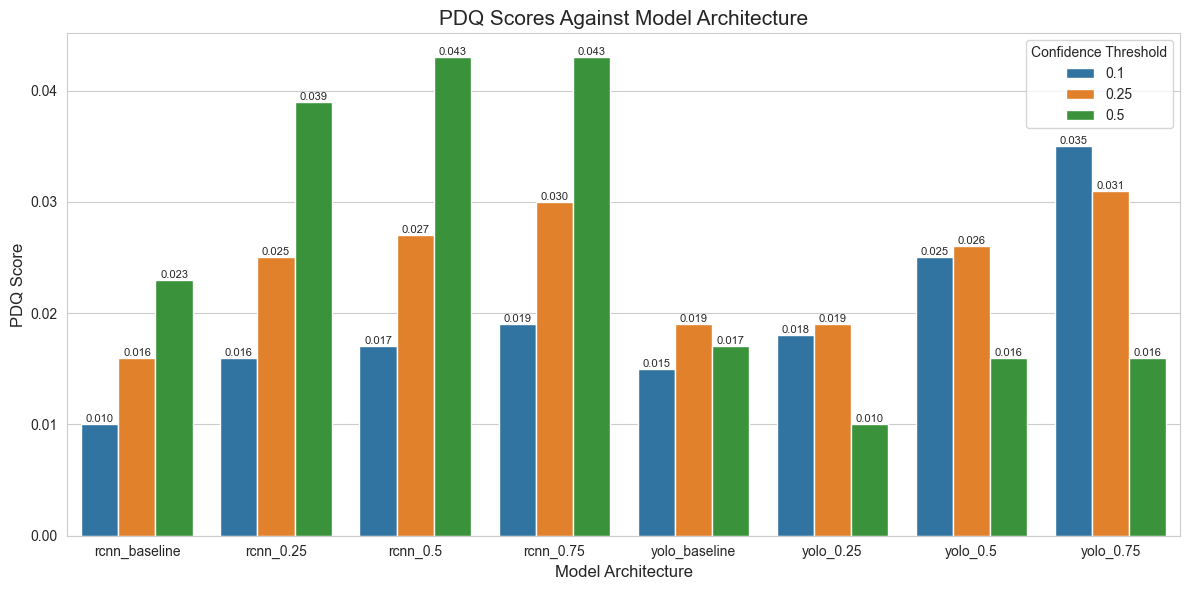

In [23]:
# Read the data
df = pd.read_excel("C:/Users/peiya/Downloads/cleaned_pdq.xlsx").dropna(subset=['Model'])
df = df.round(3)

# Extract confidence threshold and architecture from model names
def extract_info(model_name):
    parts = model_name.split('_')
    if len(parts) >= 3:
        conf_threshold = parts[1]
        architecture = parts[0]+'_'+parts[2]
    else:
        conf_threshold = 'unknown'
        architecture = 'unknown'
    return conf_threshold, architecture

# Create new columns for confidence threshold and architecture
df[['conf_threshold', 'architecture']] = df['Model'].apply(lambda x: pd.Series(extract_info(x)))

# Set plot style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the grouped bar chart
ax1 = sns.barplot(x='architecture', y='PDQ', hue='conf_threshold', data=df)

# Customize the plot
plt.title('PDQ Scores Against Model Architecture', fontsize=15)
plt.xlabel('Model Architecture', fontsize=12)
plt.ylabel('PDQ Score', fontsize=12)
plt.legend(title='Confidence Threshold')

# Add data labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.3f', fontsize=8)

# Show the plot
plt.tight_layout()
plt.savefig('pdq_scores_by_architecture.png')
plt.show()

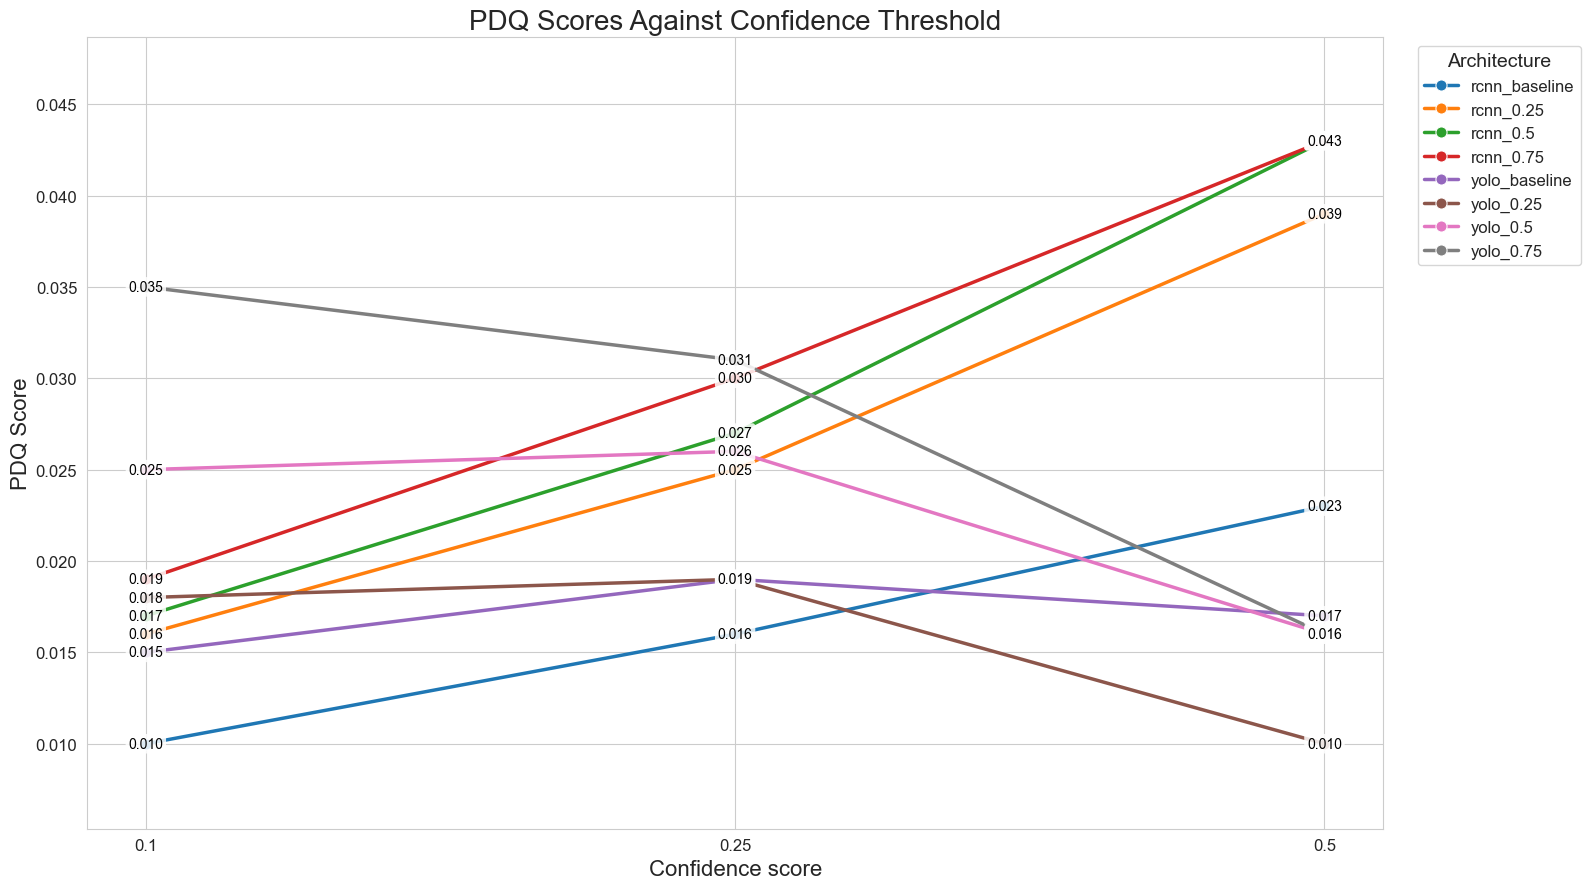

In [13]:
plt.figure(figsize=(16, 9))  # Even larger figure size for better spacing
sns.set_style("whitegrid")

# Create the line plot
ax = sns.lineplot(x='conf_threshold', y='PDQ', hue='architecture', data=df, 
                  linewidth=2.5, marker='o', markersize=8)

# Customize the plot
plt.title('PDQ Scores Against Confidence Threshold', fontsize=20)
plt.xlabel('Confidence score', fontsize=16)
plt.ylabel('PDQ Score', fontsize=16)
plt.legend(title='Architecture', title_fontsize=14, fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust y-axis limits to provide more space
y_min, y_max = ax.get_ylim()
ax.set_ylim(y_min - 0.003, y_max + 0.004)

# Define custom offsets for each architecture at each x point to avoid overlaps
# Dictionary structure: {architecture: {x_value: (x_offset, y_offset)}}
custom_offsets = {
    'rcnn_baseline': {0.1: (0, -0.002), 0.25: (0, -0.0015), 0.5: (0, 0.0015)},
    'rcnn_0.25': {0.1: (0, 0.002), 0.25: (0, 0.001), 0.5: (0, 0.0015)},
    'rcnn_0.5': {0.1: (0, 0.002), 0.25: (0, 0.0025), 0.5: (0, 0)},
    'rcnn_0.75': {0.1: (0, 0.002), 0.25: (0, 0.0025), 0.5: (0, 0.0025)},
    'yolo_baseline': {0.1: (0, -0.002), 0.25: (-0.01, 0.002), 0.5: (0, -0.0025)},
    'yolo_0.25': {0.1: (0, 0.001), 0.25: (0.01, 0), 0.5: (0, -0.002)},
    'yolo_0.5': {0.1: (0, 0.002), 0.25: (0, -0.0015), 0.5: (0, -0.001)},
    'yolo_0.75': {0.1: (0, 0.002), 0.25: (0, 0.0015), 0.5: (0, 0.002)}
}

# Get all lines and their corresponding architectures
lines = ax.get_lines()
architecture_names = df['architecture'].unique()
labeled_y = set()
# Add data labels with carefully positioned offsets
for line, arch_name in zip(lines, architecture_names):
    # Get the data points
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    
    # Get line color for matching text color
    line_color = line.get_color()
    
    # Add annotations for each point with custom offsets
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        # Get custom offsets for this architecture and x value
        if y in labeled_y:
            continue
        offsets = custom_offsets.get(arch_name, {}).get(x, (0, 0))
        x_offset, y_offset = offsets
        
        # Create text with matching color and background
        ax.annotate(f'{y:.3f}', 
                   (x + x_offset, y + y_offset),
                   fontsize=10, 
                   ha='center',
                   va='center',
                   color='black',
                   bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.85))

# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=12)

# Add some spacing around the plot
plt.tight_layout()
plt.savefig('pdq_scores_by_conf.png', dpi=300, bbox_inches='tight')
plt.show()

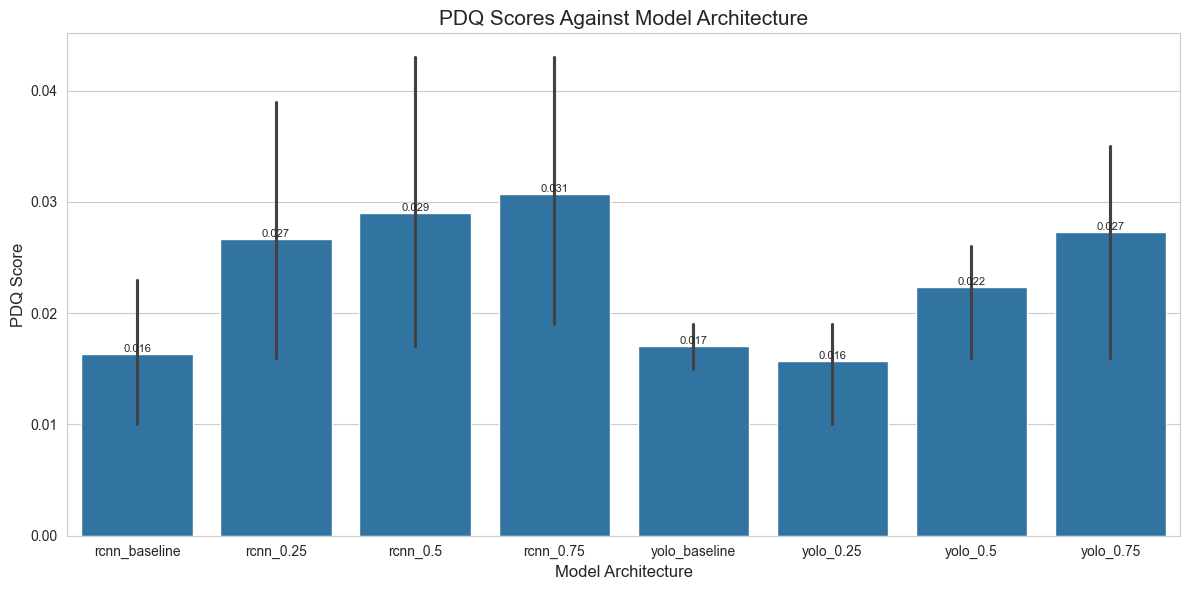

In [6]:
df_new = df[df['conf_threshold']==0.]

# Set plot style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the grouped bar chart
ax1 = sns.barplot(x='architecture', y='PDQ', data=df)

# Customize the plot
plt.title('PDQ Scores Against Model Architecture', fontsize=15)
plt.xlabel('Model Architecture', fontsize=12)
plt.ylabel('PDQ Score', fontsize=12)

# Add data labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.3f', fontsize=8)

# Show the plot
plt.tight_layout()
plt.savefig('pdq_scores_by_architecture.png')
plt.show()

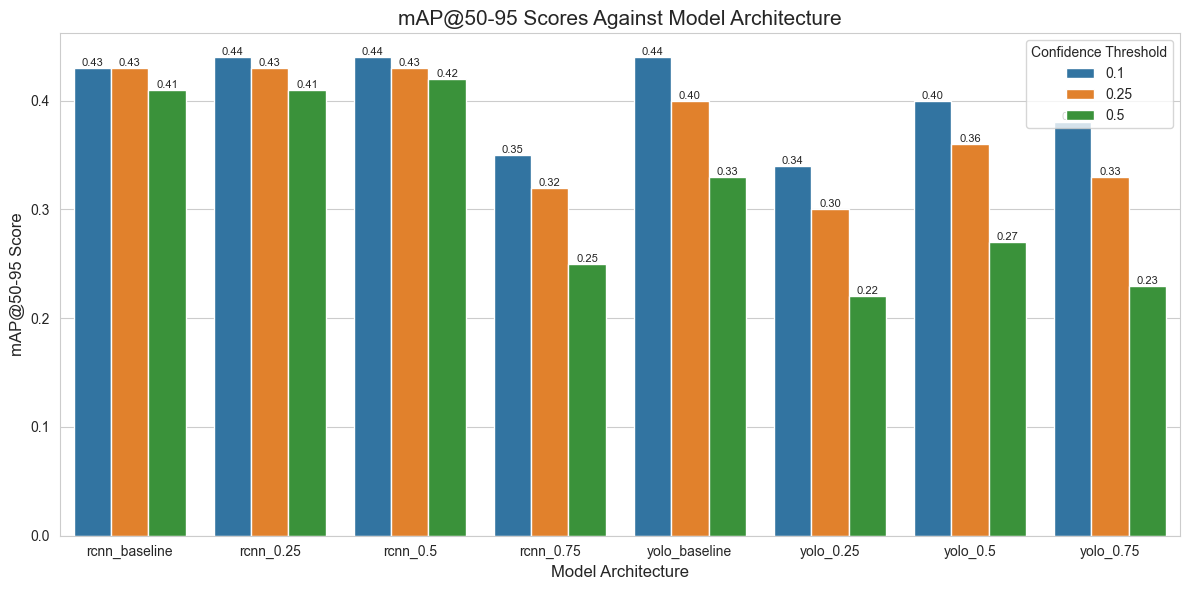

In [26]:
df = df.round(2)
# Set plot style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the grouped bar chart
ax1 = sns.barplot(x='architecture', y='mAP', hue='conf_threshold', data=df)

# Customize the plot
plt.title('mAP@50-95 Scores Against Model Architecture', fontsize=15)
plt.xlabel('Model Architecture', fontsize=12)
plt.ylabel('mAP@50-95 Score', fontsize=12)
plt.legend(title='Confidence Threshold')

# Add data labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f', fontsize=8)

# Show the plot
plt.tight_layout()
plt.savefig('mAP@50-95_scores_by_architecture.png')
plt.show()

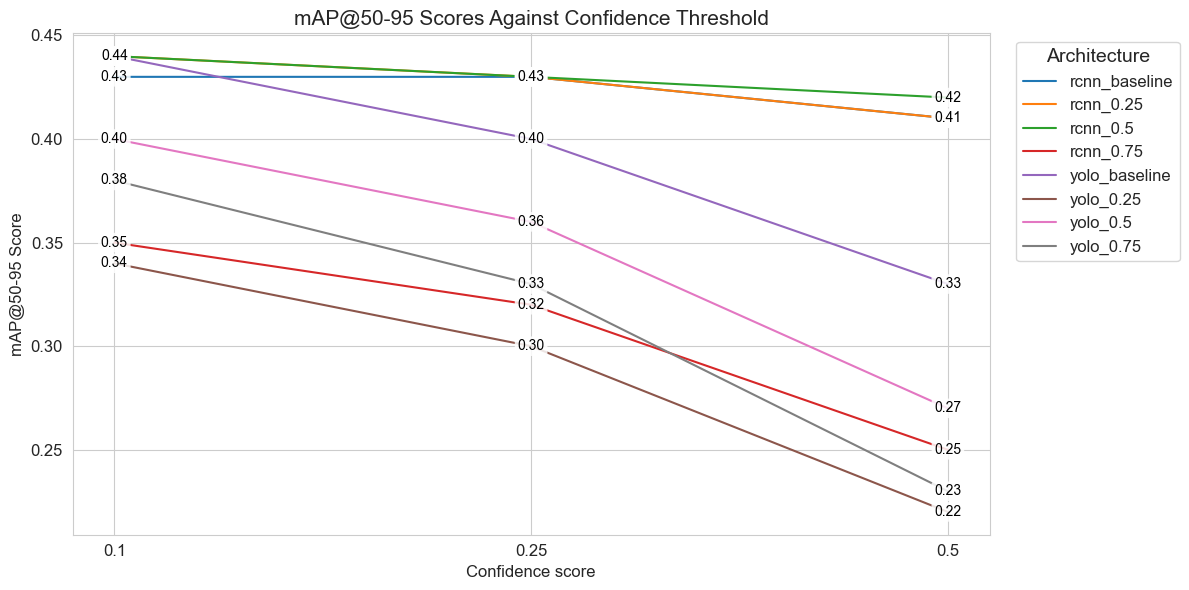

In [27]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the grouped bar chart
ax2 = sns.lineplot(x='conf_threshold', y='mAP', hue='architecture', data=df)

# Customize the plot
plt.title('mAP@50-95 Scores Against Confidence Threshold', fontsize=15)
plt.xlabel('Confidence score', fontsize=12)
plt.ylabel('mAP@50-95 Score', fontsize=12)
plt.legend(title='Architecture', title_fontsize=14, fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left')

custom_offsets = {
    # Format: (architecture, conf_threshold): (x_offset, y_offset)
    ('rcnn_baseline', 0.1): (0, -0.0020),
    ('rcnn_baseline', 0.25): (0, -0.0020),
    ('rcnn_baseline', 0.5): (0, -0.0020),
    
    ('rcnn_0.25', 0.1): (0, 0.0020),
    ('rcnn_0.25', 0.25): (-0.015, 0),
    ('rcnn_0.25', 0.5): (0, 0.0020),
    
    ('rcnn_0.5', 0.1): (0, 0.0020),
    ('rcnn_0.5', 0.25): (0.015, 0),
    ('rcnn_0.5', 0.5): (-0.015, 0.0020),
    
    ('rcnn_0.75', 0.1): (0, 0.0020),
    ('rcnn_0.75', 0.25): (0, 0.0020),
    ('rcnn_0.75', 0.5): (0.015, 0.0020),
    
    ('yolo_baseline', 0.1): (-0.015, 0),
    ('yolo_baseline', 0.25): (0, 0.0020),
    ('yolo_baseline', 0.5): (0, -0.0020),
    
    ('yolo_0.25', 0.1): (0.015, 0),
    ('yolo_0.25', 0.25): (0, -0.0020),
    ('yolo_0.25', 0.5): (0, -0.0020),
    
    ('yolo_0.5', 0.1): (0, 0.0020),
    ('yolo_0.5', 0.25): (0, -0.0020),
    ('yolo_0.5', 0.5): (0, 0.0020),
    
    ('yolo_0.75', 0.1): (0, 0.0020),
    ('yolo_0.75', 0.25): (0, 0.0020),
    ('yolo_0.75', 0.5): (0, -0.0020),
}

# Get all lines and their corresponding architectures
lines = ax2.get_lines()
architecture_names = df['architecture'].unique()
labeled_y = set()
# Add data labels with carefully positioned offsets
for line, arch_name in zip(lines, architecture_names):
    # Get the data points
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    
    # Get line color for matching text color
    line_color = line.get_color()
    
    # Add annotations for each point with custom offsets
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        # Get custom offsets for this architecture and x value
        if y in labeled_y:
            continue
        offsets = custom_offsets.get(arch_name, {}).get(x, (0, 0))
        x_offset, y_offset = offsets
        
        # Create text with matching color and background
        ax2.annotate(f'{y:.2f}', 
                   (x + x_offset, y + y_offset),
                   fontsize=10, 
                   ha='center',
                   va='center',
                   color='black',
                   bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.85))

plt.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('mAP@50-95_scores_by_conf.png')
plt.show()

Correlate tau density with psprs

DN

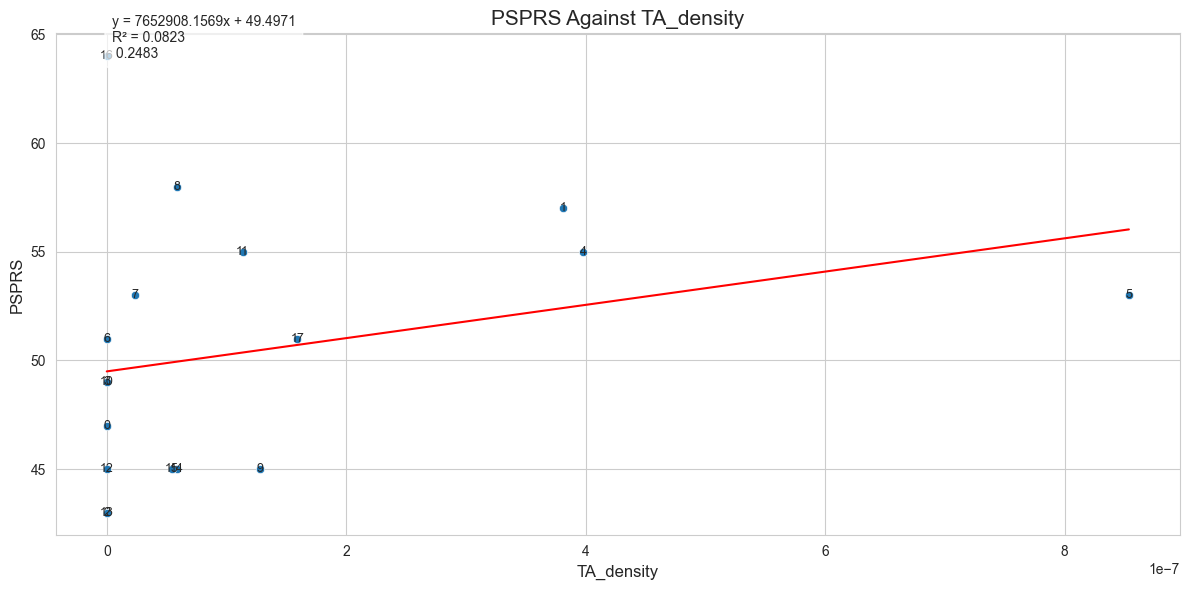

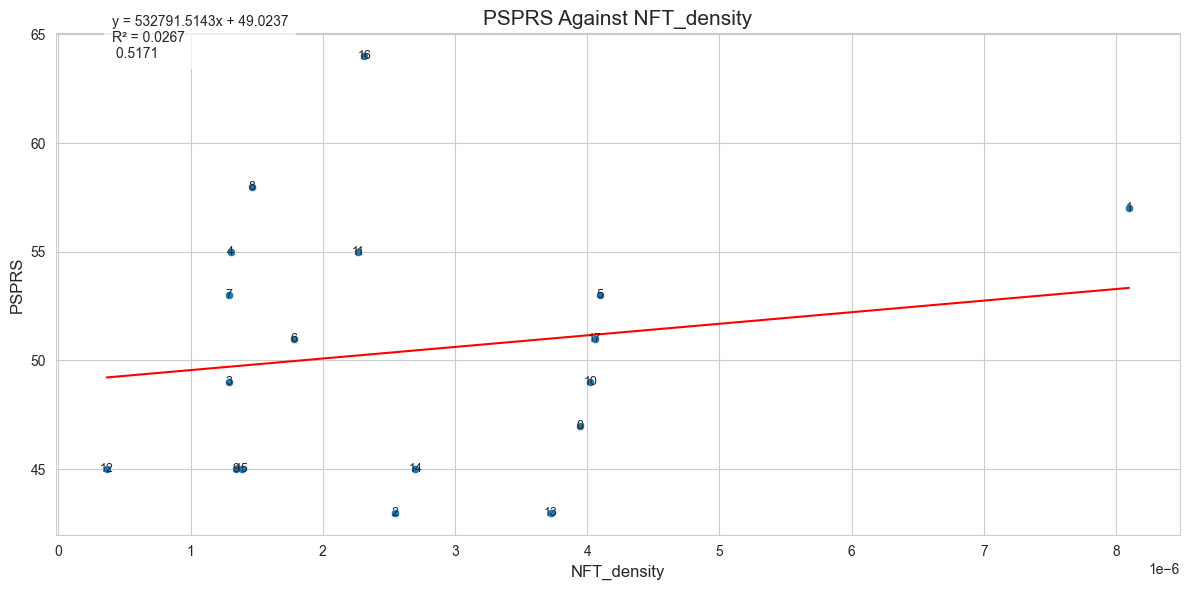

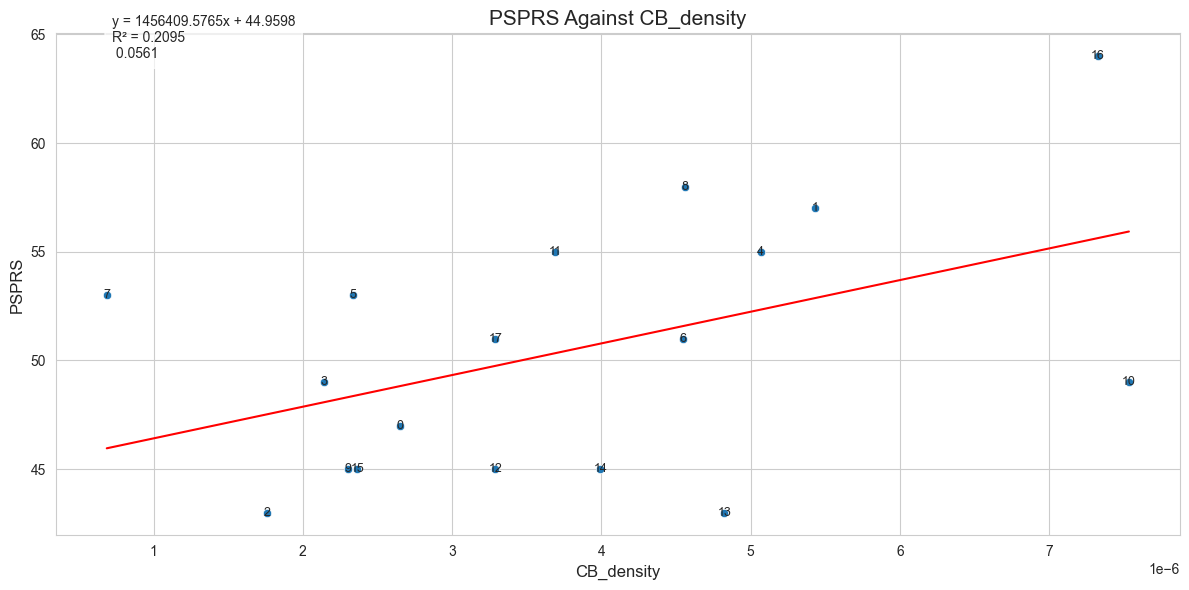

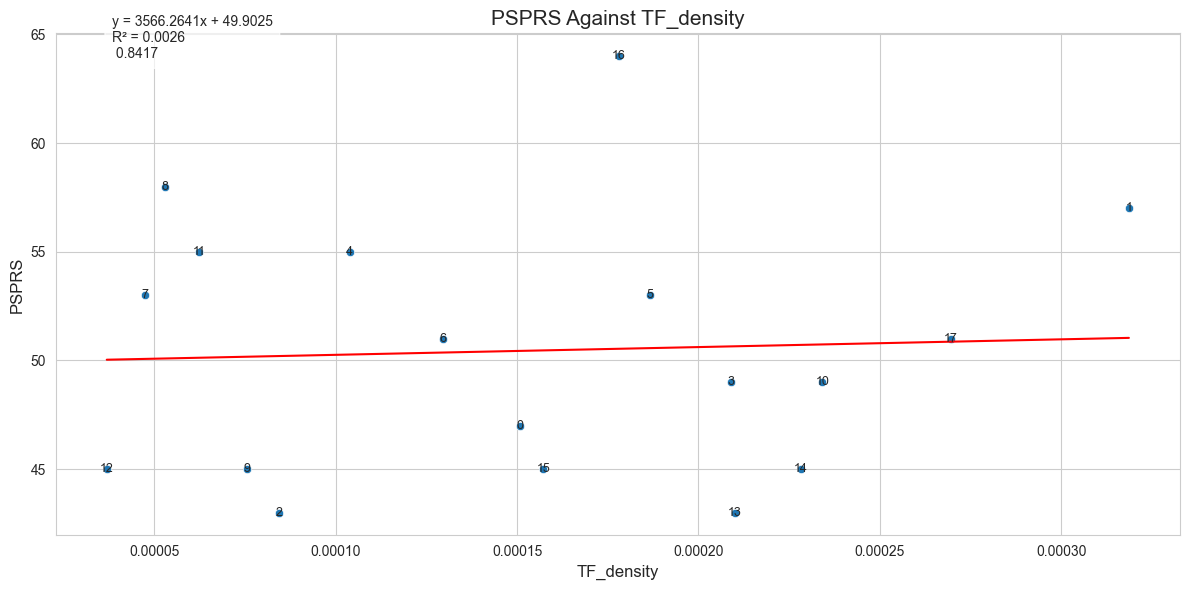

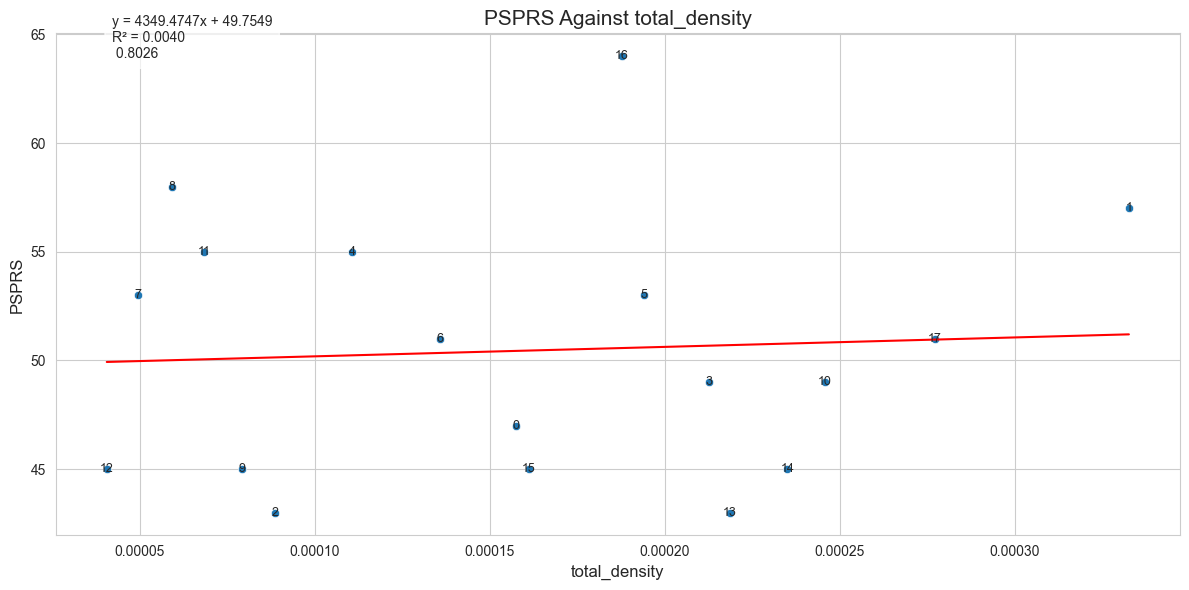

In [35]:
def plot(x_name, cur_df):
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    cur_df[x_name+'_density'] = cur_df[x_name]/cur_df['Area']

    # Basic plot
    ax = sns.scatterplot(x=x_name+'_density', y='PSPRS', data=cur_df)
    
    # Add labels to points
    for i, row in cur_df.iterrows():
        plt.text(row[x_name+'_density'], row['PSPRS'], str(i), 
                 fontsize=9, ha='center', va='center')
    
    x = cur_df[x_name+'_density']
    y = cur_df['PSPRS']
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Create line using slope and intercept
    line_x = np.array([min(x), max(x)])
    line_y = slope * line_x + intercept
    
    # Plot regression line
    plt.plot(line_x, line_y, color='red')
    
    # Add regression equation and R² value to plot
    equation = f'y = {slope:.4f}x + {intercept:.4f}'
    r_squared = f'R² = {r_value**2:.4f}'
    p_value = f'{p_value:.4f}'
    plt.annotate(f'{equation}\n{r_squared}\n {p_value}', 
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7))
    
    plt.title('PSPRS Against '+x_name+'_density', fontsize=15)
    plt.xlabel(x_name+'_density', fontsize=12)
    plt.ylabel('PSPRS', fontsize=12)

    plt.tight_layout()
    plt.show()

df_psprs = pd.read_excel("C:/Users/peiya/Desktop/clinicaldata(Sheet3).xlsx", sheet_name="Sheet9")
for col in df_psprs.columns:
    if col == 'PSPRS' or col =='Area':
        continue
    plot(col, df_psprs)

c:\Users\peiya\Desktop\dissertation\dl_histopathology\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\peiya\Desktop\dissertation\dl_histopathology\.venv\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\Users\peiya\Desktop\dissertation\dl_histopathology\.venv\Lib\site-packages\matplotlib\transforms.py:351: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


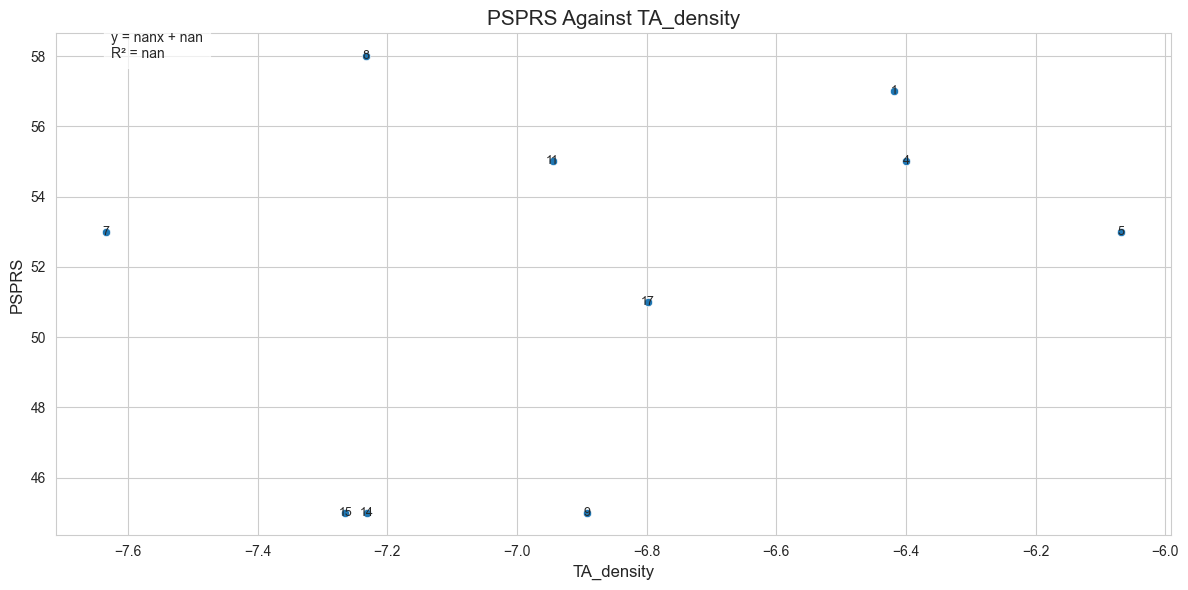

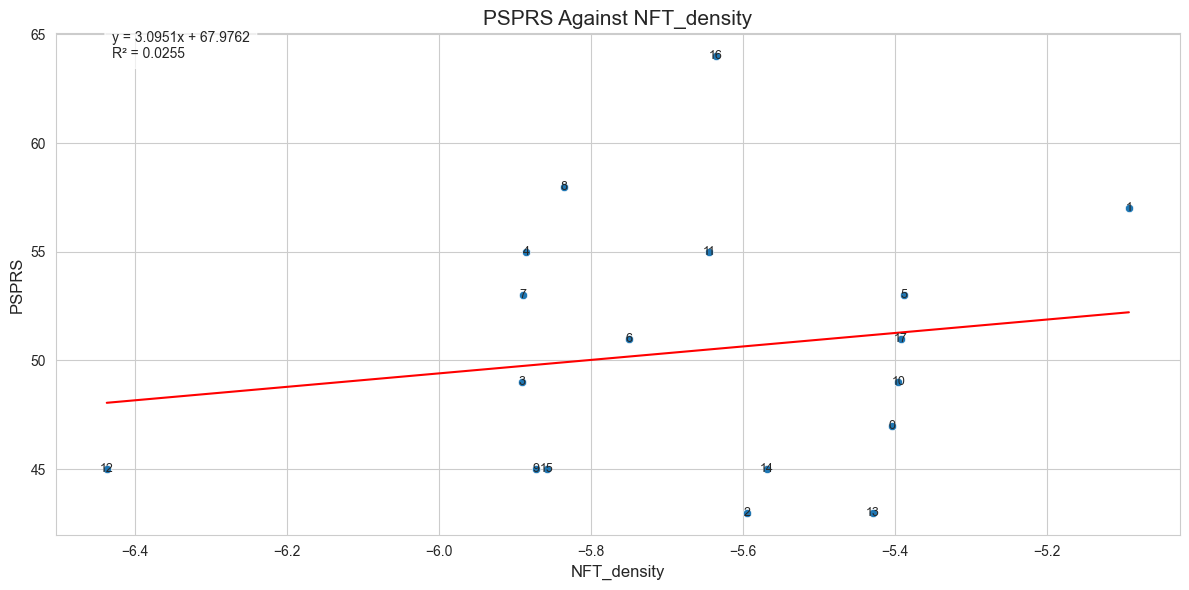

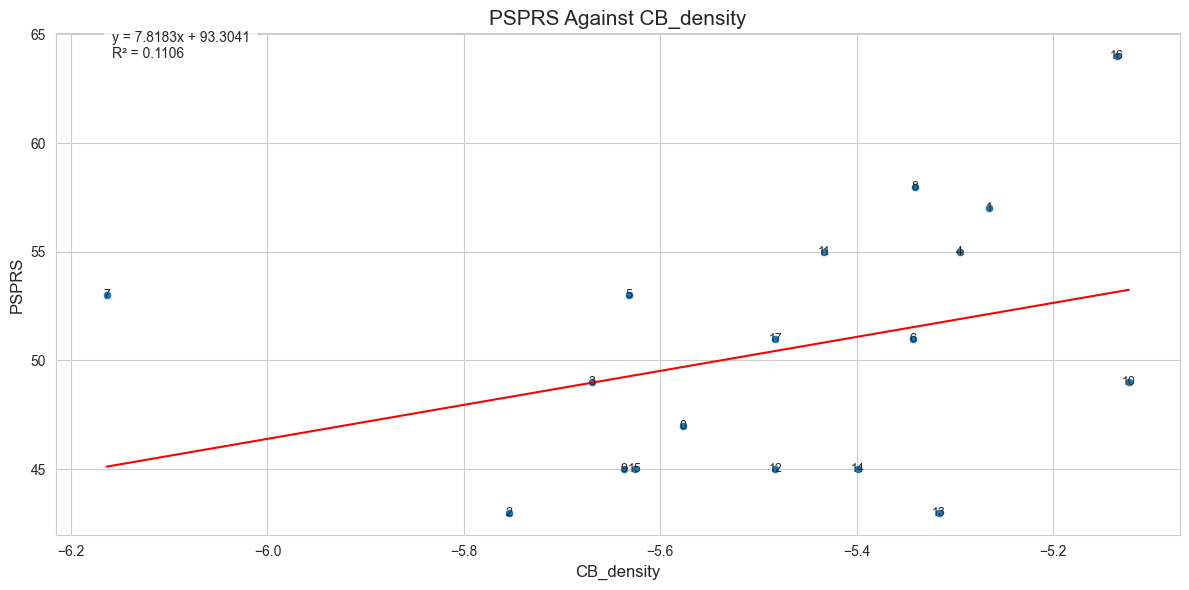

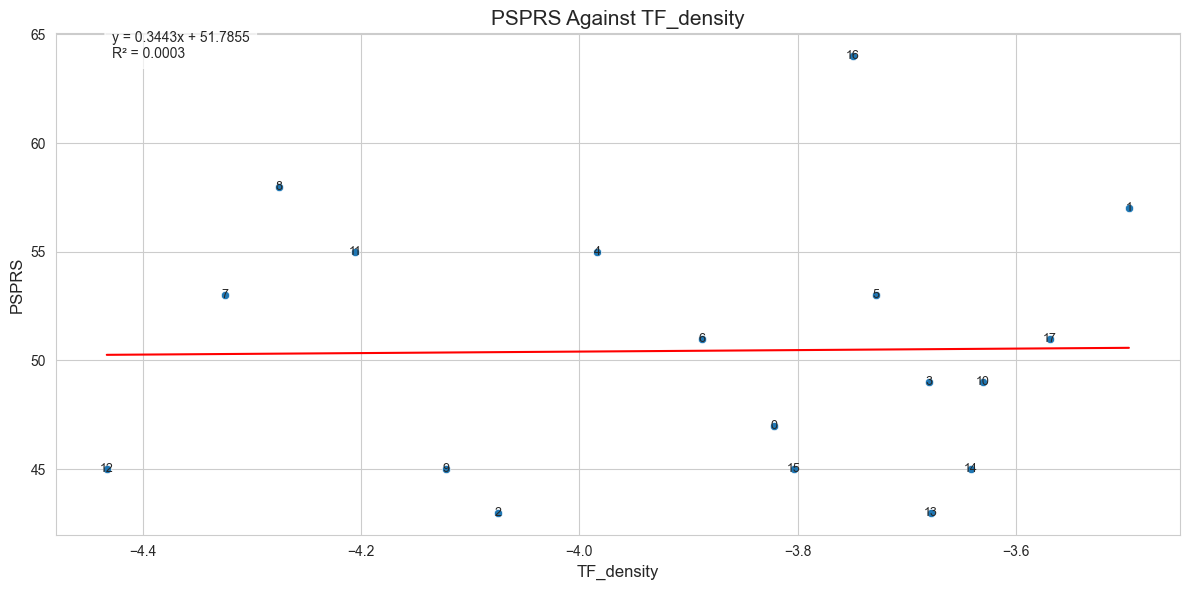

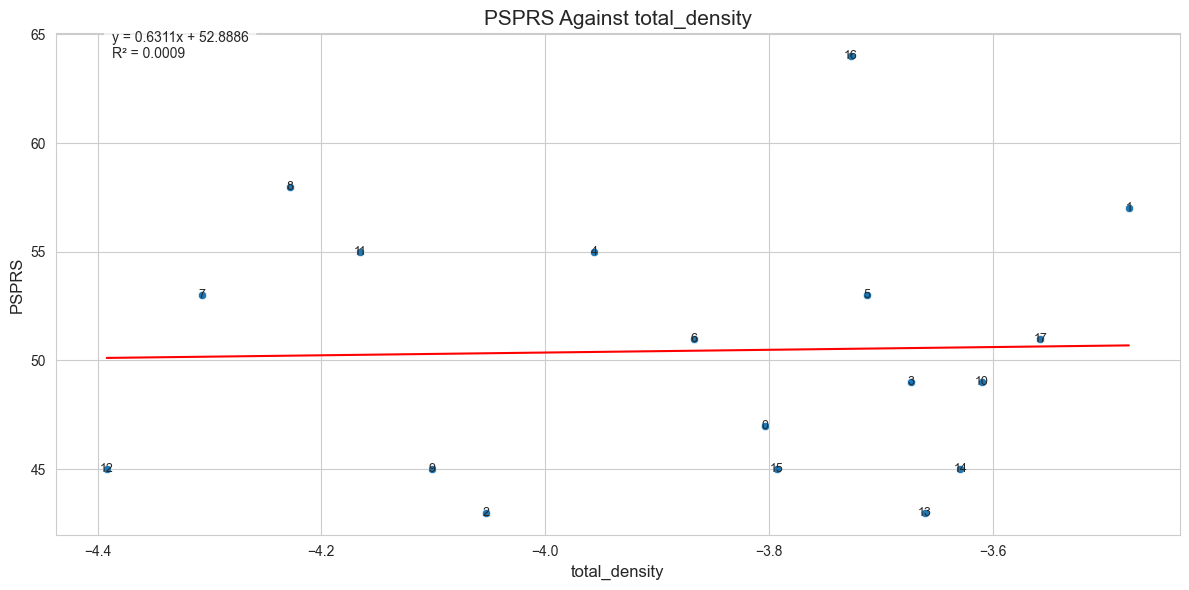

In [34]:
def plot(x_name, cur_df):
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    cur_df[x_name+'_density'] = np.log10(cur_df[x_name]/cur_df['Area'])

    # Basic plot
    ax = sns.scatterplot(x=x_name+'_density', y='PSPRS', data=cur_df)
    
    # Add labels to points
    for i, row in cur_df.iterrows():
        plt.text(row[x_name+'_density'], row['PSPRS'], str(i), 
                 fontsize=9, ha='center', va='center')
        
    x = cur_df[x_name+'_density']
    y = cur_df['PSPRS']
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Create line using slope and intercept
    line_x = np.array([min(x), max(x)])
    line_y = slope * line_x + intercept
    
    # Plot regression line
    plt.plot(line_x, line_y, color='red')
    
    # Add regression equation and R² value to plot
    equation = f'y = {slope:.4f}x + {intercept:.4f}'
    r_squared = f'R² = {r_value**2:.4f}'
    plt.annotate(f'{equation}\n{r_squared}', 
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7))
    
    plt.title('PSPRS Against '+x_name+'_density', fontsize=15)
    plt.xlabel(x_name+'_density', fontsize=12)
    plt.ylabel('PSPRS', fontsize=12)

    plt.tight_layout()
    plt.show()

df_psprs = pd.read_excel("C:/Users/peiya/Desktop/clinicaldata(Sheet3).xlsx", sheet_name="Sheet9")
for col in df_psprs.columns:
    if col == 'PSPRS' or col =='Area':
        continue
    plot(col, df_psprs)